In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import umap
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')


In [2]:
def create_cluster(sentences):
    print(len(sentences))
    #Sentences are encoded by calling model.encode()
    embeddings = model.encode(sentences)
    print(embeddings.shape)

    # create array with integer from 0 to length of embeddings
    labels = np.arange(len(embeddings))

    #tsne = TSNE(n_components=2,perplexity=25)
    #tsne_result = tsne.fit_transform(embeddings)

    reducer = umap.UMAP(n_neighbors=20, min_dist=0.2, metric='correlation')
    embedding = reducer.fit_transform(embeddings)

    cmap = matplotlib.cm.get_cmap('plasma', 5)
    kmeans = KMeans(n_clusters=4
                   )
    kmeans.fit(embedding)
    fig, ax = plt.subplots(figsize=(10,10))
    sc = plt.scatter(embedding[:,0], embedding[:,1], c=kmeans.labels_,cmap=cmap)
    for i, label in enumerate(labels):
        plt.annotate(label + 1, (embedding[i,0], embedding[i,1]))

    unique_labels = set(kmeans.labels_)
    leg = []
    for label in unique_labels:
        leg.append(str(label))

    print("Legend: ", leg)
    plt.legend(*sc.legend_elements(), title='clusters')
    plt.show()

# KG

In [3]:

kg = [
# action movies
    # the equalizer
    " action thriller, QuietLife, Hopeful, Desire, Aggression, Injured, Deception, Determination, Vengeance, Justice, Guilt, Fear, Protective, Betrayal, Frustration, Concern, Dangerous, Fearful, Captured, Mysterious, Defiant, Threatening, Cunning, Triumphant, Vengeful, Inspired, GratitudeActions/Events continues, encounters, hasEmotion, VigilanteJustice, Criminals, returnsRacketeeringMoneyTo, blackmailedBy, beatsWith, after, worksAt, GunmanRobbery, robs, HardwareStore, travelsTo, helpsIdentify, formerColleagueOf, worksFor, DefenseIntelligenceAgency, posesAs, visits, hasEmotion, flashesPictureOf, offersAsWarning, walksAway, failsToAbduct, skipsMeetingWith, kills, guards, surprises, with, destroys, OilTankers, abducts, forcesToMeet, tracksDown, helpsTakeDown, takenIntoCustody, when, leavesNote, withMessage, threatens, formerSpetsnazOperative, RussianSecretPoliceAgent, belongsTo, guardedBy, tricksInto, electrocutingHimself, finds, inspires, postsOnlineAdsAs, thanks, describes",
    # john wick 2
    "Action thriller, Rage, Grief, Anger, Respect, Concern, Intrigue Events: Recovery, Violent Rampage, Saving, Returning Home, Visitation, Declining, Retaliation, Survival, Acceptance, Meeting, Assassination, Escape, Double Crossing, Fight, Explanation, Arranging Safe Passage, Contract Opening, Attack, Visit, Warning, Confrontation, Mercy, Seeking Help, Treatment, Provision, Pursuit, Killing, Meeting, Explanation, Excommunication Activation, Departure, Contract Dissemination, Running.",
    # john wick
    "Action revenge, grieves, arranged, accosts, failToIntimidate, intimidates, breakInto, kills, steals, recognizes, refuses, beats, berates, fallsInLoveWith, gaveTaskTo, succeededInTask, recovers, includes, attemptsToMakeAmends, kills, putsBountyOn, enlistsToKill, lodgesAt, warns, infiltrates, confronts, isAttackedBy, forcedToRetreatTo, sneaksInto, sees, fires, wakesUp, subdues, reveals, discloses, hires, secures, escapes, kills, destroys, arrivesTo, assaults, isHitBy, captured, tells, isDead, gaveHopeTo, gaveChanceTo, griefFor, intervenesToSave, threatens, assaults, encourages, witnesses, duplicityRevealedBy, isTortured, isKilled, taunts, hasPerkinsExecuted, informs, isPreparingToLeave, racesTo, fights, mortallyWounds, watchesOn, tells, breaksInto, treats, adopts, scheduledToBeEuthanized.",
    #mission impossible (re) 
    "Spy thriller, grieving, coping, intimidate, fail, assault, kill, steal, recognizing, refuse, inform, beats, berates, fear, recover, refuse, kill, put bounty, lodge, warn, infiltrate, confront, retreat, rest, sneak, subdue, reveal, escape, destroy, assess, assault, threaten, intervene, encourage, witness, torture, taunt, execute, inform, race, fight, wound, resign, watch, break, treat, adopt, walk, unsure, approach, ready. Events: finishing mission, sent to Prague, stop rogue agent, steal NOC list, mission fails, list stolen, team killed, escape, return to safe house, realize meaning of Job 314, meet Max, warn about fake NOC list, escape raid, obtain real NOC list, recruit Luther Stickell and Franz Krieger, infiltrate CIA headquarters, steal authentic list, escape to London, arrest of Hunt's mother and uncle, contact Kittridge, trace the call, Phelps resurfaces, exchange with Max, reveal Phelps as mole, confrontation with Phelps, helicopter chase, explosion, Kittridge takes Max into custody, recover the NOC list, reinstated in IMF, unsure about returning, approached for a new mission.",
    #dark knight
    "action, superhero, robs, betraying, killing, reveals, escapes, ally, eliminate, supports, retire, pursue, interrupts, offers, kill, concealed, fleeing, find, returns, apprehend, accept, threatens, attacks, continues, reveals, targets, throws, rescues, struggles, understand, relish, claims, lure, deduced, reveals, separates, kills, severely burned, escapes, extracts, burns, deduces, expose, blow up, evacuate, struggles, meets, persuading, defers, killing, grips, reveals, rigged to explode, refuse to kill, subdues, refuses to kill, arrest, incorruptible, corrupts, takes hostage, blames, falls to death, takes blame, persuades, conceals, burns, mourns, launch manhunt, fear, grief, intimidation, assault, loss, hatred, revenge, captivity, danger, warning, subduing, taunting, hope, sacrifice, panic, disbelief, struggle, guilt, negligence, death, destruction, trust, concealment, mourning.",
    # extraction
    " Action thriller, Wounded, Relieved, Satisfied, Threatened, Determined, Reflective, Curious, Surprised, Anxious, Awe, Joy, Satisfaction, Surprise, FearEvents: Sneaks out, Visits, Accompanies, Goes to, Encounters, Works for, Shoots, Kidnaps, Is former Lieutenant Colonel, Is protector of, Visits in prison, Orders, Retrieves, Is former operator, Is recruited by, Saves, Kills, Takes to, Initiates lockdown, Intentionally fails to transfer, Reveals, Kills teammates, Tries to kill, Arranges for, Refuses to leave behind, Fights off, Is retired squad-mate, Calls, Fights, Shoots, Asks for help, Forces to team up, Draws attention away, Is shot by, Is wounded, Instructs, Runs to, Is shot in neck by, Resembles, Encounters, Jumps into, Practices, Watches.",
    #the raid
    "Action thriller, performs, target, carriedOutBy, leadsBy, delivers, deliversTo, causesBy, consistsOf, shoots, destroys, raisesAlarmBy, cutsLightsBy, announcesBy, ambushedBy, subdueBy, separatesBy, finds, murders, revealedToBe, partsWaysWith, meetsUpWith, attacks, incapacitates, regroupsWith, head, fightsWith, free, confrontsWith, kill, taunts, revealsBy, kills, attempts, outOfAmmunitionBy, allowsToLeave, handsOver, tellsToContact, asksToComeHome, refuses, asserts, smiles,Courage, Determination, Guilt, Reluctance, Concern, Illness, Aggression, Destruction, Fear, Desperation, Protectiveness, SeriousInjury, Grief, Loss, Death, Surprise, Conflict, FamilyBond, Cruelty, Betrayal",
    #Atomic Blonde
    " Action spy, death, MI6 debriefing, dispatched to recover The List, escape, search in an apartment, encounter, meeting, tailing, entering a shop, meeting, finding out, plan, meeting, threatening, arriving, finding, burning, arriving, killing, debriefing, presenting evidence, assassination attempt, killing, returning, conversation.shot, killed, ambushed, suspicious, passionate, betrayed, threatened, avenged, manipulated",
    #wrath of man
    " Crime thriller, ArmoredTruckRobbery, ThreeDeaths, joins, hasManager, nicknames, takenHostageBy, isQuestionedBy, suspects, isSuperiorOf, receives, isWaylaidIn, isWorkingWith, monitors, racesTo, isShot, isLeftForDead, isSergeantOf, resultsIn, servedUnder, helps, arranges, sees, resultsIn, isHostageTo, isFoundIn, tells, experiences, passes, hasRockyStartWith, hasNickname, compliesWith, disposeOf, isQuestioned, bringsSuspicionsAbout, LeaveHillAlone, receives, receives, investigates, becomesSuspiciousOf, continuesToInvestigate, isTakenHostageBy, convinces, compliesWith, disposeOf, isQuestioned, receives, receives, isWaylaidIn, continuesToInvestigate, resultsIn, resultsIn, isDoneBy, tells, isDrivenAway, experiences, resultsIn, resultsIn, resultsIn, resultsIn, isHostageTo, resultsIn, resultsIn, isFoundIn, resultsIn, resultsIn, isShotBy, isFoundIn, resultsIn, resultsIn, experiences, resultsIn, isDoneBy, tells, isDrivenAway.Fear, Panic",
    # old guard
    " Action fantasy, Ambushed, Killed, ThroatSlit, Regeneration, Ruse, Shared, AlertedTo, Brings, Meets, Captured, AccusedOf, Lost, Drowning, Betrayal, Shot, Explains, Reveals, Experiences, Finds, Astonished, Explains, Reveals, Effect, GreaterEffect, Explains, Reveals, Research, Rescues, MotiveFor, Films, Sends, Survives, Healing, WorksAs, Centuries, In, IsMotiveFor, Shows, IsRegenerativeHealing, IsFirstComradeOf, IsCaptured, IsAccusedOf, IsLost, IsDrowning, IsShared, IsAlertedTo, IsAstonished, IsRegenerationStatus, HasRegenerationStatus, HasEmotion,Depressed, Drunken",
    #taken
    "action, thriller, attempt, fly_to, break_into, find, chase, flee, get_struck_and_killed_by, turn_to, inform, engage_in_gunfight_with, high-speed_chase_with, take, improvise_detoxification, tell, pose_as, enter, pretense_of_renegotiating_police_protection_rate, identify, trick, say, erupt_into, result_in_deaths_of, search, rescue, died_of_overdose, torture, force_to_confess, quickly_sold_on_black_market, identify_buyer_as, leave_to_die_from, confront, shoot, wound, coerce, disclose, knock_out, infiltrate, force_to_purchase, be_caught, eliminate, learn, order_to_kill, break_loose, kill, hold, attempt_to_negotiate, rescue, surprise, take_to, visit",
    # Kingsman: The Secret Service
    " Secret agent, action, thrillersacrifices himself, saves, returns to, drops out of, calls, steals, arranges release, subdues, explains, interrogates, explodes, poses as, befriends, endures tests, refuses test, learns of, travels to, triggers, locates, pilots, secures replacement, masquerades as, is discovered by, activates failsafe, kills, impales, shares encounter, offers new home, prepares to take on.",
    # The Bourne Identity 
    "Action, Thriller, Rescue, tend to, find, investigate, take, start using, contact, issue alerts, capture, assign, try evading, pursue, escape, drive, reach, inquire, learn, register, die, ambush, get the upper hand, be interrogated, throw himself, find wanted posters, help, evade, spend the night, obsess over, anticipate, plant, remain unconvinced, threaten, report, assassinate, take refuge, track, send, be mortally wounded, reveal, send away, contact, agree to meet, abandon, place, break in, hold at gunpoint, reveal association, press to remember, recall, infiltrate, manage to get close, unable to find the nerve, flee, be shot, announce, warn not to follow, descend on, fight way through, encounter, kill, shut down, report, decommission, discuss, find, reunite",
    # collateral
    "Action, MaxDurocher, worksIn, wantsToStart, hasFare, hasBusinessCard, hasNextFare, agreesToDrive, waitsAt, revealsIdentity, forces, hides, continuesDriving, arrivesAt, hasVictim, makesKillAt, isSecondTarget, orders, drivesTo, reveals, pleadsWith, let, compromises, answersCorrectly, visits, sees, hasPurpose, liesTo, about, leaves, steals, hurls, onto, destroys, with, orders, meets, reobtain, posesAs, acquires, identifies, as, thinks, basedOn, enters, leaves, protects, kills, bodyguardsOf, rescues, smuggles, fatallyShoots, confronts, tradesInsultsWith, deliberatelyCrashes, escapes, triesToArrest, afterSeeing, leavesLaptopOpen, hasFinalTarget, overpowers, rushesTo, steals, calls, toWarn, revealsDetailsAbout, urging, hasGun, from, corners, wounds, escapesWith, onFoot, pursues, onto, engagesIn, with, getOffAt, continuesRiding, Person, City, GovernmentAgency, Lawyer, PoliceInformant, Hitman, FBI_Agent, DeceasedPerson.",
    # the safe
    "Action, Thriller, Crime, Drama., unintentionallyWinsFixedFight, angers, kills, becomes, isKidnappedBy, isSentTo, arrivesFrom, asks, isAmbushedBy, isTakenTo, demands, refusesToGive, isEscapedWithBy, fightsThrough, meetsWith, hasLearnedThat, isInvolvedIn, wasBlackOpsHitmanFor, quit, exposed, isLiving, atonesFor, isUsedBy, setsUp, accepts, unlocks, fightsThrough, rescues, meetsWith, isAssaultedBy, retrieves, arrangesMeetingWith, refusesToSurrender, suggests, shoots, finishesOff, gives, isReturnedTo, isThreatenedBy, hides, makesPlansToLeave, headsTo, asks, responds",
    #American Assassin
    "Action, Thriller, proposesTo, acceptsProposal, landsOn, attacks, attemptsToFind, isKilledBy, trainsIn, frequents, quizzes, securesInvitationToMeet, preparesToTakeVengeanceOn, kills, isDraggedOutBy, undergoesDebriefing, isOfferedChanceToJoin, trains, intercepts, eliminates, vanishesInto, seesNewsReportsAbout, identifiesPerpetratorAs, isSentInto, isIdentified, isKilledBy, attemptsInterceptOf, pursues, retrieves, uncovers, isWorkingFor, isCapturedBy, isUsedAsHostage, killsHerself, givesChanceToKill, escapes, chasesAfter, diverts, throws, sendsToRescue, recoversFrom, isPresentIn, smiles., infiltrates, locates, frees, deduces, intendsToMake, shields, watches, blames.",
    #The Transporter
    "Action, Thriller, residesIn, follows, isHiredToTransport, changesDeal, hasCallsign, strictlyFollows, hoists, refusesToDrive, affectsGetaway, kills, pushedOutOfCar, offersMoreMoney, escapes, isFoiledBy, questions, fledScene, wasGetawayDriver, lackingProof, isHiredToDeliver, loadsIntoTrunk, changesTire, noticesMovingPackage, violatesRule, givesDrink, discoversWoman, isTiedUp, isGagged, attemptsToEscape, recaptures, returnsToTrunk, spotsPolicemen, deliversPackage, agreesToAnotherJob, stopsToBuyDrinks, hiddenBombExplodes, seeksVengeance, returnsToVilla, killsHenchmen, woundsHenchmen, stealsCar, findsPackageBoundAndGagged, bringsWomanBack, visitsSurvivingMan, determinesAttacker, killsMan, asksAboutCar, supportsAlibi, introducesHerselfAsCook, introducesHerselfAsGirlfriend, leavesWithNoConcreteEvidence, firesMissiles, firesAutomaticWeapons, escapesThrough, escapesTo, isQuestionedAt, accessesComputer, findsInformation, isPresumedDeadBy, wantsToRebuild, tellsInformation, goesToOffice, revealsInformation, isHumanTrafficker, trapsChinese, contains, isFamilyOf, loadsOntoTrucks, isSpotted, forcesWayThrough, stealsCar, makesChase, breaksDown, commandeersAirplane, followsHighway, parachutesOnto, managesToKill, isCrushedBy, isAmbushedBy, marchedTo, reluctantlyShoots, arrives, rescues, congratulates.",
    # The Man from Nowhere
    "Action, Thriller, runs, hasFriend, livesIn, isKidnappedBy, isGoGoDancer, isOpiumAddict, steals, hides, pawns, safelyKeeps, attractsAttentionOf, tasks, locates, tortures, forces, kidnaps, hasSoftSpotFor, delivers, arrested, escapesFrom, isExchangedFor, tracks, asks, isShot, recovers, asksForGun, finds, kills, saves, buys, asksForHug, breaksDownInTears,performsEmergencySurgery, frees, killsOff, demandsToKnow, commitsSuicide, emerges, allowsToRideTogether, sleeps, buysBackpack, buysSchoolSupplies, tells, goes, embraces",
    # The Gunman
    "Action, Thriller, assassination, sniper shot, fleeing, retirement, charity work, assault, investigation, kidnapping, deal, confrontation, escape, reunion, building wells, killing, searching, revealing, chasing, killing friends, trading, exposing, making a deal, battling, helping escape, shooting, goring",
    # The Equalizer 2
    "Action, Thriller, retrieve-9-year-old-daughter, help-Sam-Rubinstein, pick-up-Amy, beat-men, vandalized-courtyard, paint-mural, investigate-murder-suicide, accosted-and-killed, attacked-by-assassin, confront-York, kill-entire-team, help-Brian-escape, break-into-apartment, capture-Miles, search-town-in-gale-force-winds, shoot-at-car-trunk, kill-team-members, reunite-Sam-with-long-lost-sister, finish-painting-mural, look-out-towards-calm-sea",

    
# comedy movies
    # dump and dumper
    "Comedy, isFriendsWith, fallsInLoveWith, meets, leaves Briefcase, returns Briefcase, isCapturing, isWifeOf, runsThrough Jetway, fallsOutOf Jetway, isFiredFrom Job, isDogGroomer, learns isFired, follow, flees Apartment, ransack Apartment, hasParakeet, hasDecapitatedParakeet, suggests GoToAspen, opposes GoToAspen, agrees GoToAspen, leaves NextDay, catch up to, posesAs Hitchhiker, picksUp Hitchhiker, secretly follows, pranks, kills, wait to intercept, takesWrongTurn, drivesThrough, gives up on the journey, persuades, trades Van for minibike, arrivesIn Aspen, finds, confessesLoveTo, rejects, isFriendOf, isMastermindOf, arrivesWith, isHostage, isShotBy, playsDead, returnsFire, isRescuedBy, isArrested, isReunitedWith, declinesChance, tells, playsTagWith Emotions: Love, Surprise, Fear, Anger, Sadness, Frustration, Relief, Disappointment",
    # step brothers
    "Comedy, LivingWithParents, Marriage, BecomingStepBrothers, ViolentBrawl, GroundedWithNoTV, JobUltimatum, RidiculedByDerek, PunchesDerek, AffairWithAlice, BondingOverSharedInterests, JobInterviews, PoorPerformance, BulliedBySchoolChildren, HouseSalePlan, SignedUpForTherapy, AttractionToTherapist, PitchVideoPresentation, StrainedMarriage, DivorceAnnouncement, LivingIndependently, GettingAJob, CatalinaWineMixer, PerformanceToSaveParty, FiredFromJob, BeingThemselvesAgain, AmendsWithDerek, EndingRelationWithAlice, Reconciliation, RevengeOnSchoolChildren,Laughter, Silliness, Camaraderie, Conflict, Redemption,Anger, Disgust, Ridicule, Bonding, Surprise, Disappointment, Love/Attraction, Guilt, Determination, Reconciliation, Joy/Happiness, Satisfaction.",    
    # anchorman
    "Comedy, LivingWithParents, Marriage, BecomingNewsAnchorman, ThrowParty, UnsuccessfulPickup, HiringCorningstone, SeductionAttempts, ProfessionalTour, SexualRelationship, OnAirAnnouncement, DisputeWithMotorcyclist, DogPuntedOffBridge, LateToWork, CorningstoneFillsIn, CoupleBreaksUp, CorningstonePromoted, FierceRivalry, BuyingNewSuits, LostInShadyPart, ConfrontationWithMantooth, MeleeBattle, PoliceSirens, DisgustedByCoAnchor, ArgumentWithCorningstone, TextChangeInTeleprompter, InappropriateBroadcast, AngryMob, FiredFromJob, ApologyAttempt, UnemploymentAndAntagonization, Depression, BuyNewSuits, RecruitmentAndRehiring, SabotageAttempt, RescueAttempt, NewsTeamRescue, InterventionByBaxter, Reconciliation, FutureCareers, ClosingLine.Confidence, Arrogance, Competition, Humor, Romance,Confidence, Arrogance, Competition, Jealousy, Humiliation, Love, Ambition, Betrayal, Humor, Frustration, Surprise, Regret, Determination, Excitement, Reconciliation.",
    # tommy boy
    "Comedy., GraduatesFromMarquetteUniversity, GivesAnExecutiveJob, PlansToMarry, DiesFromHeartAttack, RenegesOnLoanPromise, ProposesDealWithTheBank, SetsOutOnCrossCountrySalesTrip, NoticesKissing, RevealedAsConArtists, InheritsControllingInterest, SeeksQuickSaleTo, AlienatesPotentialBuyers, TensionBetween, FistfightBetween, PersuadesSurlyWaitress, UsesSkillAtReadingPeople, MakeAmends, SabotagesCompanyComputers, DecidesToSellCallahanAuto, PoseAsFlightAttendants, MeetWith, ForcesHisWayIntoBoardRoom, QuotesAdvertisingSlogan, SignsPurchaseOrder, ShowsPoliceRecords, Arrested, InvitesToDinner, GivesSpeechAtThePlant, ContinuesHisWork, StartsRelationshipWith, SailsOnLake, SaysGoodbyeTo, WindPicksUpImmediately, SailsToShoreToMeet.Humor, Friendship, Determination, Insecurity, Love,Humor, Determination, Insecurity, Grief, Frustration, Camaraderie, Guilt, Regret, Confidence, Love, Disappointment, Relief, Joy, Sadness, Redemption.",
    #hangover 1
    "Comedy, Events: goesFrom, isVisitedBy, isInRelationshipWith, demandToKnow, isMotherOf, isArrestedBy, isReleasedBy, volunteersFor, confesses, drugs, believesDrugToBe, knocksOut, orders, returnTigerTo, pushes, deliversTo, seeSecurityCameraFootage, finds, usesKnowledgeOf, wins, isAccusedBy, isBossOf, threatensToKill, searchesFor, findsAmountOf, makesArrangementsToMeet, receivesCallFrom, realizesLocationOf, finds, isOn, isBurned, isDazed, isAttendedBy, breaksUpWith, hasDigitalCamera, agreesTo, agreesToDelete,Excitement, Anticipation, Happiness, Confusion, Guilt, Regret, Fear, Anger, Protectiveness, Relief, Curiosity, Frustration, Surprise, Triumph, Hope, Concern, Epiphany, Disorientation, Joy, Amusement",
    # bridesmaids
    "Comedy,  SharesApartment, CasualSexualRelationship, AttendsEngagementParty, MeetsBridesmaids, VisitsBridalShop, StrickenWithFoodPoisoning, Vomiting, Diarrhea, SuffersHallucination, ParanoidBreakdown, ApprehendedByAirMarshal, MakesEmergencyLanding, Apologizes, GrowsCloserTo, ReceivesGift, Panics, GetsFired, KickedOut, TravelsTo, AttendsBridalShower, ThrowsTantrum, DestroysDecor, RuinsEvent, ReturnsHome, GetsInvolvedInCarAccident, ReceivesRide, LeavesCar, BecomesReclusive, Visits, ResumesBaking, GetsCarFixed, MakesAmends, SearchesForLillian, FindsLillian, Reconciles, BecomesFriends, ReconcilesWithNathan, KissesNathan, RidesWithNathan, EncouragesAnnie, AdmonishesAnnie, FleesFromAccident, BegsForHelp, ArrivesToGiveRide, DemandToBeLetOut, LeavesAnnie, VisitsAnnie, OpensNewBakery, FixesTaillights, PerformsOralSex, WalksHome, Motivates, PicksUp, Arranges,  CussingOut, Loneliness, TakeControl, Sadness, Reconciliation, Jealousy, Ignore, BeggingForHelp, Surprise, Disgust",
    #superbad
    "Comedy,  Pairing, Inviting, Promising, Buying, Running into, Offering, Obtaining, Revealing, Knocking out, Arriving, Hitting, Escaping, Arguing, Dancing, Staining, Making sing, Confronting, Brawling, Calling the police, Being hit, Driving, Pinning the blame, Arresting, Escaping with, Revealing, Impressing, Going upstairs, Attempting to kiss, Passing out, Interrupting, Shooting, Pretending to arrest, Bonding, Destroying, Revealing housing forms, Learning, Apologizing, Pairing off, Buying concealer, Leaving, Running into.,Anger, Amusement, Excitement, Attraction, Rejection, Confusion, Respect, Impression, Drunkness, Protectiveness, Embarrassment, Regret, Relief, Fatigue, Pain, Guilt, Apology, Forgiveness, Gratitude, Disgust, Disappointment, Remorse.",
    #old school
    "Comedy, Romance, Coming-of-ages, hasEncounter, breaksUpWith, movesInto, watches, participatesIn, throwsParty, getsDrunk, streaks, sees, informs, proposes, recountsIncident, brings, hooksUpWith, dies, asksForDivorce, plotsRevenge, revokesCharter, sabotages, notAcceptedInto, discovers, defeats, cheats, catchesFire, summons, confronts, hasTapeEvidence, obtains, fired, reinstated, movesInto, visits, dumps, reconcilesWith, withdrawsFrom, takesOverRole, hasAccident, strikes, dies, meetsEmotionsRelief, Shock, Disgust, Awkwardness, Embarrassment, Strain, Authority, Despair, Loyalty, Betrayal, Determination, Humiliation, Accomplishment, HeartAttack, Divorce, Vengeance, Deception, Injustice, Duty, Regret, Hope, Guilt, Recklessness, Fear, Attraction, Death",
    # 21 jump street
    "Comedy, Action ,Crime ,Friendship, Excitement, Disappointment, Curiosity, Surprise, Anger, Sneakiness, Conflict, Tension, Reconciliation, Resolve, Danger, Fear, Relief, Triumph, Romance, SatisfactionActions: DuoFriendship, Arrest, Release, Scheme, ContainmentAssignment, CaptainDickson assigns, IdentityChange, Molly providesLeadOn, HFSConsumption, DrugEffects, SchmidtPopularity, JenkoPopularity, Party, Fight, PhoneHack, PhoneConversation, SchoolExpulsion, DealSecurity, PromPreparation, SupplierIdentity, DEAAgents, GunfireExchange, MrWalters escapeWith, SchmidtSaving, Arrest, Kiss, Reinstatement",
    # neighbour
    "Comedy, Drama, Thriller ConfusedEmotion, ConcernedEmotion, BetrayedEmotion, DisturbedEmotion, JealousEmotion, AngryEmotion, ManipulatedEmotion, FearfulEmotion, VengefulEmotion, NeutralEmotion, SuspiciousEmotion, ExcitedEmotion, HappyEmotion, DestroyedEmotion, isMarriedTo, hasChild, isFriendWith, isExSpouseOf, isDating, isInvitedToParty, showsRoomTo, seesFireworks, seesBreakerBox, managesNoiseFor, agreesToCallTeddy, convincesToCallPolice, isIdentifiedBy, isBetrayedBy, leadsHazingOf, isAffectedByHazing, dumpsGarbageOn, goesTo, commitsFirstStrike, manipulates, leadsTeddyToCatch, fightsWith, injures, commitsSecondStrike, enlistsHelpOf, isSleepingWith, isHiredBy, records, threatensRetaliationTo, revealsHiringTo, pranks, receivesCounterfeitLetter, preparesForParty, publicizes, realizesSneakyPlan, stopsParty, jumpsFromBalcony, sneaksInto, shootsFireworkAt, convinces, reunitesWith, takesBlame, fleesWith.",
    #Talladega Nights: The Ballad of Ricky Bobby
    "Comedy,Sports comedy film, encounter, pitCrewWork, seatAssignment, meeting, flash, pitCrewWork, meeting, flash, bestFriend, addition, reunion, moveIn, reform, job, delivery, decline, leave, reunion, moveIn, reform, job, delivery, decline, leave, help, regainConfidence, trouble, return, cougarPainting, race, collision, disqualificationExit, offer, moveBackIn, startOver, choose, leaveFamily, congratulations, declaration.",
    #Napoleon Dynamite
    "Comedy ,absurdist humor, deadpan comedy, and coming-of-age comedy, givesSpeechBefore, presents, asks, becomesFriendsWith, accepts, lets, runsFor, discovers, gives, performs, receives, becomes, leavesOn, reunitesWith, returnsFrom, reconcilesWith, getsMarriedTo, ridesOn, isWith, isRebuffed, abandons.",
    # The Grand Budapest Hotel
    "Comedy, destroys, leads, pursues, checks, incarcerates, carriesOut, involvesCharacter, attends, takesPlaceAt, involvesCharacter, hasAffairWith, seduces, isBequeathedTo, worksAt, arrestedBy, suspends, exploits, contains, shoots, initiates, stops, leaves, falls, succeeds, takesEffect, celebrates, encounters, triesTo, maintains, fictionalizes, writesNovel, incorporates, diesOf, causesDeathOf, isChildOf",
    # Talk:This Is Spinal Tap
    "Comedy, loses, performs, creates, follows, promotes, consistsOf, knownAs, changesNameTo, hadHit, transitionTo, hasPreviousDrummer, diesIn, plays, shows, hasVolumeKnobs, goesUpTo, releasedBy, isTitled, hasCoverArt, refusedBy, refuseToSell, manages, joins, influences, release, consultsWith, thinks, suggests, isStagedBy, orders, isOrderedBy, hasIncorrectDimensions, sketches, blames, continuesTour, rescheduledInto, isMarginalizedBy, isUpsetBy, quits, finds, improvises, poorlyReceivedBy, considers, performs, welcomes, delights, angers, isReinstalledAs, performs, loses, explodesOnStage",
    # Office Space
    "Comedy, workplace comedies, diesOf, breaksUpWith, cheatsOn, dates, requiredToWear, hassles, disregards, steals, violates, removes, providesInsightsTo, opposesPromotionOf, isFired, expectedToBeTerminated, wasLaidOff, isMistreated, confiscates, relocatesDesk, decidesToTakeRevenge, installs, destroys, hearsRumorsAbout, sleepsWith, givesFingerTo, discoversBugInCode, acceptsResponsibilityFor, writes, slipsUnder, learnsAbout, startsNewJob, apologizesTo, reconcilesWith, drivesTo, expectsToBeArrested, burnsDown, enjoys, finds, goesOnVacationIn.",
    # Zoolander
    "Comedy, satirical comedy, isIn, isOustedBy, areKilledBy, isRejectedBy, isChargedBy, hires, starsIn, isConditionedToAttemptAssassination, isPlayedAt, feelsResponsibleFor, wrote, ignores, calls, tells, meets, goesTo, hasConcerns, partakesIn, LowPoint, RisingStar, TragicLoss, Rejection, TaskAssigned, Brainwashing, Guilt, CriticalWriting, Disregard, InformationSharing, Suspicion, Meeting, DarkSecret, HistoricalEvent, FatalOutcome, Escape, SafeHaven, Intoxication, SexualEngagement, Infiltration, Control, Disruption, Interruption, Guilt, AssassinationAttempt, UltimatePower, Pride, Legacy, EarlyTalent, Philanthropy",
    # Airplane!
    "Comedy, parody comedy, Abandons_Taxi, Buys_Ticket, Takes_Controls, Bolsters_Confidence, Breaks_Down, Breaks_Off_Relationship, Discovers_Food_Poisoning, Gives_Orders, Embrace, Kiss, Inflate, Takes_Off, In-flight Meal Served, Fall Ill, Contact Chicago Control Tower, Activate Autopilot, Land the Plane Safely, Weather Worsens, Landing Gear Shears Off, Minor Injuries",
    # hot rod
    "Comedy, physical comedy, wit, and offbeat charm, gives, returnHome, learns, runsInto, tumblesDown, sees, meetsWith, tells, works, performs, getsCuriousAbout, edits, getsIdeaTo, raises, getsAngry, throws, smashes, gives, returns, reveals, quits, apologizesTo, accepts, isReinvigorated, promotes, setsUp, receives, jumps, lands, hasOut-of-bodyExperience, wakes, getsUp, sparsWith, isSeenBowingDown",
    # The Mask
    "Comedy, Superhero, Rescue, Rampage, Humiliation, Bank Robbery, Coco Bongo Performance, Confrontation, Arrest, Consultation, Meeting, Interruption, Betrayal, Transformation, Forces, Arrival, Murder, Escape, Help, Battle, Flushing, Implication, Exoneration, Kiss, Retrieval, Swim.",
    # Hangover 2
    "Comedy, isPreparingToTravelTo, doesn'tAllow, initiallyNotAllow, hostsBachelorPartyAt, intentionallyNotInviting, asking, allowsToGo, areJoinedBy, revealsDisapprovalOf, hesitantlyJoins, toastTo, awakenIn, meet, followedTo, discover, cannotFind, seeminglyDies, disposesOf, goTo, pickUp, refusesToReveal, travelTo, learn, startedFight, escalatedInto, returns, encouragesToMeditate, recall, engagedIn, exiting, attackedBy, take, treat, confesses, hadDrugged, fear, accidentallyMixedUp, blame, ruinLife, attack, breakItUp, haveToStickTogether, notice, meet, demand, steal, complete, appear, arrest, turnOutToBe, cannotFind, callOff, liveIn, say, realize, rushBackTo, arrivesAsAboutToCancel, makeSpeech, rejectBeing, insist, giveBlessing, presentWithGift, lookAt, delete.,Preparation, Disapproval, Hesitation, Happiness, Surprise, Panic, Relief, Encouragement, Shock, Anger, Fury, Blame, Curiosity, Desperation, Realization, Relief, Despair, Defiance, Excitement, Curiosity.",

#horror movies
    "Horror, Supernatural, Mystery, Thriller, Drama, Suspense, Sophia rents an isolated house, Sophia convinces Joseph to lead her in a grueling ritual, Sophia complies with painful exercises, Sophia and Joseph have a ritualistic sexual activity, Sophia seeks revenge by an unconventional act, Sophia and Joseph get to know each other over time, Sophia admits her true intention, Re-birthing ritual is performed on Sophia, Joseph accidentally injures himself, Sophia experiences supernatural phenomena in the house, Joseph dies due to infection, Sophia encounters various supernatural entities and faces torment, Sophia encounters a massive angel and seeks the power to forgive, Sophia performs a water burial, Sophia drives away from the mansion, Sophia realizes she has returned to the mansion, A brilliant white light fills the house, Sophia asks the angel for the power to forgive, Sophia performs a water burial",
    "Horror, Supernatural, Mystery, Thriller, Drama, Suspense, Home invasion and murder, Paranormal activities, Birth of a child, Discovery of the doll and paranormal events, Investigation into the cult and demonic summoning, Encounter with the demon and revelation of its true nature, Possession of the doll by the demon, Abduction of a child and final confrontation, Sacrifice to save and defeat the demon, Safe placement of the doll",
    "Horror, Supernatural Horror, Psychological Thriller, Seeking help for possessed child, Unseen force drags child to Hell, Preparing a séance to fight a demon, Competition for promotion at work, Denying request for mortgage extension, Violent attack and curse by elderly woman, Haunted by dark spirit and violent attacks, Seeking forgiveness from deceased woman, Discovering the curse and its consequences, Sacrificing pet kitten to appease the demon, Grotesque hallucinations and torment, Séance to trap and kill the demonic entity, Possession and vomiting of cat's corpse, Banishing the demon and the medium's death, Attempts to remove curse by giving the cursed object, Digging up grave and placing envelope inside, Realizing the curse was never lifted, Dragged to Hell at train station, Failed attempt to rescue from Hell",
    "Horror, Psychological Horror, Supernatural Thriller, Move In, Attend Funeral, Join Support Group, Desecrate Grave, Go to Party, Experience Anaphylactic Shock, Conduct Séance, Experience Supernatural Activity, Discover Occult Information, Attempt Exorcism, Uncover Coven Secrets, Expel Spirit, Commit Suicide, Reanimation, Bow to Idol, Proclaim Succession",
    "Horror, Psychological Horror, Supernatural Thriller, Family moves into a new home, Encounter with a mysterious entity, Coma of one of the children, Frightening paranormal events in the house, Supernatural activity continues in the new home, Investigation by psychic and paranormal investigators, Revelation about astral projection ability, Rescue mission into a purgatory dimension, Dangerous encounters with ghosts, Confrontation with a possessed individual",
    "Horror, Haunted house, Paranormal, Horror, Thriller, Mystery, Haunted house occurrence, Paranormal activity recording, Visiting a psychic, Demonic manifestation, Ouija board encounter, Investigation of paranormal occurrences, Possession by evil entity, Escalation of paranormal activity, Violent incident, Demonic transformation, Police investigation of paranormal case, Capture of possessed individual, Death event, Capture event",
    "Horror, psychological horror, supernatural thriller, move into apartment building, meet young woman, death of Terry, grow close to neighbors, want to have a baby, consume chocolate mousse, have a hallucination, become pregnant, suffer abdominal pains, receive book on witchcraft, suspect sinister intentions, seek help from Dr. Hill, restrained by coven members, give birth, discover hidden door, confront coven members, rock the cradle",
    "Horror, Thriller, Mystery, Family murder, Investigation of the attic, Consultation with Professor Jonas, Discovery of ghost-like kids, Destruction of camera, projector, and films, Receipt of historical images, Learning about the pattern of killings, Binding and gagging of Ellison and his family, Family killings with an axe, Appearance of Bughuul and abduction of Ashley into the movie",
    "Horror, Supernatural, Mystery, Thriller, Drama, Suspense, Family murder, Moving into a new house, Blessing the home, Unexplained incidents and disturbances, Attempts to intervene by the priest, Psychic experiences and business troubles, Discovery of the hidden room, Researching the property's history, Paranormal events culminate, Abandoning the haunted house",
    "Horror, Supernatural, Mystery, Thriller, The corpse of an unidentified young woman is found, Inexplicable multiple homicide, Autopsy performed on the mysterious body, Mysterious occurrences in the morgue, Examination of the corpse's markings and symbols, Attempted escape from the morgue, Sacrifice to end the curse, Police arrival at the crime scene, Transporting the corpse to the university, Radio playing Open Up Your Heart (And Let the Sunshine In) during the ambulance ride",
    "Horror, Psychological horror, Supernatural thriller, Loss of a loved one in a car accident, Display of erratic behavior, Obsession with an imaginary monster, Encounter with a disturbing book, Manifestation of strange events, Destruction of the book, Act of aggression towards a cousin, Confession of dislike towards a family member, Sleepless nights due to fear, Reappearance of the book, Burning of the book, Terrifying encounter with the Babadook, Manifestation of violent behavior, Disturbing hallucinations, Possession by the Babadook, Attempted harm towards a loved one, Purging of the Babadook's influence, Confrontation with the Babadook, Confinement of the Babadook, Recovery and healing, Nurturing and support, Gathering of worms, Calming the Babadook, Celebration of a birthday",
    "Horror, Psychological horror, Supernatural thriller, Move into farmhouse, Experience paranormal events, Conduct initial investigation, Experience possession, Discover secret passage, Experience attack, Perform exorcism, Escape from possession, Condemn spirit to Hell, Add haunted artifact",
    "Horror, Supernatural, Fantasy, Thriller, Mystery, Unexplained occurrences at the cabin, Discovery of the supernatural artifact, Cheryl's possession and attack, Shelly's transformation and demise, Scott's demise and warning, Linda's possession, burial, and final attack, Ash's encounter with possessed individuals, Burning of the supernatural artifact and decomposition of the entities, Final attack on Ash by an unseen entity",
    "Horror, Drama, Thriller, Lawyer takes a case of a priest charged with negligent homicide following an attempted exorcism, Priest pleads not guilty to the charges, Trial takes place with witnesses testifying through flashbacks, Prosecutor interrogates doctors to establish a medical cause for the victim's death, Victim experiences delusions and muscle spasms, drops out of college, and receives medical treatment, Priest determines victim is possessed by a demon and performs an exorcism, Exorcism fails due to the victim's medications, Lawyer experiences supernatural phenomena at home, Anthropologist testifies about beliefs surrounding spiritual possession, Testimony recording of the exorcism is presented as evidence, Medical witness is killed, preventing his testimony, Lawyer is threatened with termination for supporting the priest, Lawyer visits the priest in jail and agrees to let him tell the rest of the victim's story, Priest reads a letter written by the victim, Victim is visited by the Virgin Mary and chooses to endure suffering, Jury reaches a guilty verdict but requests a lenient sentence, Judge accepts the jury's request and sentences the priest to time served, Lawyer declines a partnership offer, Priest and lawyer visit the victim's grave, Epilogue reveals that the priest never appealed his conviction",
    "Horror, Supernatural, Mystery, Drama, Thriller, Suspense, Adhan is heard in northern Iraq, Archaeological dig unearths artifacts, Statue of Mary found desecrated, Chris hosts a party, Bed shakes violently, Regan becomes violent, Burke Dennings is found dead, Exorcism is performed, Demon curses the priests, Karras beats the possessed Regan, Karras gets possessed by the demon, Karras dies, The MacNeils leave",
    "Horror, Supernatural, Mystery, Thriller, Film, Documentary, Delegitimization, Fake Exorcism, Possession, Mental State, Physical Condition, Psychiatric Testing, Incest, Death, Painting, Flame, Crucifix, Sex Act, Disturbed, Shame, Anguish, Virginity Loss, Homosexuality, Conversation, Lying, Occult Symbol, Cult, Fire, Altar, Demonic Child, Evil, Faith Restoration, Axe, Iris Death, Daniel Death",
    "Horror, Psychological Horror, Supernatural Thriller, Move In, Adopt Child, Experience Mysterious Events, Receive Warning, Investigate Birth, Discover Truth, Escape Cemetery, Arrange Call, Kill Spouse, Meet Expert, Search For Birthmark, Attack by Baylock, Kill Baylock, Attempt to Kill Damien, Funeral of Kathy, Funeral of Robert",
    "Horror, Supernatural Horror, Psychological Thriller, Encountering a haunted wooden box with ominous inscription, Experiencing an unexplained attack and being knocked down, Reuniting with family after a possession and exorcism, Discovering the history and purpose of a mysterious box, Undergoing disturbing behavioral changes and possessiveness, Violently attacking a classmate and causing harm, Witnessing a murder by an invisible force, Experiencing possession by a malevolent entity, Seeking help from a university professor and a rabbi, Conducting an exorcism to remove the possession, Having a seizure and undergoing medical procedures, Being involved in a car accident resulting in death, Hearing ominous whispers from a haunted box",
    "Horror, Psychological thriller, Supernatural, Discussing an urban legend, Confessing to watching a cursed videotape, Being killed by an unseen force, Asking for an investigation into a death, Discovering bizarre accidents, Being institutionalized after witnessing a death, Going to a mountain retreat, Renting a room and watching a strange tape, Receiving a mysterious phone call, Recruiting help from a video analyst, Making a copy of the tape, Seeing images from the tape appear in the real world, Discovering hidden imagery, Finding a missing video, Being struck and electrocuted, Entering a barn and finding an image, Finding a well beneath the floorboards, Being pushed into the well, Experiencing a vision, Rescuing someone from a well, Arranging a proper burial, Realizing the time limit has passed, Warning someone about the consequences, Materializing on a television screen, Killing someone, Returning home to destroy the tape, Making a copy of a copy, Saving someone from the vengeful ghost.",
    "Horror, Psychological Horror, Supernatural Horror, Period Drama, Settling in a new location, Mysterious disappearance of an infant, Devastation and grief, Supernatural occurrences and crop blight, Trade of prized possession, Accusations and tensions within the family, Encounter with a witch, Disturbing encounter in the woods, Illness and strange behavior of family members, Accusations of witchcraft, Tragic death of a family member, Conflicts and suspicions escalate, William's desperate actions, Nightmarish visions and hallucinations, Destruction and chaos at the farm, Violent confrontation and killings, Thomasin's encounter with Black Phillip, Joining a coven at the Witches' Sabbath",


# romantic movies
    "Romance, Performance of a play, Spying, Argument, Accidental breaking, Climbing into fountain, Misinterpretation, Note drafting, Note reading, Description sharing, Introduction, Library encounter, Misinterpretation of rape, Rape incident, Arrest, Release from prison, Journey, Joining the army, Nursing unit joining, Regret and realization, Apology, Revelation, Interview, Imagined reunion, Drama, Romance, War",
    "Romance, Travel to Australia, Murder of Lady Sarah's Husband, Attempted Control of Faraway Downs, Negotiation of Beef Prices, Lady Sarah Fires Fletcher, Nullah's Mother Drowns, Cattle Drive to Darwin, Lady Sarah and Drover Fall in Love, Cattle Drive Through Never Never Desert, Arrival at Darwin and Cattle Loading, Return to Faraway Downs, Nullah's Abduction to Mission Island, Rescue of Nullah and Other Children, Japanese Attack on Mission Island and Darwin, Reunion of Lady Sarah, Drover, and Nullah, Death of Fletcher, Return of Nullah with 'King George', Drama, Romance, War",
    "Romance, Birth, Portrait Commission, Inheritance, Coming-out Arrangements, Travel to London, Acceptance into Law Pupillage, Legal Case Hearing, Correspondence Assistance, Engagement, Harassment, Revelation and Offer, Confrontation, Breakup, Portrait Unveiling, Court Ruling, Pupillage Resumption, Marriage, Credits Scene, Biographical Drama, Historical Drama, Legal Drama, Romantic Drama, Drama",
    "Romance, Introduction to a poet, Pursuing a romantic interest, Opening up emotionally, Giving poetry lessons, Mutual attraction, Misunderstandings and accusations, Resuming the relationship, Heartbreak and separation, Secret engagement, Illness and recovery, Planning for the future, Tearful goodbyes, Death of the poet, Mourning the loss, Drama, Romance, Biographical",
    "Romance, Living in a small town, Seeking employment, Moving to a new city, Experiencing seasickness, Adjusting to a new life, Meeting someone, Building a relationship, Returning home, Taking up a job, Experiencing loss, Receiving a marriage proposal, Making a decision, Defending oneself, Returning to the original place, Reunion, Drama, Romance, Historical Fiction",
    "Romance, Join family for dinner, Betrayed by Junior, Taken by Confederate Home Guard, Killed by Union cavalry, Nursed back to health, Meeting with grieving widow, Attack by Union soldiers, Defending against soldiers, Surviving on kindness of neighbors, Requesting help, Rebuilding the farm, Encounters with Captain, Murder and torture, Rescue mission, Celebrating Christmas, Cornered by the Guard, Revealing desertion, Shot by the Guard, Escaping capture, Taking shelter in the camp, Reunion at the camp, Heading home, Surrounded by men, Gunfight, Chasing Lieutenant, Fast draw, Killed in gunfight, Comforting in death, Years later, Birth of a daughter, Marriage of Ruby, Celebrate Easter, Drama, Romance, War",
    "Romance, Search for a lost family member, Relocation to a new city, Reunion with a childhood friend, Unexpected romantic involvement, Involvement in a violent incident, Concealment of a weapon, Suicide attempt, Treatment of a wounded person, Shooting incident, Involvement in a war as a medical professional, Enlistment as a nurse during a war, Forbidden love affair, Loss of property and forced relocation, Providing false documents for escape, Capture and interrogation, Reunion in a new location, Abduction and forced service, Desertion and return to a familiar place, Rekindling of a past romance, Planned arrest and escape, Tragic demise, Funeral ceremony, Search for a lost child, Drama, Romance, War",
    "Romance, Set in 1870 in Britain, Meeting a neighboring farmer, Proposal rejection, Sheep flock chased off a cliff, Debts settled and search for work, Inheriting a farm and taking charge, Seeking employment at a fair, Farm buildings saved from fire, Introduction to the new farm owner, Hiring as a shepherd, Wrong church visit on the wedding day, Marriage proposal from a neighbor, Admonishment for toying with affections, Firing and subsequent persuasion to return, Meeting and flirting with someone, Secret meeting and swordplay demonstration, Elopement with someone, Revelation of someone's bad behavior, Attempt to protect property from a storm, Assistance in challenging weather, Realization of being fooled by flattery, Encounter with someone begging, Refusal to provide money and annoyance at gambling, Tragic death in childbirth, Discovery of a tragic death, Kissing someone and protest, Someone's faked death and demands for money, Someone killed by another person, Announcement of security and departure, Plea and acceptance of a proposal, Passionate kiss and reconciliation, Romantic Drama",
    "Romance, American Civil War, Attraction, Marriage, Disruption, Enlistment, Survival, Desire, Chasing Away, Reconstructionist Taxes, Pillage, Night Raid, Proposal, Rumors, Kiss, Arguing, Apology, Falling, Recovery, Death, Departure, Pleading, Vowing, Romance, Historical Drama",
    "Romance, Recalls Life, Moves to Africa, Asks to Marry, Establishes Dairy Ranch, Marries, Learns about Changed Plan, Falls in Love, Looks After People, Establishes School, Helps with Medical Needs, Arbitrates Disputes, Forms Militia, Leads Expedition, Returns Safely, Makes Up Stories, Discovers Syphilis, Returns for Treatment, Resumes Safari Work, Divorces, Confronts, Drives Apart, Yields Harvest, Fire Destroys Farm, Sells Out, Prepares for Departure, Visits Empty House, Learns about Crash, Recites Poem, Invited to Men-Only Salon, Says Goodbye, Writes Letter, Biography Genre, Drama Genre, Romance Genre",
    "Romance, Play, World War II, Battle of Britain, Romance, Attack, Rescue mission, State declaration, Air raid, Pearl Harbor attack, Speech, Promotion, Mission, Romance, Drama, War film, Romance film",
    "Romance, Shootout, Warning, Fall in love, Party, Drug use, Conflict, Proposal, Marriage, Assault, Wounding, Banishment, Hiding, Threat, Running away, Plot, Death, Funeral, Arrival, Drama, Romance film",
    "Romance, Return to New York, Acceptance by high society, Social comeback, Flirtation and scandal, Disillusionment with society, Support for freedom, Conflicted feelings, Return and rushed engagement, Confession of love, Accelerated wedding, Marriage and settlement, Rekindled friendship and love, Planned departure to Europe, Revelation of pregnancy, Manipulation to separate, Passage of time and devotion, Tragic death, Journey to Paris, Revelation about May's confession, Contemplation and departure, Romantic Drama",
    "Romance, British biplane shot down by German gunners, Rescue of the burned pilot by a group of Bedouin, Hana learns about her boyfriend's death, Hana cares for a dying patient in Italy during WWII, Hana settles in a bombed-out monastery with her patient, Lt. Kip and David Caravaggio join Hana and the patient in the monastery, Patient reveals his past through flashbacks, Hana and Kip start a love affair, Exploration of the Sahara and the discovery of the Cave of Swimmers, Almásy and Katharine fall in love, Almásy and Katharine begin an affair in Cairo, End of Almásy and Katharine's affair, Caravaggio seeks revenge for his injuries, Almásy's encounter with Geoffrey and Katharine's injuries, Almásy carries Katharine to the Cave of Swimmers, Almásy's journey to seek help and his escape, Caravaggio gives up his quest for revenge, Reunion agreement between Kip and Hana, Almásy's request for euthanasia and Hana's fulfillment, Reading of Katharine's final letter, Caravaggio's return with a friend and departure to Florence, Drama, Romance, War",
    "Romance, nursing_home, reading_story, summer_romance, luncheon, restoring_house, wedding_preparations, solo_trip, rekindling_relationship, heated_argument, confession, dancing, heart_attack, treatment, sleeping, romance_genre",
    "Romance, Meeting in London, Getting married, Having a honeymoon, Moving to Shanghai, Engaging in an extramarital affair, Facing the threat of divorce, Embarking on a journey to a remote area, Living in challenging conditions, Working in an orphanage, Rediscovering love and compassion, Dealing with a cholera epidemic, Experiencing personal loss, Returning to London, Encountering a former lover, Rejecting a former lover's advances, Rebuilding a new life, Drama, Romance, Historical Fiction",
    "Romance, Discovery of an abandoned infant, Communication through sign language, Working at a government laboratory, Living a routine life in an apartment, Forming friendships with neighbors and co-workers, Capture of a mysterious creature, Discovering the nature of the creature, Developing a close bond with the creature, Exploitation of the creature for strategic advantage, Plea to save the creature from vivisection, Overhearing plans and seeking help for liberation, Planning and executing the creature's escape, Keeping the creature in a bathtub, Interrogation and failed attempts to gather information, Discovery of the creature attacking a pet, Healing effects of the creature, Development of a romantic relationship, Imminent threat and time pressure to recover the creature, Deterioration of the creature's health, Meeting with handlers and revelation of identities, Threats, revelations, and pursuit, Final confrontation, Healing and transformation, Embrace and kiss, Drama, Fantasy, Romance, Thriller, Sci-Fi",
    "Romance, Circus encounter, Separation, Career in circus, Circus disaster, Final exam, Car accident, Foreclosure, Jumping on a train, Obtaining a job, Animal care, Euthanizing, Saving, Cleaning wounds, Training, Dinner invitation, Observing possessive treatment, Dancing, Training attempt, Beating, Escape, Hiding, Chemistry observation, Abuse, Ambush, Attack, Rescue, Animal release, Chaos, Strangling, Killing, Circus shutdown, Job application, Job request, Explanation, Job offer, Job acceptance, Degree completion, Veterinary work, Performing, Farm purchase, Marriage, Having children, Animal keeping, Death, Return to job, Ticket taking, Nursing home avoidance, Drama, Romance, Thriller",
    "Romance, War, Drama, Romantic film, Ownership of a nightclub and gambling den, Encounter between two former lovers, Arrest of a criminal, Revelation of love confession, Suspicion regarding valuable documents, Support for resistance movement, Defiant performance at a cafe, Confrontation over important letters, Escape with assistance, Betrayal to secure release, Shootout resulting in a death, Formation of a friendship",
    "Romance, Drama, Historical, Tragedy, Search for the Heart of the Ocean, Encounter with a centenarian, Recounting experiences as a Titanic passenger, Boarding the Titanic, Developing a friendship, Falling in love, Nude sketch with a valuable necklace, Witnessing the ship's collision with an iceberg, Framing for theft, Escape and return, Ship sinking and survival, Rescue by another ship, Discovery of a valuable item, Abandoning the search, Dropping the valuable item into the sea, Life depicted in photos, Reunion at the Titanic's Grand Staircase."


]



80
(80, 768)


C:\Users\HP\AppData\Local\Temp\ipykernel_16912\858548352.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('plasma', 5)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Legend:  ['0', '1', '2', '3']


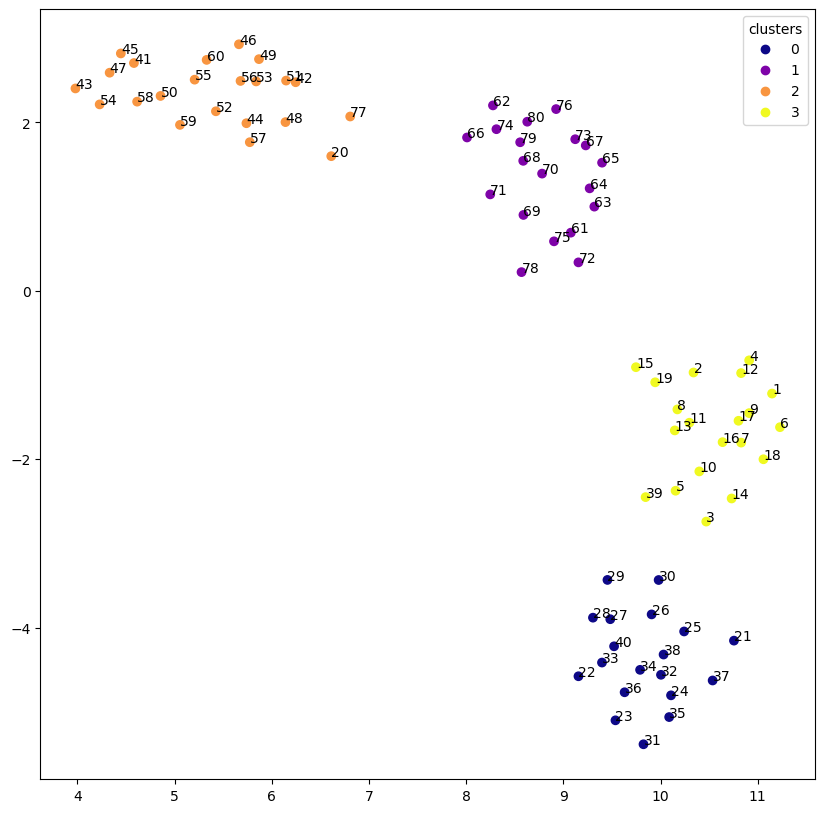

In [4]:
create_cluster(kg)

# Plot descriptions

In [5]:
#DATASET
plots = [
    #the equalizer
    "Robert McCall lives a quiet life in Boston, where he works at a hardware store. He helps a colleague, Ralphie, train to become a security guard. Unable to sleep, he often spends late nights reading at an all-night diner. Over time, he has befriended Teri, a teenage prostitute trafficked by the Russian mob. The pair often talk about the books Robert has been reading. One evening while taking a stroll, Teri shares that her real name is Alina and that she dreams of becoming a singer. Her pimp Slavi abruptly arrives, hits Alina, and forces her into the car. He hands a stunned Robert his business card and drives away.Alina is badly beaten and admitted into the ICU at a nearby hospital. Upon hearing the news, Robert travels there and learns from her friend Mandy, another prostitute, that Slavi is responsible. Robert finds Slavi and his men at their restaurant and offers to buy Alina's freedom, which Slavi bluntly refuses. Robert expertly kills the men and leaves. Unbeknownst to Robert, Slavi and his men were part of a much larger syndicate led by Russian oligarch Vladimir Pushkin. Teddy Rensen, Pushkin's enforcer, arrives in Boston to investigate the attack. Aided by Boston PD detectives on Pushkin's payroll, Teddy canvases rival gangs in the area, nearly beating Irish mob lieutenant Little John Looney to death to send a message.Robert continues exacting vigilante justice on criminals he encounters, blackmailing two corrupt police officers into returning racketeering money to Ralphie's mother and beating a gunman with a hammer after he robs the hardware store. Teddy kills Mandy after learning she concealed information about Robert and lied about her friendship with Alina. He visits Robert at his apartment, posing as a police detective, but Robert doesn't fall for the guise. Teddy flashes a picture of the strangled Mandy before walking away, offering it as a warning to Robert. Teddy and his mercenary group fail to abduct Robert on two occasions.Robert travels to visit old friends, Susan and Brian Plummer, who are former Defense Intelligence Agency colleagues. Until now, it was assumed that Robert died in a bombing incident long ago. He asks for Susan's help in identifying Teddy. She informs him of Pushkin's operation, and that Teddy's real name is Nikolai Itchenko, a Spetsnaz operative turned Russian secret police agent. She also reveals that Nikolai murdered two of the Boston PD detectives, and that one of them, Masters, had not been heard from in days.Robert tracks Masters down and threatens him into helping take down one of Pushkin's money laundering warehouses. Masters and Pushkin's men are taken into custody when the police arrive, and they find a note left by Robert to follow the money. He confronts Nikolai again, threatening to do more damage if he continues to pursue him. He later destroys two of Pushkin's oil tankers. In response, Nikolai abducts Robert's co-workers at the hardware store to force him to meet. Robert skips the meeting with Nikolai and instead kills the men guarding the hostages, to Nikolai's surprise. Nikolai arrives with his men, whom Robert kills one by one with improvised weapons collected throughout the hardware store. As Nikolai is about to kill Ralphie, who stayed behind to help, Robert kills him with a nail gun.Three days later, Robert finds Pushkin at his mansion in Moscow, killing all of his guards and tricking Pushkin into electrocuting himself to death. Sometime later following her recovery, Alina runs into Robert. She thanks him for the money he left her, describing how she's started a new life. Inspired to continue helping others, Robert posts online ads as The Equalizer.",
    # john wick 2
    "John Wick recovers his stolen Ford Mustang from Abram Tarasov, the late Viggo's brother.[N 1] Wick dispatches Tarasov's men in a violent rampage that heavily damages the Mustang but spares Tarasov under the promise of peace and returns home. Wick has his Mustang taken for repairs by chop-shop owner Aurelio.John is visited by the Camorra crime boss Santino D'Antonio, who reminds him that he helped John complete his impossible task, which allowed John to retire and marry Helen. In return, John swore to a marker, an unbreakable vow symbolized by a blood oath medallion. Santino presents the marker to demand services from John, who declines, so Santino retaliates by destroying John's house with a grenade launcher. John survives and travels to the Continental Hotel in New York City, where Winston reminds him that if he rejects the marker, he will violate one of the underworld's two unbreakable rules: no killing on Continental grounds and honoring every marker. John reluctantly accepts his commitment and meets with Santino, who tasks him with assassinating his sister, Gianna, so that he can claim her seat at the High Table, a council of twelve high-level crime bosses. Santino sends Ares, his mute bodyguard, to observe John's mission.In Rome, Italy, John infiltrates Gianna's coronation, confronting her in her dressing room. Faced with certain death, Gianna chooses to slit her wrists. As Gianna dies, John shoots her in the head to end her suffering and fulfill the marker. As John leaves, Gianna's bodyguard, Cassian, recognizes him, realizes that he was sent to kill Gianna, and attacks him. John flees to the catacombs, where he is double-crossed by Ares and Santino's henchmen, who intend to tie up loose ends by killing him. After killing most of the henchmen, John is again pursued by Cassian. Their fight leads them into the Rome Continental's reception area, where conducting business is strictly forbidden, like the New York Continental. As the two share a drink, John explains his reason for killing Gianna. Nevertheless, Cassian promises John a quick and clean death as a sign of professional respect.Julius, the Roman Continental's manager, arranges safe passage for John back to New York as Santino opens a contract for $7 million to kill John, ostensibly to avenge his sister's death. This leads numerous assassins to unsuccessfully attack John, during which Winston visits Santino to complete the marker, thus freeing John from being unable to move against him. Winston warns Santino that he stabbed the devil in the back and that he will be unprepared for John's wrath.Injured from numerous attempted assassinations, John is then confronted by Cassian in the subway. After a vicious fight culminating in Cassian being stabbed in the aorta, John spares him. The badly injured John seeks help from an underground crime boss known as the Bowery King, whose subordinates treat John's injuries. Intrigued by John's intent to kill a member of the High Table, the Bowery King sportingly gives him a Kimber M1911 pistol with only seven bullets, one for each million of the contract. He directs John to an art museum where Santino holds a gala. John pursues Santino throughout the museum, killing his remaining henchmen, including Ares, who gives Santino enough time to escape to the Continental, where he intends to remain indefinitely in its sanctuary. Despite Winston's warnings, the exasperated John shoots and kills Santino in the Continental lounge.The next day, Winston meets with John and explains that the Camorra has doubled the contract on John, offering it globally. Further, for conducting business on Continental grounds, per the High Table's rules, Winston is forced to declare John excommunicado, terminating all his access and privileges to underworld resources. However, Winston delays activating John's excommunication by one hour (giving him a head start) and provides him with a marker for future use. Before leaving, John advises Winston to warn every other High Table assassin that he will kill anyone who tries to hunt him. John departs with his dog as Winston makes a call enacting John's excommunicado to be activated in one hour. As news of the imminent contract disseminates, cellular phones ring all around, and John begins to run.",
    # extraction
    "Ovi Mahajan – son of incarcerated Indian drug lord Ovi Mahajan. Sr – sneaks out of his house to visit a club with his friend. At the party, Ovi and his friend go to the garage to have a smoke, where they encounter corrupt police officers working for rival Bangladeshi drug lord Amir Asif, who shoot Ovi's friend and kidnap him. After discovering this, Saju Rav — a former Lieutenant Colonel in the Indian Army Para Special Forces and Ovi's protector — visits Ovi's father in prison. Unwilling to pay the ransom or surrender his territories to Amir as it will hurt his prestige, Ovi's father orders Saju to retrieve his son, threatening to kill Saju's own son if he is unwilling to do so. Tyler Rake, a former Australian Army Special Air Service Regiment (SASR) operator turned black-market mercenary, is recruited by his handler Nik Khan to save Ovi from Dhaka, Bangladesh.Tyler and Khan's team prepare to extract Ovi, with his father's men set to pay them once Ovi is recovered. Tyler saves Ovi, kills his captors, and takes him to the extraction point. Learning of Ovi's escape, Asif orders the head of the local police, Colonel Rashid, to initiate an immediate lockdown of Dhaka, securing all bridges and travel points out of the city. Ovi's father's men intentionally fail to transfer the funds as it is revealed that Ovi Sr's bank account has been frozen by the authorities, so he had no means to pay the mercenaries in the first place. Saju kills Tyler's teammates and tries to kill Tyler so he can save Ovi himself and cheat the mercenaries out of their payment. Khan arranges for a helicopter to extract Tyler outside the city and tells him to abandon Ovi since the contract has been nullified.Tyler refuses to leave Ovi behind, haunted by memories of his own son, whom he abandoned after he couldn't stand seeing him suffer from lymphoma any longer. After escaping Saju and the corrupt Dhaka Metropolitan Police tactical units on Asif's payroll, Tyler fights off a gang of boys led by Farhad, a young criminal eager to impress Asif. Tyler calls his friend Gaspar, a retired squad-mate living in Dhaka, and he and Ovi lay low at Gaspar's home for the evening. Gaspar reveals Asif has placed a $10,000,000 bounty on Ovi, which he offers to share if Tyler allows him to kill Ovi. Tyler refuses and fights Gaspar, who gains the upper hand but is shot by Ovi with Gaspar's own gun. Tyler calls Saju and asks for his help, forcing them to team up to escape Dhaka.Tyler draws attention away from a disguised Saju and Ovi as the two make their way through a bridge checkpoint before following to cover their escape. Khan and her remaining mercenaries approach from the opposite side of the bridge, as Asif watches from afar with binoculars. In the ensuing firefight, Saju is shot by Rashid, who is in turn shot by Khan. Wounded, Tyler instructs Ovi to run to Khan's waiting helicopter. As a badly wounded Tyler follows, he is shot in the neck by Farhad and seeing Ovi is safe, falls into the river. Ovi, Khan, and the extraction team escape to Mumbai and safety. Eight months later, Khan encounters Asif in a restroom and promptly shoots him. Ovi jumps into his school's swimming pool to practice holding his breath, mirroring the scene where Tyler is introduced. He surfaces to see a blurred vision of a man, resembling Tyler, watching him.",
    #the raid
    "Rookie Brimob officer Rama trains before joining a 20-man squad led by Sergeant Jaka and Lieutenant Wahyu for a raid on an apartment block with the intent of arresting crime lord Tama Riyadi. Together with his lieutenants Andi and Mad Dog, Tama runs the block and allows criminals and addicts to rent rooms under his protection. Arriving undetected, the team sweeps the first floor and subdue various tenants; they also meet a law-abiding tenant named Gofar delivering medicine to his sick wife. Continuing to the sixth floor, the team is spotted by two young lookouts, one of whom raises the alarm.Tama calls in reinforcements, including a pair of snipers who pick off officers guarding the block's exterior, and a group of gunmen who destroy the truck they are using. Taking advantage of the chaos outside, Tama's men successfully set themselves free and manage to regain control of the first five floors. Tama then cuts the lights and announces over the PA system that the rest of the officers are on the sixth-floor stairwell, and that he will grant permanent residence to those who kill them. Wahyu confesses to Jaka that he staged the mission so he can eliminate Tama, who is in league with corrupt police officials, including himself; the mission is not officially sanctioned by police command, and there will be no reinforcements. The remaining team members are ambushed by shooters from above and are almost completely wiped out.The remaining officers—Rama, Bowo, Jaka, Wahyu, Dagu, Alee, Hanggi and one other—retreat to an empty apartment and are cornered by more armed thugs. Rama uses an axe to create a hole in the floor so the team can descend to the lower level. Dropping to the room below, the team struggles to fend off Tama's thugs; Alee, Hanggi and an other officer are killed and Bowo is gravely wounded. Rama uses a propane tank to construct an improvised explosive device that eliminates the invading henchmen. With more of Tama's reinforcements approaching, the team splits into two groups: Jaka, Dagu, and Wahyu retreat to the fifth floor, while Rama and Bowo ascend.After fighting a group of assassins, Rama and Bowo locate Gofar's apartment, and Gofar reluctantly hides the officers inside. Gangs wielding machetes search the apartment but fail to find them. After tending to Bowo's wounds, Rama leaves to search for Jaka's group. Rama encounters the machete gang and defeats them in a long fight, tackling their leader through a window and plummeting onto a fire escape below. On the sixth floor, he finds Andi, who has murdered two of Tama's men. Andi is revealed to be his estranged brother, whom Rama signed up for the mission to search for, at the urging of their father. Rama refuses to leave the building without his comrades, and Andi refuses to abandon his criminal life. Rama parts ways with his brother to search for his surviving colleagues.Mad Dog discovers Jaka and his group on the fourth floor. Wahyu runs off, and Jaka instructs Dagu to protect him. Mad Dog challenges Jaka to hand-to-hand combat; he ultimately gains the upper hand and kills Jaka, by breaking his neck. Mad Dog then meets up with Andi to report back to Tama. Tama, having learned of Andi's treachery through his surveillance cameras, attacks and incapacitates Andi. Rama regroups with Dagu and Wahyu, and they head for Tama on the 15th floor, fighting through a narcotics lab along the way. Rama separates from Dagu and Wahyu when he discovers Mad Dog torturing Andi. Mad Dog lets Rama free Andi and fights them both. After a long and brutal fight, Mad Dog is ultimately killed by Rama and Andi.Meanwhile, Wahyu and Dagu confront Tama. Wahyu kills Dagu before taking Tama hostage. Tama taunts Wahyu by revealing that he knew they were going to raid the building, that Wahyu was set up by his corrupt superior Reza, and that he will be killed regardless. A panicked and desperate Wahyu kills Tama and then attempts suicide, only to find he is out of ammunition. Andi uses his influence to allow Rama to leave with the injured Bowo and a detained Wahyu. Andi also hands over blackmail recordings Tama made of the corrupt officials he dealt with, telling him to contact Officer Bunawar. Rama asks Andi to come home, but Andi refuses and asserts that he can protect Rama inside this criminal underworld, but that Rama cannot do the same for him on the outside. As Rama, Bowo and Wahyu leave, Andi turns around and walks back to the apartment block, smiling for the first time.",
    #Atomic Blonde
    "In November 1989, days prior to the collapse of the Berlin Wall, MI6 agent James Gascoigne is shot and killed by KGB agent Yuri Bakhtin, who steals The List, a microfilm document concealed in Gascoigne's wristwatch containing the names of every intelligence agent (on both sides) active in Berlin. Ten days later, Lorraine Broughton, a top-level MI6 spy, is brought in to be debriefed by MI6 executive Eric Gray and CIA agent Emmett Kurzfeld about her just-finished mission to Berlin. The plot jumps between the debriefing room and flashbacks to Lorraine's time in Berlin.The day after Gascoigne's death, Lorraine is dispatched to recover The List and is told to keep an eye out for Satchel, a double agent for the KGB who has been a problem for MI6 for years. Arriving in Berlin, she is immediately ambushed by KGB agents speaking English and apparently posing as her own MI6 team, who attempt to deliver a message from their boss, Aleksander Bremovych. She is able to escape their grasp by crashing their car and is immediately picked up by her real MI6 contact, maverick MI6 station head David Percival, who should have been the one to pick her up initially. Percival is addicted to the Bohemian lifestyle he has been leading on both sides of the Berlin wall and resentful of Lorraine and the implied supervision from London she brings, and he seems unwilling to cooperate with her. Lorraine searches Gascoigne's apartment and discovers a picture of him and Percival. In the debriefing, she tells Gray and Kurzfeld that Percival had previously denied knowing Gascoigne and she suspects Percival was behind the West Berlin police ambushing her while she searched Gascoigne's apartment. When Lorraine visits a restaurant mentioned by the KGB agents she encounters Bremovych, but is saved by Delphine Lasalle, a novice French agent. Although Lorraine is initially suspicious of Lasalle, they eventually enter into a sexual relationship after a passionate kiss in a nightclub, where Lasalle tells Lorraine that she knows who she is and why she's in Berlin, and suggests that they should work together.Percival, having tailed Lorraine, surveils a watchmaker she visited. He spots Bakhtin entering the same shop. Bakhtin tells the watchmaker he has a watch full of secrets he will sell to the highest bidder. Kurzfeld meets with Lorraine in Berlin, handing her a newspaper containing a number which, when called, informs her Satchel has been compromised. Percival lures Bakhtin to an alley, kills him, and takes the wristwatch from which he discovers who Satchel is. Lorraine, who does not know Percival has The List, finds out that the Stasi officer codenamed Spyglass, who gave The List to Gascoigne, also memorized the names on it. Lorraine and Percival make plans to escort him across the border to West Berlin. Percival meets with Bremovych, who suspects Percival has The List, but Percival offers only the second best thing—the identity and operations details of Satchel to keep the balance, also tipping him off about the plan to extricate Spyglass from East Berlin. Lasalle covertly photographs the meeting.During the extrication of Spyglass, Percival secretly shoots him when the KGB agents are unable to. Lorraine battles multiple KGB agents while rescuing the wounded Spyglass, however, he drowns when their car is pushed into a river by the same KGB agent whose car Lorraine crashed when she first arrived in Berlin. Lorraine makes it to West Berlin and realizes Percival has planted a bug in her coat. She tells Lasalle, who calls Percival and threatens him with her knowledge of his Bremovych meeting. Percival goes to Lasalle's apartment and kills her, fleeing as Lorraine arrives moments later. Lorraine discovers the photographs taken by Lasalle and realizes Percival has read The List. Percival burns his safehouse and attempts to flee, but Lorraine arrives, kills him, avenging Lasalle, and takes The List.In the MI6 debriefing, Lorraine discovers Percival had told Gray he had The List and he was very close to Satchel. She presents Lasalle's photographs and doctored audio recordings, which paint Percival as Satchel. She denies knowing The List's whereabouts, leaving MI6 no choice but to close the case.Three days later in Paris, Lorraine, now speaking in Russian, meets with Bremovych, who addresses her as Comrade Satchel. Bremovych, having learned from Percival there is more to Satchel than he had previously known, orders his men to kill her. Lorraine kills his henchmen. Then, speaking with an American accent, she tells Bremovych she always fed him misinformation to manipulate the KGB. Then she kills him. She and Kurzfeld (CIA) return to the United States with The List. In their friendly conversation, it is implied Lorraine is actually a triple agent and had been working for the CIA all along.",
    #wrath of man
    "In Los Angeles, an armored truck robbery leaves two guards and a bystander dead. This sets off a series of events told in four acts.A Dark SpiritFive months after the robbery, Patrick Hill joins Fortico Security as an armored truck guard. His manager Terry commends his references and company trainer Bullet nicknames him H. Hill barely passes firearm training and gets off to a rocky start with his colleagues, including “Boy Sweat” Dave and Dana Curtis. During a pickup, Bullet is taken hostage, and Hill convinces a panicked Dave to comply with the robbers before he disposes of the entire crew with expert marksmanship and merciless efficiency.Hill is questioned by FBI agents investigating the first robbery. The FBI investigators bring their suspicions about Hill to their superior, Agent King, who tells them to leave Hill alone. Hill receives a dossier of Fortico employee files and an autopsy report. Three months later, Hill and Bullet are waylaid in Chinatown, but the robbers flee at the sight of Hill. Hill continues to investigate his coworkers and they become increasingly suspicious of him.Scorched EarthFive months before joining Fortico, on the day of the first robbery, Hill is with his son Dougie. Revealed to be working with a robbery crew, Hill grudgingly agrees to monitor an armored truck's route, leaving Dougie in the car. A group of robbers hijack the truck and spot Dougie. Hill races back to his son and watches as Dougie is murdered before he is also shot and left for dead.Three weeks later, Hill wakes up in the hospital. He meets with King, who gives him a list of suspects and agrees to temporarily turn a blind eye. Hill is revealed to be Mason Hargreaves, a notorious crime lord; determined to find Dougie's killer, Hargreaves and his men — led by Mike, Brendan, and Moggy — kill nearly everyone on King's list, without results. Mike voices his concerns about retaliation, and Hargreaves agrees to lay low in London, but instead assumes the identity of Patrick Hill and joins Fortico to continue the hunt alone. It was Hargreaves' own crew who attempted the Chinatown robbery until Mike recognized him.Bad Animals, BadSometime before the first robbery, a group of disgruntled Afghanistan veterans — Carlos, Sam, Brad, Tom, Jan, and their former sergeant, Jackson — decide to become thieves. Their first robbery results in only a few hundred thousand dollars, so with help from an unidentified guard who served under Jackson, they pull off a more ambitious heist of an armored truck. Later, Hargreaves and his men help them arrange the Fortico heist; unaware of Hargreaves' identity, Jan needlessly shoots the guards, Dougie, and Hargreaves, who sees Jan's face.Liver, Lungs, Spleen & HeartFive months later, the veterans reunite to steal over $150 million from the Fortico depot on Black Friday weekend. Bullet reveals to Hargreaves that he is Jackson's inside man, threatening him into cooperating. The crew takes the depot hostage, but an alarm is triggered; in the ensuing gunfight, multiple guards are killed and Hargreaves kills and wounds several robbers. Fleeing with Bullet and Jackson, Jan murders them to escape alone with the money. At home, Jan finds a phone in one of the money bags, planted by Hargreaves to track its location. Hargreaves confronts him with Dougie's autopsy report, shooting him in the same places he shot Dougie. Abandoning the money, Hargreaves tells King his task is done and is driven away.",
    # old guard
    "Andromache of Scythia (Andy), Booker, Joe, and Nicky are centuries-old warriors with unexplained regenerative healing abilities who use their vast experience to work as mercenaries, taking missions that help people. Breaking their rule of never working for the same employers twice, they accept a job from former CIA operative James Copley to rescue a group of kidnapped girls in South Sudan. During the mission, which proves to be a ruse, they are ambushed and killed. After quickly recovering and killing their attackers, they realize that Copley set them up and remotely filmed their regeneration.Meanwhile, in Afghanistan, U.S. Marine Nile Freeman has her throat slit while taking down a military target during a house search, only to recover without a scratch. Later, she shares a disturbing dream with the other immortals, who are then alerted to her existence, as they experience dreams of any new immortals until found. Andy tracks down a confused Nile and extracts her from Afghanistan before military personnel can transfer her for further testing.Copley shows the video of the ambush to pharmaceutical executive Steven Merrick, who sends operatives to capture the team. Andy brings Nile to a safe house in France, where she meets the rest of their team. The group shares some of their past and reveal that they are not truly immortal: their ability to heal eventually stops, without warning, which happened to a previous immortal, Lykon. She is also told about the female immortal Quynh, the first of Andy's comrades, who was captured, accused of witchcraft, and lost to them when cast somewhere into the sea in an iron maiden, and has been continually drowning ever since.The group is ambushed by Merrick's forces; Joe and Nicky are captured while a seemingly deceased Booker is left behind. While Booker regenerates, Andy kills all of their assailants but is wounded and realizes she is not healing. Booker locates Copley, while Nile separates from the group to reunite with her family.Andy and Booker confront Copley, only for Booker to betray Andy and shoot her, arguing that Merrick might find a way to end the immortality they have both grown weary of. As they are captured, however, Booker realizes that Andy is not healing. Copley has a change of heart when he sees that Merrick is willing to torture the immortals indefinitely to study them. Nile, having realized Booker sold out the group, arrives too late to intervene, but she convinces Copley to assist her in a rescue mission. She storms Merrick's London office and after she frees the rest of the immortals, they fight their way out through the rest of Merrick's security, with Nile saving Andy from Merrick by grabbing him and jumping out of a window, killing him.As punishment for his betrayal, the group sentence Booker to loneliness - forbidding Booker from contacting them for 100 years. The rest of the group meets with Copley, who explains how his research revealed their past missions had a greater effect than they ever knew, with the descendants of people they had rescued going on to help the world in many different ways. With renewed faith in their existence, the group tasks Copley with maintaining their secret and finding missions where they can have an effect.Six months later in Paris, a depressed and drunken Booker is astonished to find Quynh in his apartment.",
    # mission impossible
    "Two years after Solomon Lane's capture, the remnants of the Syndicate have reorganized as a terrorist group known as the Apostles, having adopted the 'Terror for hire' policy. They are hired by an extremist known as John Lark, and are attempting to acquire three stolen plutonium cores for him to use in three nuclear bombs. IMF Agent Ethan Hunt is assigned to recover the plutonium. During the mission in Berlin, the Apostles take fellow teammate Luther Stickell hostage. Ethan chooses to save Stickell, allowing the Apostles to steal the cores. The IMF team later captures Norwegian nuclear weapons expert Nils Delbruuk, whom the CIA believes is building weapons for Lark. Using a fake broadcast of teammate Benji Dunn posing as CNN's Wolf Blitzer and announcing the bombings of Rome, Jerusalem and Mecca, they trick Delbruuk into unlocking a phone he used to communicate with Lark.Furious at the IMF's failure to secure the plutonium, CIA Director Erika Sloane instructs Special Activities Division Agent August Walker to accompany Ethan on a mission to retrieve it. Ethan and Walker infiltrate a Paris nightclub where Lark is supposed to purchase the plutonium from the Apostles, with arms dealer Alanna Mitsopolis acting as a broker. They track a man they suspect to be Lark, but after an intense fight in the men's restroom, he is killed by MI6 Agent Ilsa Faust. Ethan assumes the identity of Lark and meets with Mitsopolis, but the meeting is cut short when hitmen attack. In exchange for the plutonium, Mitsopolis tasks Ethan with extracting Lane from an armored convoy moving through Paris, and provides one of the cores as a down payment.Ethan and Walker preemptively attack the convoy to prevent Mitsopolis’ brother Zola and their men from killing local police. They lead both the police and Mitsopolis's men on a chase while Dunn and Stickell secure Lane. Mitsopolis then instructs Ethan to deliver Lane to London. At a London safe house, IMF Secretary Hunley orders Ethan to stop the mission and turn himself in after receiving doctored evidence implicating Ethan as Lark. The team trick Walker into admitting he is the real Lark and inform Sloane, who sends a CIA unit to take everyone into custody. However, the unit has been infiltrated by the Apostles and is under Walker's command.Walker kills Hunley and Ethan pursues him to Tate Modern, where Walker threatens his ex-wife, Julia, before escaping by helicopter. The team, along with Faust, track Lane and Walker to a medical camp over the Siachen Glacier. Faust deduces that Lane is planning to detonate the nuclear bombs at the medical camp, contaminating the water supply of India, Pakistan, and China, resulting in the destruction of 1/3 of the world's population. The bombs are linked by a failsafe; any attempt to defuse one bomb without also disarming the detonator will trigger the other. Ethan discovers Julia and her new husband Erik are working at the camp. Lane programs the bombs' detonator with a 15-minute countdown and gives it to Walker.Walker takes off in a helicopter while Dunn, Stickell, and Faust try to find and defuse the nuclear weapons. Julia helps Stickell disarm the first bomb, but they are unable to defuse it without the detonator. Faust finds the second bomb but is ambushed and subdued by Lane; Dunn and Faust eventually overpower him. Ethan hijacks an escort helicopter and manages to ram Walker's out of the sky. The two men fight on the edge of a cliff, which ends when Ethan drops a hook attached to a helicopter on Walker. Ethan secures the detonator, allowing the team to deactivate the bombs. In the aftermath, Julia tells Ethan that he has given her the best life, despite his commitment to the IMF. Sloane hands Lane over to MI6 through Mitsopolis, earning Faust her exoneration, and praises Ethan for his actions.",
    #john wick
    "In New York City, John Wick is grieving the death of his wife Helen, who had arranged for John to receive a beagle puppy to help him cope with her loss. A few days later, a group of Russian gangsters led by Iosef Tarasov accosts John at a gas station and fail to intimidate him into selling them his 1969 Boss 429 Mustang.[b] That night, they break into John's home, assault him, kill the puppy, and steal the car. Iosef takes the Mustang to a chop shop to remove its identifying details, but the shop owner Aurelio, recognizing the vehicle, refuses service. Aurelio informs John that Iosef is the son of Viggo Tarasov, the boss of New York City's Russian mafia.Learning of his son's actions, Viggo beats and berates Iosef for incurring John's wrath, revealing John was once a hitman in his employ, and was renowned and feared in the criminal underworld as the Baba Yaga, a ruthless, relentless man of focus, commitment, and sheer will. After John fell in love with Helen, a civilian, Viggo gave him a seemingly impossible task to earn his freedom; he succeeded.John recovers a concealed stash from his former career that includes weapons and gold coins. He refuses Viggo's attempt to make amends for his son's actions and kills the hit squad subsequently sent to his home. As a result, Viggo puts a $2 million bounty on John's head and his former mentor Marcus is enlisted to kill John. John lodges at the Continental, a luxurious hotel that serves as neutral ground for the underworld and where conducting criminal business is forbidden. The hotel's owner and John's old friend Winston warns John about the dangers of returning to his old life but also secretly informs John that Iosef is at a nightclub called Red Circle. John infiltrates Red Circle and confronts Iosef but he is attacked by Viggo's henchman Kirill and is forced to retreat to the Continental for medical attention.As John rests, a hitwoman named Ms. Perkins sneaks into his room. Marcus sees Perkins from an adjacent building and fires a warning shot to alert John, who wakes up and subdues Perkins. Perkins reveals Viggo has doubled the bounty for her to kill John in the hotel. She also discloses Viggo has concealed a high-value stash in a church. John hires another hitman named Harry to secure Perkins but she escapes and kills Harry.At the church, John destroys Viggo's cache of cash and extensive blackmail material. When Viggo arrives to assess the damage, John assaults him and his men but is hit by Kirill's car and captured. John tells Viggo he will not stop until Iosef is dead because the puppy gave him hope and a chance to not be alone in his grief for Helen. Marcus again intervenes to save John, allowing him to kill Kirill and threaten Viggo into revealing his son's location in a safehouse. John assaults the safehouse and kills Iosef. Marcus encourages John to return to his everyday life, but Perkins witnesses their meeting and reveals Marcus's duplicity to Viggo, who has Marcus tortured and killed then calls John to taunt him with the details, drawing him back to the city.Winston has Perkins executed for breaking the Continental's rules, then informs John that Viggo is preparing to leave the city by helicopter. John races to New York Harbor, where he fights and mortally wounds Viggo. Resigned to dying from his injuries, John watches on his phone a video of Helen telling him they need to go home. He breaks into a nearby animal clinic, treats his wounds, and adopts a pit bull puppy scheduled to be euthanized before beginning to walk home.",
    #dark knight
    "A gang of masked criminals robs a mafia-owned bank in Gotham City, each betraying and killing each other until the sole survivor, the Joker, reveals himself as the mastermind and escapes with the money. The vigilante Batman, district attorney Harvey Dent, and police lieutenant Jim Gordon ally to eliminate Gotham's organized crime. As Batman's alter-ego, the billionaire Bruce Wayne, publicly supports Dent as Gotham's legitimate protector, believing his success will allow Batman to retire so Wayne can romantically pursue his childhood friend Rachel Dawes, despite her relationship with Dent.Gotham's mafia bosses gather to discuss protecting their organizations from the Joker, the police, and Batman. The Joker interrupts the meeting and offers to kill Batman for half of the fortune their accountant, Lau, concealed before fleeing to Hong Kong to avoid extradition. With the help of Wayne Enterprises CEO Lucius Fox, Batman finds Lau in Hong Kong and returns him to the custody of Gotham police. His testimony enables Dent to apprehend the crime families. The bosses accept the Joker's offer, and he kills high-profile targets involved in the trial, including the judge and police commissioner. Although Gordon saves the mayor, the Joker threatens that his attacks will continue until Batman reveals his identity. He targets Dent at a fundraising dinner and throws Rachel out of a window, but Batman rescues her.Wayne struggles to understand the Joker's motives, but his butler Alfred Pennyworth says some simply relish destruction. Dent claims he is Batman to lure out the Joker, who attacks the police convoy transporting him. Batman and Gordon apprehend the Joker, and Gordon is promoted to commissioner. At the police station, Batman interrogates the Joker, who says he finds Batman entertaining and has no intention of killing him. Having deduced Batman's feelings for Rachel, the Joker reveals she and Dent are being held separately in buildings rigged to explode. Batman races to save Rachel while Gordon and the other officers go after Dent, but they discover the Joker has switched their positions. Rachel is killed in the explosion, while Dent's face is severely burned on one side. The Joker escapes custody, extracts the fortune's location from Lau, and burns all of it, killing Lau in the process.Wayne Enterprises accountant Coleman Reese deduces Batman's identity and attempts to expose it, but the Joker threatens to blow up a hospital unless Reese is killed. While the police evacuate hospitals and Gordon struggles to keep Reese alive, the Joker meets with a disillusioned Dent, persuading him to take the law into his own hands and avenge Rachel. Dent defers his decision-making to his half-scarred, two-headed coin, killing the corrupt officers and the mafia involved in Rachel's death. As panic grips the city, the Joker reveals two evacuation ferries, one carrying civilians and the other prisoners, are rigged to explode at midnight unless one group sacrifices the other. To the Joker's disbelief, the passengers refuse to kill one another. Batman subdues the Joker but refuses to kill him. Before the police arrest the Joker, he says although Batman proved incorruptible, his plan to corrupt Dent has succeeded.Dent takes Gordon's family hostage, blaming his negligence for Rachel's death. He flips his coin to decide their fates, but Batman tackles him to save Gordon's son, and Dent falls to his death. Believing Dent is the hero the city needs and the truth of his corruption will harm Gotham, Batman takes the blame for his death and actions and persuades Gordon to conceal the truth. Pennyworth burns an undelivered message to Wayne from Rachel, who said she chose Dent, and Fox destroys the invasive surveillance network that helped Batman find the Joker. The city mourns Dent as a hero, and the police launch a manhunt for Batman."
    ,"Ex-Green Beret and ex-CIA officer Bryan Mills attempts to build a closer relationship with his 17-year-old daughter, Kim, who lives with her mother (his ex-wife) Lenore, and her wealthy stepfather, Stuart. While overseeing security at a concert for pop star Sheerah, Bryan saves her from a knife-wielding attacker. Out of gratitude, Sheerah offers to have a vocal coach assess Kim as a singer. Before Bryan can tell her about the offer, Kim asks him for permission to travel to Paris with her best friend, Amanda. He initially refuses, concerned about her safety, but eventually gives in. At the airport, Bryan learns that Kim lied; the girls are actually planning to follow U2 during their European tour.Upon arriving at Charles de Gaulle Airport, Kim and Amanda meet Peter, a handsome young stranger who offers to share a taxi. Kim and Amanda go to Amanda's cousins' apartment, where Kim learns that the cousins are in Spain. After answering a call from Bryan, Kim sees men enter the apartment and abduct Amanda. When Kim is dragged out from hiding, she yells a description of her abductor, following her father's instructions. Bryan hears someone breathing on the phone and tells the listener that he will not pursue the kidnappers if they release his daughter, but warns them that refusing to accept his offer will result in their deaths.[8] The listener only replies good luck and terminates the call.Sam, an old friend and former colleague of Bryan, deduces that the kidnappers are part of an Albanian sex trafficking ring and identifies the listener as mob boss Marko Hoxha. Based on previous abductions, Kim must be found within 96 hours or she will likely be lost forever. Bryan flies to Paris, breaks into the apartment, and finds Peter's reflection in a picture on Kim's phone. He finds Peter at the airport, trying to lure a female traveler. Bryan gives chase in a stolen taxi. While fleeing, Peter is suddenly struck and killed by an oncoming truck. With his only lead dead, Bryan turns to an old contact, ex-DGSE agent turned National Police officer Jean-Claude Pitrel, who now has a desk job. Jean-Claude warns him not to get involved, but informs him of the local red-light district where Bryan plants a listening device on an Albanian pimp. Bryan searches a makeshift brothel in a construction yard and rescues a drugged young woman who has Kim's denim jacket. After a gunfight and high-speed chase with the brothel's operators, Bryan takes the woman to a hotel, where he improvises her detoxification.The next morning, the woman tells Bryan of a house where she and Kim were kept. Posing as Jean-Claude, Bryan enters the house under the pretense of renegotiating the police protection rate. When he identifies Marko by tricking him into saying good luck, the meeting erupts into a fight which results in the deaths of several gangsters. Searching the house, Bryan finds several heavily drugged girls, including Amanda, who died of an overdose. Bryan then tortures Marko with electricity, forcing him to confess that virgins like Kim are quickly sold on the black market. Marko identifies the buyer as crime syndicate leader Patrice Saint-Clair before Bryan leaves him to die from continuous electrocution.At Jean-Claude's apartment, Bryan confronts the police officer over his corruption and shoots his wife, wounding her, to coerce him into disclosing Saint-Clair's location, before knocking him out. Bryan infiltrates a secret sex slave auction taking place beneath Saint-Clair's mansion, where Kim is the subject of the last sale. Bryan forces Ali, one of the bidders, to purchase her, but is subsequently caught and knocked out. When Saint-Clair learns who he is, he orders his henchmen to kill Bryan, but Bryan breaks loose and kills them all. Saint-Clair reveals that Kim was taken to a yacht owned by a sheikh named Raman before Bryan murders him.Bryan pursues the yacht and eliminates the bodyguards, including Ali, before he finds Raman holding Kim at knifepoint. When Raman attempts to negotiate, Bryan kills him with a headshot and Kim is rescued. Back in the United States, Bryan surprises Kim by taking her to visit Sheerah."
    ,"In 1997, probationary secret agent Lee Unwin sacrifices himself in the Middle East to save his superior, Harry Hart. Blaming himself for Lee's death, Harry returns to London and gives Lee's young son Gary Eggsy a medal engraved with an emergency assistance number.Seventeen years later, Eggsy is a rebellious chav, having dropped out of training for the Royal Marines despite his intelligence and talent for gymnastics and parkour.[11][12] Arrested for stealing a car, Eggsy calls the emergency number, leading Harry to arrange his release and subdue Eggsy's abusive stepfather's gang. Harry explains that he is a member of Kingsman, a private intelligence service founded by the British elite who lost their heirs in World War I and put their money toward protecting the world; the organisation is named for the tailor shop in Savile Row used as a front for their operations.Harry, codename Galahad, nominates Eggsy to replace agent Lancelot, who was killed by the assassin Gazelle while trying to rescue radical climate change scientist Professor James Arnold from kidnappers. Kingsman's technical support operative Merlin discovers Arnold working as though nothing has happened. Hart attempts to interrogate the professor at Imperial College London, but a microchip in Arnold's neck explodes, killing him and putting Harry in a coma. The detonation signal is traced to Gazelle's employer Richmond Valentine, a billionaire philanthropist who has offered everyone in the world SIM cards with free cellular and Internet access. Hart, after recovering from his coma, poses as another philanthropist to meet Valentine.Eggsy befriends fellow Kingsman trainee Roxy, and he endures Merlin's tests until they are the only candidates left. However, Eggsy refuses his final test — seemingly shooting a Pug puppy he was given to raise — and Roxy is named the new Lancelot. Harry learns of Valentine's connection to a religious hate group and travels to their church in Kentucky, wearing glasses containing a video transceiver. As Eggsy watches Harry's footage, Valentine triggers the SIM cards inside the church with a signal that causes the parishioners and Harry to become murderously violent. Harry is the only survivor thanks to his fighting abilities, but is shot in the face by Valentine, apparently killing him.Eggsy returns to Kingsman headquarters and notices Chester King, codename Arthur and Kingsman's leader, has the same implantation scar on his neck as Professor Arnold. King reveals Valentine's plan to transmit his violence-inducing signal worldwide, culling most of humanity to avert its extinction from global warming. Valentine has recruited various world leaders and wealthy elite to his cause, implanted with chips to protect them from the signal; those who refuse are held captive at his bunker, including Crown Princess Tilde of Sweden. King poisons Eggsy's drink, but Eggsy switches glasses while distracting him, letting King poison himself instead, and extracts the chip from King's neck.Eggsy, Merlin and Roxy locate Valentine's bunker, where many of his conspirators are gathered. Roxy pilots high-altitude balloons to break up Valentine's satellite network, but he secures a replacement. Merlin flies to the bunker, where Eggsy masquerades as King but is discovered by failed Kingsman recruit Charlie Hesketh. Cornered by Valentine's men, Merlin activates the implanted chips' failsafe, killing the guards and conspirators as heads explode around the world. Valentine activates the signal, triggering worldwide pandemonium. Eggsy kills Gazelle and impales Valentine with one of Gazelle's sharpened prosthetic blades, stopping the signal, and shares the sexual encounter Princess Tilde offered him for saving the world.In a mid-credits scene, Eggsy, now the new Galahad, offers his mother and baby half-sister a new home and prepares to take on his stepfather and gang, just as Harry once did."
    ,"In the Mediterranean Sea, Italian fishermen rescue an American man adrift with two gunshot wounds in his back. They tend to his wounds and find he has no memory of his identity, but demonstrates advanced combat skills and fluency in several languages. They find a tiny laser projector under his skin in his hip that gives the number of a safe deposit box in Zürich, and the man decides to go investigate. He goes to the bank to investigate the deposit box where he finds various currencies, passports and IDs with different names, and a handgun. The man takes everything but the gun, and starts using the name on the American passport, Jason Bourne. After Bourne's departure, a bank employee contacts Operation Treadstone, a CIA black ops program. Treadstone's head, Conklin, issues alerts to police to capture Bourne and assigns three agents to kill him: Castel, Manheim, and the Professor.CIA Deputy Director Abbott contacts Conklin about a failed assassination attempt against exiled African dictator Wombosi, and Conklin promises that he will deal with the agent who failed. Bourne tries evading the Swiss police by using his U.S. passport to enter the American consulate, but is pursued by Marine guards. He escapes before offering $20,000 to Marie Kreutz, a 26-year-old German woman whom he saw at the consulate, to drive him to an address in Paris. Upon reaching the address, they enter an apartment where Bourne contacts a hotel through the phone. He inquires about the names on his passports there, learning that a John Michael Kane was registered but died two weeks before in a car crash. Castel ambushes Bourne and Marie in the apartment, but Bourne gets the upper hand. Instead of allowing himself to be interrogated, Castel throws himself from a window to his death.While searching through Castel's belongings, Marie finds wanted posters of Bourne and herself, and agrees to help him. After the two evade police in Marie's car, they spend the night in a Paris hotel. Meanwhile, Wombosi obsesses over the attempt on his life. Conklin, having anticipated this, planted a body to pose as John Michael Kane in a morgue to appear as the assailant, but Wombosi remains unconvinced and threatens to report the CIA’s actions to the media. The Professor then assassinates Wombosi on Conklin's orders. Bourne, posing as Kane, learns about the failed assassination attempt on Wombosi's yacht, and that the assassin was shot twice in the back during the escape, ultimately realizing that he was responsible for the attempt. Bourne and Marie take refuge at the French countryside home of Marie's friend Eamon and his children.Under pressure from Abbott to handle the matter, Conklin tracks Bourne's location and sends the Professor to kill him. The Professor is mortally wounded by Bourne, and reveals their shared connection to Treadstone before dying. Bourne sends Marie, Eamon, and the children away for their protection, then contacts Conklin via the Professor's phone, and they agree to meet alone in Paris. When Bourne sees Conklin is not alone, he abandons their meeting, but manages to place a tracking device on Conklin's car, leading Bourne to Treadstone's safe house in Paris. Bourne breaks in and holds Conklin and logistics technician Nicky Parsons at gunpoint. Conklin reveals to Bourne his association with Treadstone and presses him to remember his past. Bourne recalls his attempt to assassinate Wombosi through successive flashbacks.Under orders from Treadstone, Bourne infiltrated Wombosi's yacht as Kane and managed to get close enough to assassinate him. However, Bourne was unable to find the nerve to kill Wombosi while his children were present, and instead fled, being shot during his escape.Bourne announces he is resigning from Treadstone and warns Conklin not to follow him. As agents descend on the safe house, Bourne fights his way through. When Conklin leaves the safe house, he encounters Manheim, who kills him under Abbott's orders. Abbott then shuts down Treadstone. Abbott reports to an oversight committee that Treadstone is decommissioned before discussion turns to a new project codenamed Blackbriar.Some time later, Bourne finds Marie renting out scooters to tourists on Mykonos, and the two reunite."
    ,"Max Durocher is a meticulous Los Angeles cab driver trying to earn enough to start his own limousine business. One of the evening's fares is federal prosecutor Annie Farrell, who works for the U.S. Attorney for the Central District of California. On the drive to her office, they strike up a conversation and Annie gives Max her business card. Max's next fare is Vincent. Vincent tells Max that he is in Los Angeles for one night to complete a real estate deal, and offers Max $600 to drive him to several locations. Initially reluctant to violate regulations, Max eventually agrees. As Max waits at the first stop, a corpse falls onto his car. Vincent reveals himself to be a hitman and the body is one of five targets. He forces Max to hide the body in the trunk and continue driving.LAPD undercover narcotics detective Ray Fanning arrives at the building where Vincent made the kill, and reveals the victim was a police informant. At the second stop, Vincent restrains Max's hands to the steering wheel. Max asks a group of young men for help, but two of them rob him and seize Vincent's briefcase. Vincent kills them both and retrieves the briefcase. Fanning arrives at the hospital morgue to see the bodies of criminal lawyer Sylvester Clark, Vincent's second target, and the two dead thieves, and realizes that this is the work of a hitman. Vincent orders Max to drive to a jazz club. At the club, Vincent engages the owner Daniel in conversation. Vincent then reveals Daniel to have been his third target, as Daniel is set to testify against Vincent's client. Max pleads with Vincent to let Daniel go, causing Vincent to offer a compromise, betting Daniel cannot answer a question about Miles Davis.Daniel seemingly gives a correct answer, but Vincent unexpectedly shoots Daniel in the head, dissatisfied with his answer. He then reveals the correct answer. Learning of Max's nightly visits to the hospital to see his mother Ida, Vincent insists that Max proceed with the visit, where they inadvertently encounter Fanning in the hospital elevator but remain anonymous to each other. At the hospital, Ida is dismissive of her son's efforts but acts warmly around Vincent. She proudly tells Vincent that Max has his own limousine company, revealing Max has been lying to her for her approval. Overwhelmed, Max leaves, steals Vincent's briefcase, and hurls it onto a freeway where it is destroyed by a passing truck. With the information on his last two targets destroyed, Vincent coerces Max to meet drug lord Felix Reyes-Torrena to re-obtain the information.Max, posing as Vincent, acquires the information but Reyes-Torrena orders his men to kill Vincent if he does not complete the job. Max heads with Vincent to a nightclub, seeking the next target, Peter Lim. Fanning, while seeking a connection between the three victims, visits FBI agent Frank Pedrosa. Pedrosa identifies the victims as witnesses in a federal grand jury indicting Reyes-Torrena the following day. Pedrosa thinks that Max is the hitman, based on FBI surveillance of Max entering and leaving Reyes-Torrena's bar, and orders the FBI agents to protect Lim. At the nightclub, Vincent kills Reyes-Torrena's hitmen, Lim, and his bodyguards. Fanning rescues Max and smuggles him outside, but Vincent fatally shoots Fanning and coerces Max back into the cab. Following their getaway, Max confronts Vincent about his nihilistic beliefs, and they trade insults just before Max deliberately crashes the cab.Vincent escapes, but a police officer tries to arrest Max after seeing the corpse in the trunk. Max notices Vincent's open laptop, revealing that his final target is Annie. Max overpowers the police officer with Vincent's gun and rushes toward Annie's office building. Stealing a bystander's phone, Max calls Annie to warn her. Max reveals details about Vincent's previous victims, urging her to call 911. Vincent, who has armed himself with a gun from a security guard, corners Annie but is shot and wounded by Max, who escapes with Annie on foot. Vincent pursues the pair onto a metro rail train. Cornered on the train, Max engages Vincent in a sudden shootout. Vincent, fatally wounded, slumps into a seat. Max and Annie get off at the next station, as a deceased Vincent continues riding alone on the train."
    ,"Ex-cop and cage fighter Luke Wright unintentionally wins a fixed fight, angering Emile Docheski, head of the Russian mafia. As punishment, Docheski's son Vassily and his men kill Wright's pregnant wife, then promise to kill anyone to whom he speaks regularly. Luke leaves his life behind, becoming a homeless tramp. Meanwhile, in China, Mei, a young mathematical prodigy, is kidnapped by men working for Triad boss Han Jiao. Han wishes to use Mei as a mental calculator to eliminate his criminal enterprise's traceable digital footprint. He sends her to New York City, in the care of brutal gangster Quan Chang.One year later, Han arrives from China, asking Mei to memorize a long number. On the way to retrieve a second number, their vehicle is ambushed by the Russian mafia. Mei is taken to Emile, who demands the number, but Mei refuses. Before they can further interrogate her, they are interrupted by police, sent by the corrupt Captain Wolf, who works for Han. Mei escapes during the confusion, chased by the Russians to a nearby subway station, where Luke contemplates suicide. Recognizing Chemyakin, one of the men who killed his wife, and seeing Mei's distress, Luke boards the train and kills Chemyakin and the other Russians. Mei flees at the next stop, only to be stopped by two corrupt detectives working for Wolf. Luke arrives and incapacitates the detectives, convincing Mei of his good intentions, before he also dispatches some Russians.Hiding in a hotel, Mei explains the number to Luke, who guesses that it is the code to a combination safe. However, Quan tracks Mei down through her cell phone and escapes with her during a diversion, as Luke fights through Quan's men. Across town, Captain Wolf meets with Mayor Danny Tremello, who has learned that Luke is involved. He cautions Wolf, explaining that Luke wasn't a regular cop, but a black ops hitman for the government loaned as a favor to Tremello by friends in the CIA shortly after 9/11, along with his former partner Alex Rosen. Luke and Alex assassinated several crime bosses as an effort to impose order, and Luke quit after exposing Wolf's detective squad as dirty cops. Luke is living a life of exile as atonement for the things he did for the government.Using Chemyakin's phone, Luke sets up Vassily, whom he kidnaps. Emile reluctantly accepts a deal for his son's life, explaining that Mei's number unlocks a heavily guarded safe in Chinatown with $30 million, though he does not know the contents of a second safe. Needing a team to get to the safe, Luke recruits Wolf and his detectives. Together, they fight through numerous Triad gangsters to reach the safe. As Luke is about to open it, Wolf attempts to betray him, but Luke kills the remaining detectives and takes Wolf hostage. Using the money, Luke bribes Alex, now the mayor's aide and boyfriend, into rescuing Mei. Alex reveals the second safe belongs to the mayor, containing a disc with data on every crime syndicate in New York. Alex meets and kills Quan and his men as Mei watches. Elsewhere, Luke assaults the mayor and retrieves a copy of the mayor's disc.Alex and Luke arrange a meeting, but Luke refuses to surrender the money, instead suggesting that they settle it with a fight. Before they can begin, Mei shoots Alex, wounding him, and Luke finishes him off. In the aftermath, Luke gives Wolf $50,000 and instructs him to return Vassily to his father, unharmed. He sends the remainder of the money to Han to buy Mei's freedom, threatening to ruin Han's operations should Han try to recover Mei. Han leaves New York City in disgust, as Luke hides multiple copies of the disc throughout the city. Luke and Mei make plans to leave the city and head west, possibly to Seattle. When Mei asks if they are finally safe, Luke responds that they will take it one day at a time." 
    ,"Mitch Rapp and his girlfriend Katrina Harper are on vacation in Ibiza, Spain. Moments after Katrina accepts Mitch's proposal of marriage, a jihadist cell lands on the beach and begins to attack the civilians with rifles. Amid the carnage, Rapp frantically attempts to find Katrina, but his fiancée is killed by the terrorists.Eighteen months later, Rapp, now consumed by his desire for vengeance, trains himself intensively in martial arts and marksmanship, and he frequents an internet message board where the terrorist responsible for his girlfriend's murder quizzes Rapp on aspects of Islam and jihad. Having secured an invitation to meet him face to face in Libya, Rapp prepares to take his vengeance on the man responsible for his girlfriend's death, but before he can kill the terrorist, the cell is suddenly ambushed by U.S. Special Forces. Upset over the perception that he has been denied his vengeance, Rapp repeatedly stabs the terrorist he was after, who is already dead from the ambush, before being dragged out by the U.S. forces. In a CIA facility, Rapp undergoes 30 days of debriefing before being offered a chance by CIA Deputy Director Irene Kennedy to join a black operations unit code-named Orion. Its head, Stan Hurley, is a former United States Navy SEAL and a Cold War veteran who trains Rapp and the other potential recruits in asymmetric warfare.Meanwhile, word comes down through intelligence channels that weapons grade nuclear material has disappeared from a decommissioned Russian nuclear facility. The material in question appears to be heading to Iranian hardliners, who are upset with the Iranian government's nuclear deal with the U.S. While verifying the sale of the nuclear material in Poland the plutonium is intercepted by a third party, who eliminates the sellers before vanishing into the crowd. In Virginia, Hurley sees news reports about the incident in Poland and tentatively identifies the perpetrator as a former Navy SEAL and Orion operative believed to have been killed in action and now going by the code-name Ghost. Hurley's team is sent into Turkey to intercept the buyer Ghost is working for.In Istanbul, Hurley's team is identified, Victor is killed by Ghost, and the attempted intercept of the trigger device fails. Rapp pursues the seller to his apartment, and after killing the man, retrieves his laptop. The information leads the team to Rome, where Orion operatives identify a nuclear physicist needed to craft the nuclear material into a functional nuclear weapon. While in Rome, Rapp uncovers a co-worker, Annika, as a foreign agent for Iran. She explains that she is working for the mainstream Iranian faction which is attempting to stop the hardliners from acquiring nuclear material. During a meeting between Hurley and an Iranian contact, Ghost ambushes them, kills the contact and captures Hurley.At the CIA safe house in Rome, Annika is being moved under guard by two Mossad agents when Rapp intercepts the car and frees her. Working together, they locate the subterranean headquarters Ghost is using to build the nuclear device. After infiltrating the tunnels, Rapp locates and frees a badly injured Hurley. Annika is captured by Ghost and used as a hostage, so she kills herself with Ghost's gun to give Rapp a chance to kill Ghost. However, Ghost escapes onto a boat with the nuke. Based on an earlier conversation, Hurley deduces that Ghost intends to make a kamikaze attack against the U.S. Navy's Sixth Fleet. Rapp chases after Ghost's boat, while the Sixth Fleet, alerted to the impending nuclear attack through CIA channels, prepares for the attack.Aboard Ghost's boat, Rapp kills Ghost and attempts to divert the boat away from the Sixth Fleet to shield the ships from the blast, before throwing the nuclear weapon into the sea and escaping aboard a Navy rescue helicopter sent by Irene to rescue Hurley. Seconds later the device detonates, creating a massive sink hole and subsequent tsunami that inundates the Sixth Fleet vessels, but the fleet survives the blast.In the aftermath of the blast, Hurley is recovering from his injuries and notes that Rapp is on vacation in Dubai, while watching news reports indicating that the Iranian faction which tried to obtain the nuclear weapon will win the presidential election and is blaming the nuclear attack on the CIA. In Dubai, the faction candidate and his escorts enter an elevator in which Rapp is already present, smiling."
    ,"Frank Martin is a former special operations soldier and now highly skilled driver/mercenary residing in southern France whose callsign is The Transporter. He strictly follows three rigid rules when transporting:Never change the deal.No names.Never open the package.In Nice, Frank is hired to transport three bank robbers with his black BMW 735i, but they hoist a fourth man in his car after the robbery. Explaining the extra weight will affect his precisely planned getaway, he refuses to drive until, in desperation, the leader kills one of his men who is pushed out of the car. Later, they offer more money for Frank to drive them to Avignon. He refuses the deal. The robbers escape in another car, but are foiled by their amateur driving. At Frank's villa on the French Riviera, local Police Inspector Tarconi questions Frank about the black BMW that fled the scene of the robbery which Frank was the getaway driver.Lacking any real proof, Tarconi leaves. Frank is then hired to deliver a package of 50 kilograms (110 lb) to an American, Darren Wall Street Bettencourt. The package is loaded into Frank's trunk. While changing a flat tire, Frank notices the package moving. Realizing a person is inside, he violates his third rule in order to give the person something to drink. He discovers a woman, tied up and gagged. She attempts to escape but Frank recaptures her and returns her to the trunk along with two policemen who spot them. Frank delivers the package to Wall Street as promised and agrees to another job, transporting a briefcase. As Frank stops to buy drinks for the cops in his trunk, a bomb hidden in the briefcase explodes.Out for vengeance, Frank returns to Wall Street's villa where he kills and wounds several henchmen. Frank then steals a car (a Mercedes-Benz S-Klasse) to get away, only to find the package bound and gagged in the back seat. He brings the young woman, whose name is Lai, back to his house. Wall Street visits one of his surviving men in hospital in order to determine who attacked his residence, before killing the man after discovering that Frank is alive. The next day, Tarconi arrives and asks about Frank's car, which Frank claims was stolen. Lai supports Frank's alibi by introducing herself as his new cook and girlfriend. Tarconi again leaves with no concrete evidence. Shortly after, Wall Street's hitmen fire missiles and automatic weapons down on the house.Frank and Lai barely escape through an underwater passage to a nearby safe house. Later, while being questioned at the police station, Lai accesses Tarconi's computer to find information on Wall Street. Frank, presumed dead by Wall Street, wants to rebuild his villa and start a new life and advises Lai to do so too before she tells him that Wall Street is a human trafficker with 400 Chinese trapped in shipping containers, including her family. Lai and Frank go to Wall Street's office, where Wall Street reveals that Lai's father, Mr. Kwai, is also a human trafficker and Wall Street's partner in crime. Kwai arrives and his henchmen subdue Frank. When Tarconi arrives, Kwai and Wall Street accuse Frank of kidnapping Lai.Tarconi has Frank arrested and locked up in the station. Realizing that Frank would not be constrained by search warrants and that he would be able to solve the case faster than the police, Tarconi agrees to aid Frank's escape as his faux hostage and releases him at the harbour of Cassis. Frank then tracks the criminals to the docks in Marseille, where they load the containers onto trucks. However, Frank is spotted and forced to fight his way through the guards, and fails to stop the trucks. He then steals an old car and makes chase at dawn before it breaks down on a small country road. He then commandeers a small airplane from a farmer and follows the highway to the trucks where he parachutes onto one of them.After a lengthy fight, Frank manages to kill Wall Street by throwing him out of the moving truck where he is crushed by the wheels (in the American version, Wall Street is simply thrown out of the truck to be arrested), only to be ambushed by Kwai once he gets out of the truck where he is marched to a cliff edge. Frank is prepared to fight back until Lai reluctantly shoots her father. Afterwards, Tarconi arrives with the police, and they rescue the people trapped inside the two containers as he congratulates Frank on his work."
    ,"Cha Tae-sik is a quiet man running a pawnshop. His only friend is a little girl, So-mi, who lives in the same neighborhood. So-mi's mother, Hyo-jeong, is a go-go dancer and opium addict. Instructed by her lover, Hyo-jeong steals a large pack of opium being sold at the bar where she works and hides it in a camera bag, which she pawns to Tae-sik for safe keeping.Hyo-jeong's action attracts the attention of crime lord Oh Myung-gyu, who tasks his subordinates, brothers Man-seok and Jong-seok, to retrieve the opium. Jong-seok locates Hyo-jeong, tortures her in front of So-mi, and forces her to reveal where the drugs are. His lackeys, Du-chi and Bear, go to Tae-sik's place to intimidate him, but he easily overpowers them. Realizing Tae-sik has a soft spot for So-mi, Jong-seok kidnaps her and forces him to deliver opium to Oh Myung-gyu. Man-seok informs the police, leading to them swarming Myung-gyu's property.Myung-gyu escapes, while Tae-sik is arrested and discovers Hyo-jeong's body, with her organs harvested, in the back of the car he used to make the delivery. Tae-sik escapes from the police station, alarming them with his display of combat skills. So-mi is exchanged for Hyo-jeong's lover. Upon further investigation, the police officers discover he was a former covert operative for the South Korean Army Intelligence, with numerous commendations, but retired after he was wounded and his pregnant wife was killed by a hitman. Following the lead from the burner phone he received from Jong-seok, Tae-sik tracks Du-chi to a nightclub.As Tae-sik asks where the brothers are, Ramrowan walks in and shoots at Tae-sik, killing Du-chi in the crossfire. The two fight to a standstill and Tae-sik gets shot. Bleeding out, Tae-sik finds his former partner, who performs emergency surgery to remove the bullet. Tae-sik recovers, asks his partner to help him acquire a gun, then goes back to the city. Tae-sik finds and frees several child slaves in a drug manufacturing plant, in the process killing off Jong-seok. He tracks down the elder brother, Man-seok, at the gang's condo, where a dozen gang members and Ramrowan are also waiting.Man-seok says that he has had So-mi killed and shows Tae-sik a container that has what he says are her eyes. He demands to know what happened to his younger brother. Enraged, Tae-sik kills the gang members, including Ramrowan and Man-seok. As Tae-sik prepares to commit suicide out of grief a scared, dirty, but unscathed So-mi emerges from the darkness; she'd been saved by Ramrowan, who took pity on her because she had been kind to him - the eyes in the container belonged to the gangsters' surgeon, who had been killed off-camera by Ramrowan. The police allow Tae-sik and So-mi to ride together after Tae-sik's arrest.While So-mi sleeps, Tae-sik asks them to drop at a small convenience store where he buys a backpack along with other school supplies. He tells So-mi that she's going to be on her own, as the police have to take him away. Before he goes, he asks her for a hug and breaks down in tears as they embrace."
    ,"American Jim Terrier is a former Special Forces soldier who has become a black-ops mercenary. He is part of a team deployed by a corporation in the Democratic Republic of Congo in 2006, under the cover of providing security to local projects. He falls in love with Annie, a fellow expat working as an NGO doctor in a local hospital. During this period, even though civil war has wreaked havoc on the country, large multinational mining companies continue to profit from the country's mining industry. After the Minister of Mining announces his plans to declare contracts with the mining companies unjust and renegotiate the terms, the mining companies hire Terrier's team to assassinate the Minister to ensure their access to the rich mineral resources. Terrier delivers the fatal shot from a sniper rifle and flees from Africa, leaving Annie behind. After that, Terrier retires from his mercenary career.Eight years later he returns to DRC as a charity worker to build wells. One day Terrier is brutally assaulted by a local hit squad, but he manages to kill them all. While searching the attackers' bodies, he finds signs that the attack was not random and that he was the target. Scared and suspicious, Terrier flees to London to meet an ex-mercenary colleague Cox, who reveals that Felix Marti, their ex-boss in the Congo assassination, has formed a large international security firm offering its services to major clients, such as the Pentagon. The firm's head wants to eliminate all of the former members of the assassination squad as revelations of their former activities could hinder the development of the new firm. Now the firm's hit teams chase Terrier around the clock, meanwhile killing his friends and kidnapping Annie.However, Terrier still keeps highly compromising materials that can reveal Cox's role in the Congo assassination and uses it to lure Cox and his team to a bullfight in Spain, threatening to expose their complicity unless they trade Annie for the evidence. Unknown to them, Terrier makes a deal with Interpol to provide evidence to aid their ongoing investigation. Despite battling severe head trauma suffered from his violent past, Terrier defeats the experienced mercenaries sent to kill him. As he struggles to help Annie escape to safety, Cox discovers them. Terrier is wounded but manages to shoot Cox, who is then gored by a loose bull. Interpol officers arrive and take Terrier into custody, though Agent Barnes promises to do what he can to help Terrier avoid doing more jail time than necessary.The film ends with Terrier, recovered and released from prison, reuniting with Annie in the DRC."
    ,"A gang of masked criminals robs a mafia-owned bank in Gotham City, each betraying and killing each other until the sole survivor, the Joker, reveals himself as the mastermind and escapes with the money. The vigilante Batman, district attorney Harvey Dent, and police lieutenant Jim Gordon ally to eliminate Gotham's organized crime. As Batman's alter-ego, the billionaire Bruce Wayne, publicly supports Dent as Gotham's legitimate protector, believing his success will allow Batman to retire so Wayne can romantically pursue his childhood friend Rachel Dawes, despite her relationship with Dent.Gotham's mafia bosses gather to discuss protecting their organizations from the Joker, the police, and Batman. The Joker interrupts the meeting and offers to kill Batman for half of the fortune their accountant, Lau, concealed before fleeing to Hong Kong to avoid extradition. With the help of Wayne Enterprises CEO Lucius Fox, Batman finds Lau in Hong Kong and returns him to the custody of Gotham police. His testimony enables Dent to apprehend the crime families. The bosses accept the Joker's offer, and he kills high-profile targets involved in the trial, including the judge and police commissioner. Although Gordon saves the mayor, the Joker threatens that his attacks will continue until Batman reveals his identity. He targets Dent at a fundraising dinner and throws Rachel out of a window, but Batman rescues her.Wayne struggles to understand the Joker's motives, but his butler Alfred Pennyworth says some simply relish destruction. Dent claims he is Batman to lure out the Joker, who attacks the police convoy transporting him. Batman and Gordon apprehend the Joker, and Gordon is promoted to commissioner. At the police station, Batman interrogates the Joker, who says he finds Batman entertaining and has no intention of killing him. Having deduced Batman's feelings for Rachel, the Joker reveals she and Dent are being held separately in buildings rigged to explode. Batman races to save Rachel while Gordon and the other officers go after Dent, but they discover the Joker has switched their positions. Rachel is killed in the explosion, while Dent's face is severely burned on one side. The Joker escapes custody, extracts the fortune's location from Lau, and burns all of it, killing Lau in the process.Wayne Enterprises accountant Coleman Reese deduces Batman's identity and attempts to expose it, but the Joker threatens to blow up a hospital unless Reese is killed. While the police evacuate hospitals and Gordon struggles to keep Reese alive, the Joker meets with a disillusioned Dent, persuading him to take the law into his own hands and avenge Rachel. Dent defers his decision-making to his half-scarred, two-headed coin, killing the corrupt officers and the mafia involved in Rachel's death. As panic grips the city, the Joker reveals two evacuation ferries, one carrying civilians and the other prisoners, are rigged to explode at midnight unless one group sacrifices the other. To the Joker's disbelief, the passengers refuse to kill one another. Batman subdues the Joker but refuses to kill him. Before the police arrest the Joker, he says although Batman proved incorruptible, his plan to corrupt Dent has succeeded.Dent takes Gordon's family hostage, blaming his negligence for Rachel's death. He flips his coin to decide their fates, but Batman tackles him to save Gordon's son, and Dent falls to his death. Believing Dent is the hero the city needs and the truth of his corruption will harm Gotham, Batman takes the blame for his death and actions and persuades Gordon to conceal the truth. Pennyworth burns an undelivered message to Wayne from Rachel, who said she chose Dent, and Fox destroys the invasive surveillance network that helped Batman find the Joker. The city mourns Dent as a hero, and the police launch a manhunt for Batman.",  
    "Robert McCall still lives in Boston, where he works as a Lyft driver and assists the less fortunate with the help of his close friend and former DIA colleague Susan Plummer. Robert travels to Istanbul to retrieve the 9-year-old daughter of a bookstore owner, Grace Braelick, who was kidnapped by her abusive Turkish father. He also helps Sam Rubinstein, an elderly Holocaust survivor looking for a painting of his sister who died in the Nazi death camps. One night, Robert picks up a young woman named Amy, who shows signs of having been drugged and assaulted. He takes Amy to the hospital before returning to the apartment, where he brutally beats the men who assaulted her.Robert returns home to find that his apartment's courtyard has been vandalized. He accepts an offer from Miles Whittaker, a troubled teen resident with artistic talent, to paint a mural on the walls. Susan and DIA officer Dave York, Robert's former partner, are called to investigate the murder-suicide of an agency affiliate and his wife in Brussels. At their hotel, Susan is accosted in her room and killed, ostensibly during a robbery. Robert determines that the expertly delivered fatal stab means that Susan was targeted and that the murder-suicide was staged, informing York of his findings.During one of his Lyft runs, Robert is attacked by an assassin posing as a passenger. Robert kills the man and retrieves his mobile phone, discovering York's number on the phone's call list. He confronts York at his home, and York admits that he became a mercenary after feeling used and discarded by the government and confesses that he killed Susan, as she would have figured out that he was behind the Brussels killings. Robert leaves the house where the rest of Robert's former squad and York's current teammates—Kovac, Ari, and Resnik—are waiting. Robert promises to kill the entire team before departing.Resnik and Ari head to Susan's house to kill her husband Brian, but Robert helps him escape. York and Kovac break into Robert's apartment, where Miles is painting the walls. Monitoring the apartment via webcams, Robert directs Miles to a secret passage, then calls York, who leaves the apartment with Kovac. Miles emerges from hiding, but is captured by York and Kovac as he exits the apartment. York deduces that Robert has gone to his seaside hometown, which has been evacuated as a hurricane approaches. Kovac, Ari, and Resnik begin searching the town in gale-force winds, while York situates himself on the town's watchtower.Robert stealthily kills the team one by one, dispatching Kovac with a speargun, Ari with knives, and Resnik in a flour explosion trap in Robert's wife's old bakery, set off by Resnik's own stun grenade. Now by himself, York reveals that he has Miles tied up in the trunk of his car and begins tauntingly shooting at it to lure Robert out, but Robert foils York's last on-target shot to the trunk by shooting the car's tires. After York gets knocked over by the intensifying storm winds, Robert confronts him atop the tower and stabs him dead with his own knife.Back in Boston, Susan's information about Sam's painting helps Robert reunite Sam with his long-lost sister. Miles finishes painting the mural on the apartment complex's brick wall, returns to school and focuses on his art. Having moved back into his old house, Robert looks out towards the calm sea.",

#comedy

    #dump dumper
    "Lloyd Christmas and Harry Dunne, two kind but dimwitted young men, are best friends and roommates living in Providence, Rhode Island. Lloyd, a chip-toothed limousine driver, immediately falls in love when he meets Mary Swanson, a woman he is driving to the airport. Upon arriving and saying goodbye to Lloyd, she leaves a briefcase in the terminal. Lloyd sees this and attempts to return it to her, unaware that it contains ransom money for her kidnapped husband, Bobby, and that she intentionally left it for her husband's captors, Joe Mental Mentalino and J. P. Shay. Her Aspen-bound plane has already departed, leading to Lloyd running through and falling out of the jetway.Fired from his job for leaving the scene of an accident, Lloyd returns to his apartment and learns that Harry has also been fired from his dog-grooming job after delivering dogs late to a show and accidentally getting them dirty. Mental and Shay follow Lloyd home from the airport in pursuit of the briefcase. Mistaking the crooks for debt collectors, the two flee the apartment and return later to find that Mental and Shay have ransacked the apartment and decapitated Harry's parakeet. Lloyd suggests they head to Aspen to find Mary and return the briefcase under the pretext of escaping their lonely dreary lives in Providence. At first, Harry opposes the idea, but he eventually agrees and they leave the next day.Mental and Shay catch up to the duo at a motel that night. Posing as a hitchhiker, Mental is picked up by Harry and Lloyd while Shay secretly follows them. During a lunch stop, the duo pranks Mental with chili peppers in his burger, unaware that he has a stomach ulcer. When Mental reacts adversely, they accidentally kill him with rat poison pills (which he planned to use on them) after mistaking it for his medication. In response, police wait to intercept the two on the road to Colorado, but a distracted Lloyd takes a wrong turn and ends up driving all night through Nebraska. Upon waking up and realizing Lloyd's mishap, Harry gives up on the journey and decides to walk home, but Lloyd later persuades him to continue after trading the van for a minibike.The two arrive in Aspen but cannot find Mary. With no money and nowhere to stay, Harry attacks Lloyd in frustration that night, breaking the briefcase open by accident; after discovering the money, the two spend it on a luxury hotel suite, clothes, and a car. They learn that Mary and her family are hosting a gala and prepare to attend. At the gala, Harry, attempting to lure Mary over to Lloyd, reluctantly agrees to go skiing with her the next day and lies to Lloyd that he got him a date. The next day, after waiting all day for Mary at the hotel bar, Lloyd finds out Harry lied and spent the day with her himself.In retaliation, Lloyd pranks Harry by serving him a coffee laced with a potent dose of laxative, causing Harry to spontaneously defecate in a broken toilet at Mary's house. Lloyd arrives at Mary's house and informs her that he has her briefcase. He takes her to the hotel, shows her the briefcase, and confesses his love to her, but she rejects him as she is already married. Nicholas Andre, an old friend of the Swansons and the mastermind behind Bobby's kidnapping, arrives with Shay and learns that Harry and Lloyd had spent all of the ransom money and replaced it with IOUs; furious, he takes Lloyd and Mary hostage, as well as Harry when he returns. An argument leads Nicholas to shoot Harry, who plays dead before ineptly returning fire. Before Nicholas can fire another shot, an FBI team led by Beth Jordan (whom Harry had met at a gas station and Lloyd met earlier at the bar) raids the suite, where Beth tells Harry and Lloyd that the FBI and police had been following them since they left Providence. Harry reveals they gave him a bulletproof vest and gun when he arrived. Nicolas and Shay are arrested, and Mary and Bobby are reunited, much to Lloyd's dejection.The next day, Harry and Lloyd have begun walking home on foot because all of their purchases were confiscated and their minibike has broken down. The two unintentionally decline the chance to be oil boys for a group of bikini girls, after which Harry tells Lloyd that they will get their break one day, then play a friendly game of tag as they walk back to Rhode Island.",
    #step brothers
    "39-year-old Brennan Huff and 40-year-old Dale Doback are immature adults still living at home. Brennan lives with his divorced mother, Nancy, and Dale lives with his widowed father, Robert. Robert and Nancy meet, fall in love, and marry, forcing Brennan and Dale to live together as step brothers. Brennan and Dale initially despise each other, and after Brennan defies Dale and touches Dale's drum set (once with his testicles), a violent brawl erupts between them. They are grounded with no television for a week and are ordered to find jobs within a month or be evicted.When Brennan's arrogant classist younger brother Derek, a successful helicopter leasing agent, visits with his family, he openly ridicules Dale and Brennan, and Dale punches him in the face. Brennan is awed that Dale stood up to Derek, while Derek's discontented wife Alice finds Dale's courage attractive and begins a sexual affair with him. Brennan and Dale bond over their shared tastes and interests, particularly music. Robert, meanwhile, schedules several job interviews for them, but they perform poorly and then are bullied on their way home by middle school children. Robert and Nancy reveal that with Derek's help they plan to sell the house, retire and travel the world on Robert's sailboat. They also sign Brennan and Dale up for therapy and set up bank accounts for them to live off of until they find work. Brennan is attracted to his therapist, Denise, but the attraction is not mutual.At Derek's birthday party, Dale and Brennan present a pitch video for their entertainment company, Prestige Worldwide, that includes a music video, Boats 'N Hoes, which they filmed on Robert's boat without his knowledge or permission. The presentation backfires when the video shows the boat crashing, shattering Robert and Nancy's sailing dreams and straining their marriage. On Christmas, Robert and Nancy announce they are getting divorced, upsetting Brennan and Dale, who blame each other. Brennan and Dale go their separate ways, live independently and gradually become functioning adults.Brennan gets a job at Derek's helicopter leasing firm and volunteers to oversee a prestigious event, the Catalina Wine Mixer. He hires the catering company that employs Dale and invites Robert and Nancy to attend. The party goes well until the lead singer of the hired Billy Joel cover band loses his temper with a heckler and is hustled away. Derek blames Brennan for the fiasco and fires him. Robert encourages Brennan and Dale to be their eccentric child-at-heart selves again and perform to save the party. The pair take the stage and Brennan sings Por Ti Volaré while Dale accompanies him on drums. Derek is so moved by Brennan's performance that he and Brennan make amends and Dale breaks off his relationship with Alice, to her dismay.Six months later, Robert and Nancy are back together living in their old house, while Brennan and Dale have turned Prestige Worldwide into a successful entertainment company that owns various karaoke bars and clubs. Robert has turned his boat into a tree house and the therapist, Denise, confesses her attraction for Brennan. During the ending credits, Dale and Brennan exact their revenge on the school children who previously beat them up.",
    #anchorman
    "In 1974, Ron Burgundy is the famous anchorman for a local San Diego television station, fictional KVWN channel 4. He works alongside his friends, whom he had known since childhood, on the news team: lead field reporter Brian Fantana, sportscaster Champ Kind, and meteorologist Brick TamlandStation director Ed Harken informs the team that they have retained their long-held status as the highest-rated news program in San Diego, leading them to throw a wild party, where Burgundy unsuccessfully attempts to pick up a beautiful blonde woman, Veronica Corningstone. Harken later informs the team that they have been forced to hire Corningstone. After a series of unsuccessful attempts by the team to seduce her, she finally relents and agrees to a professional tour of the city with Ron, culminating in a sexual relationship. Despite agreeing to keep the relationship discreet, Burgundy announces it on air.After a dispute with a motorcyclist ends in Burgundy's beloved dog Baxter being punted off the San Diego–Coronado Bridge, Burgundy is late to work. Corningstone fills in for him on-air, receiving higher ratings than Burgundy usually receives, and the couple breaks up when Burgundy bemoans her success. Corningstone is promoted to co-anchor, to the disgust of the team. The co-anchors become fierce rivals off-air while maintaining a phony cordiality on-air.Depressed, the team (barring Corningstone) decide to buy new suits, but Tamland, who was leading the way, gets them lost in a shady part of town. Confronted by main competitor Wes Mantooth and his news team, Burgundy challenges them to a fight. When several other news teams converge onsite, a full-on melee battle ensues, only to be broken up by police sirens that cause them to flee. Realizing that having a female co-anchor is straining their reputation, Burgundy gets in another heated argument with Veronica, and they get in a physical fight after she insults his hair.After one of Corningstone's co-workers informs her that Burgundy will read anything written on the teleprompter, she sneaks into the station and changes the text in revenge. The next day, Burgundy (unaware of what he is saying) concludes the broadcast with Go fuck yourself, San Diego!, instead of his signature closing line, You stay classy, San Diego!, triggering an angry mob outside the studio and forcing Harken to fire Burgundy.Realizing she went too far, Corningstone attempts to apologize but Burgundy angrily dismisses her apology. He soon becomes unemployed, friendless, and heavily antagonized by the public. Burgundy grows depressed, and begins to neglect his duties while Veronica enjoys fame, although her male co-workers work with her grudgingly.Three months later, when a panda is about to give birth, every news team in San Diego rushes to the zoo to cover the story. In an attempt to sabotage her, a rival news anchor pushes Corningstone into a Kodiak bear enclosure. When Ed is unable to locate Veronica, he recruits and rehires Burgundy.Once at the zoo, Burgundy, his personal morale restored, jumps in the bear pen to save Veronica, as the public watches helplessly. The news team then jump in to save them both. Just as a bear is about to attack, Baxter, who miraculously survived, intervenes and encourages the bear to spare them. As the group climbs out of the pit, Wes appears and holds the ladder over the bear pit, threatening to drop Ron back in. He says that deep down he has always hated him, but then admits to Ron that he also respects him and pulls him out to safety.After Burgundy and Corningstone reconcile, it is shown that in the years to come, Fantana becomes the host of a Fox reality show named Intercourse Island, Tamland is married with 11 children and is a top political adviser to George W. Bush, Kind is a commentator for the NFL before getting fired after being accused by Terry Bradshaw of sexual harassment, and Burgundy and Corningstone are co-anchors for the CNN-esque World News Center (Burgundy ends the film with a slightly different take of his closing line, You stay classy, Planet Earth!"
    # tommy boy
    "After seven years at college, Thomas R. Tommy Callahan III barely graduates from Marquette University and returns to his hometown of Sandusky, Ohio. His father, industrialist and widower Thomas R. Big Tom Callahan Jr., gives him an executive job at the family's auto parts plant, Callahan Auto. In addition to the new job and office, Big Tom reveals that he plans to marry Beverly Barrish-Burns, a woman he had met at a fat farm, and that her son, Paul, will become Tommy's new stepbrother. However the day of the wedding, while at the party Big Tom dies from a sudden heart attack during the wedding reception. After the funeral, doubting the future of the company without Big Tom, the bank reneges on promises of a loan for a new brake pad division and seeks immediate payment of Callahan Auto's debts. Tommy suggests a deal: he will let the bank hold his few inherited shares and house in exchange for the bank giving time to sell enough brake pads to prove the new division's viability. If enough brake pads are sold by the deadline, the bank will grant the loan. Tommy then sets out on a cross-country sales trip with Big Tom's scornful assistant, Richard Hayden.Meanwhile, Michelle notices Beverly and Paul kissing romantically. They are revealed to be not mother and son, but rather married con artists with criminal records. Instead of eventually suing for divorce and taking half of Big Tom's estate, Beverly has inherited controlling interest in the company. To turn that into cash, she seeks a quick sale to self-described auto parts king Ray Zalinsky. On the road, Tommy's social anxiety and hyperactivity alienate several potential buyers. The lack of any progress leads to tension between Tommy and Richard, percolating into a fistfight where Richard admitted he learned as much as he could from Big Tom, whereas Tommy covered his immaturity and blunders through Big Tom's protective cloak. When all hope seems lost, Tommy persuades a surly waitress to serve him after the kitchen has closed and Richard suggests he use his skill at reading people to make sales. The two make amends and quickly reach their sales goal. However, Paul sabotages the company's computers, causing sales posted by sales manager Michelle Brock to be either lost or rerouted. With half of the sales now canceled, the bank (now backed by Beverly and Paul) decides to sell Callahan Auto to Zalinsky. Hoping that they can persuade Zalinsky to reconsider, Tommy and Richard board a plane to Chicago posing as flight attendants. In Chicago, they get a brief meeting with Zalinsky, but he tells them he wants only the reputation connected with the Callahan brand and will close down the company and lay off its workers.Tommy and Richard are denied entrance to the Zalinsky board room since Tommy has no standing. As they wallow on the curb in self-pity, Michelle quickly arrives with Paul and Beverly's police records. Tommy devises a plan: dressed as a suicide bomber by using road flares, he attracts the attention of a live television news crew and then, along with Michelle and Richard, forces his way back into the board room. Back in Sandusky, Callahan workers watch the drama on television. In a final move of pure persuasion, Tommy quotes Zalinsky's own advertising slogan, that he is on the side of the American working man. As the television audience watches, Zalinsky signs Tommy's purchase order for 500,000 brake pads. Although Zalinsky says that the purchase order is meaningless as he will soon own Callahan Auto, Michelle shows the police records, which includes Paul's outstanding warrants for fraud. Since Beverly is still married to Paul, her marriage to Big Tom was bigamous and therefore never legal. Thus, all of Big Tom's controlling shares actually belong to Tommy, the rightful heir. Since Tommy does not want to sell the shares, the deal with Zalinsky is off, and since Tommy still holds Zalinsky's purchase order, the company is saved. Paul attempts to escape but is arrested. Zalinsky admits that Tommy outplayed him and invites Beverly to dinner. Back in Sandusky, Tommy gives a speech at the plant saying he will take his presidency of Callahan Auto seriously to keep the workers steadily employed.Sailing on a lake, Tommy posthumously tells his father that he will continue his work and that he has started a relationship with Michelle. He says goodbye and wishes if Big Tom can hear him in the great beyond, he would appreciate some wind. The wind picks up immediately, causing the boom to swing at Tommy's head. Tommy then sails to shore to meet Michelle for dinner.",
    "Two days before his wedding, Doug Billings, a cheerful yet careful bachelor, travels to Las Vegas with his best friends Phil Wenneck, a sarcastic elementary school teacher, Stu Price, an apprehensive dentist, and Alan Garner, his odd future brother-in-law. Sid, the father of Doug's fiancée Tracy, loans Doug his vintage Mercedes-Benz W111 to drive to Vegas. They book a suite at Caesars Palace and celebrate by sneaking onto the hotel rooftop and taking shots of Jägermeister. The next day, Phil, Stu and Alan awaken to find they have no memory of the previous night. Doug is nowhere to be found, Stu's tooth is missing, the suite is a mess, a Bengal tiger is in the bathroom, and a baby is in the closet. They see Doug's mattress impaled on a statue outside, and when they ask for their Mercedes, the valet delivers a Las Vegas police cruiser.Retracing their steps, the trio travel to a hospital, discovering they were drugged with Rohypnol, causing their memory loss, and that they went to the hospital from a chapel the previous night. At the chapel, they learn that Stu married a call girl named Jade, despite being in a relationship with his domineering and philandering girlfriend Melissa. Outside the chapel, the trio is attacked by gangsters demanding to know where he is. Bewildered, they flee and track down Jade, the baby's mother.They are arrested by the police for having stolen the cruiser. After being told that the Mercedes was impounded, the trio are released when they unwittingly volunteer to be targets for a taser demonstration. While driving the Mercedes, they discover a naked Chinese man named Leslie Chow in the trunk, who beats the trio with a crowbar and flees. Alan confesses that he drugged their drinks to ensure they had a good night, believing the drug to be Ecstasy.Returning to their suite, they find Mike Tyson, who knocks Alan unconscious and orders them to return his tiger to his mansion. After Stu drugs it, they load it into the Mercedes, and drive to Tyson's mansion. However, the tiger awakens and attacks them, scratching Phil on the neck and damaging the car's interior. They push the car the rest of the way to the mansion and deliver the tiger to Tyson, who shows them security camera footage indicating they did not lose Doug until after they got back to the hotel. While driving back, their car is rammed by a black Cadillac Escalade manned by the gangsters from the chapel and Chow, their boss. Chow accuses them of kidnapping him and stealing $80,000 in poker chips. As they deny it, he tells them he has Doug, and threatens to kill him if the chips are not returned. Unable to find Chow's chips, Alan, with help from Stu and Jade, uses his knowledge of card counting to win $82,400 playing blackjack.They meet Chow in the Mojave Desert to exchange the chips for Doug, only to find that the 'Doug' in question is actually the drug dealer who accidentally sold the roofies to Alan. With the real Doug's wedding set to occur in five hours, Phil calls Tracy to tell her they cannot find him. Simultaneously, the other Doug's remarks that someone who takes roofies is more likely to end up on the floor than on the roof, causing Stu to realize where Doug is.They travel back to Caesars Palace where they find a dazed and badly sunburned Doug on the roof. They moved him there on his mattress as a practical joke, but forgot when the roofies wore off; Doug threw the mattress onto the statue in an attempt to signal for help. Before leaving, Stu makes arrangements to meet Jade for a date the following week. With no flights available, the four drive home in the mangled Mercedes, where Doug reveals that he has Chow's original $80,000 in his pocket. Despite their late arrival, Doug and Tracy are married. At the wedding, Stu gleefully breaks up with Melissa. Alan finds Stu's digital camera containing photos of the debauchery from the night in Las Vegas, and the four agree to look at the pictures before deleting them."  
    ,"Annie Walker is a single, underachieving, down-on-her-luck woman in her mid-thirties living in Milwaukee. Her bakery failed due to the recession, wiping out her savings and causing her boyfriend to leave her. Having lost her passion for baking, she works a stressful, underpaid job at a jewelry store and shares an apartment with weird British immigrant siblings Gil and Brynn. Annie has a casual sexual relationship with the wealthy and self-absorbed Ted, who treats her like an object. The only positive presence in her life is her lifelong best friend, Lillian. When Lillian becomes engaged to her boyfriend Doug, she asks Annie to be her maid of honor.At the engagement party, Annie meets Lillian's bridesmaids: Rita, Lillian's long married and cynical cousin; Becca, Lillian's naïve newlywed coworker; Megan, Doug's raunchy and foul-mouthed but friendly sister; and Helen, the wealthy and snobby trophy wife of Doug's boss. Annie and Helen are instantly jealous of each other's friendship with Lillian and become increasingly competitive for her attention.Annie takes the bridal party to a Brazilian steak restaurant before visiting an upscale bridal shop, where Helen uses her influence to gain entry as Annie failed to make a reservation. While trying on gowns, the entire party – except Helen, who chose not to eat – is stricken with food poisoning and begins to vomit and experience uncontrollable diarrhea, with Lillian voiding her bowels in the middle of the street while wearing a wedding dress.Annie's suggestion for a bachelorette party at Lillian's parents' lake house is overruled in favor of a Las Vegas trip planned by Helen. Unable to afford a first-class ticket and too proud to allow Helen to pay, Annie books a ticket in economy class. Annie accepts a sedative and liquor from Helen to calm her massive fear of flying and begins to hallucinate, suffering a paranoid breakdown that ends with her being apprehended by a U.S. Air Marshal. The plane makes an emergency landing, and the party takes a bus back home. Annie apologizes, but Lillian decides it's best if Helen takes over planning the bridal shower and wedding.Meanwhile, Annie grows closer to Nathan Rhodes, an Irish-American Wisconsin State Patrol officer who let her off without a ticket for broken brake lights. Nathan, who had been a regular customer at Annie's bakery, repeatedly encourages her to open a new bakery, although Annie is resistant to the idea. After a romantic night together, Nathan surprises her with baking supplies, but Annie panics and leaves abruptly.Annie is later fired from the jewelry store for cussing out a teenage customer and is then kicked out by her roommates, forcing her to move in with her mother. She then travels to Helen's home in Chicago for the extravagant bridal shower, which is Parisian-themed - an idea of Annie's that Helen had previously rejected. After Helen upstages Annie's heartfelt gift by gifting Lillian a trip to Paris, an enraged Annie throws a tantrum and destroys the outside décor. Angry that Annie has now ruined every event in the wedding, Lillian kicks her out of the bridal party and disinvites her from the wedding.As Annie returns home, her still-broken taillights result in a car accident, from which the other driver flees. Nathan is the responding officer, much to Annie's chagrin, and he admonishes her for not fixing her taillights or taking responsibility for her life. Ted arrives shortly after to give Annie a ride, causing Nathan to storm off in disgust; however, when Ted asks Annie to perform oral sex on him as he drives, she demands to be let out of the car and walks home, leaving Ted for good.Annie becomes reclusive, but a visit from Megan finally motivates her to take control of her life. Annie resumes baking, gets her car fixed, and tries to make amends with Nathan, who ignores her. On the day of the wedding, Helen appears at Annie's doorstep begging for help finding Lillian, who has disappeared. Helen apologizes to Annie, tearfully revealing that while others seek her out for her skill in planning events, she does not have any true friends and feels lonely in her marriage. After some begrudging help from Nathan, they find Lillian hiding out in her own apartment, having become overwhelmed by Helen's extravagant wedding planning and fear of leaving her life in Milwaukee. Annie reconciles with Lillian and resumes her role as maid of honor.After the wedding, Annie and Helen finally become friends. Annie also reconciles with Nathan, who arrives unexpectedly to pick Annie up after the wedding (a gesture strongly implied to have been arranged by Helen). Annie and Nathan kiss, then ride away in Nathan's police car."
    ,"Seth and Evan are high school seniors who have been best friends since childhood. They are about to go off to different colleges. When Seth is paired with Jules during home economics class, she invites him to a party at her house that night. Their friend Fogell reveals his plans to obtain a fake ID, so Seth promises to buy alcohol for the party with money she gives him. Evan runs into his love interest Becca and he offers to get her a specific bottle of vodka for the party.Despite Fogell's fake ID having only one name, McLovin, he successfully buys the liquor, but is knocked out at the last second by a robber. When police officers Slater and Michaels arrive, Seth and Evan believe that Fogell is being arrested. In reality, the officers have agreed to give him a ride to the party.Outside, Seth is hit by a motorist. In exchange for Seth and Evan not telling the police, the driver, Francis, promises to take them to another party where they can get alcohol. Meanwhile, Slater and Michaels take Fogell on a ride-along and then bond with him. Despite being on duty, they start drinking, use their sirens improperly, and shoot at a stop sign.At the party, Seth fills laundry detergent bottles from the basement with alcohol he finds in the fridge and dances with drunk Jacinda. She stains his leg with menstrual blood, while some men high on cocaine make Evan sing These Eyes for them. About to leave, Seth is confronted by the host for dancing with his fiancée. A brawl ensues, Jacinda calls the police, while Seth and Evan escape.Evan and Seth are arguing about Evan going to a different college from Seth, before the latter is again hit by a motorist – the police cruiser driven by Slater and Michaels. They plan to pin the blame of the crash on Seth himself and arrest them, but when Fogell comes out of the car, Evan makes a run for it, while Seth and Fogell escape with the alcohol. Eventually all three make their way to Jules' party.Arriving at the party, Fogell inadvertently reveals that he and Evan will be rooming together at college, further adding to Seth's discontent towards Evan. Seth's stories of the night make him popular. Becca wants to have sex with Evan, but he respects her too much to go through with it while she is drunk.Meanwhile, Fogell impresses Nicola, a student in school he was attracted to, and goes upstairs to have sex with her. Seth drunkenly attempts to kiss Jules, but she turns him down because she neither drinks nor wants Seth while he is drunk. He believes he has ruined any chance of anything with her and passes out, accidentally headbutting her and giving her a black eye.Slater and Michaels bust the party. Seth wakes up and escapes, carrying an intoxicated Evan. Slater interrupts Fogell and Nicola as they are having sex, causing her to run off. Officer Slater is angry at Fogell for ditching them, but Michaels points out they have just interrupted him, and they apologize, reconcile, and reveal they knew all along that Fogell was not 25 as the ID said; They played along, wanting to show cops can have fun too.To make it up to him, they pretend to arrest Fogell outside to make him look badass. They resume their bonding, eventually destroying their car with a Molotov cocktail while Fogell shoots it with Slater's gun.Seth and Evan return to Evan's, where Seth reveals to Evan that due to seeing housing forms at his house three weeks earlier, he learned that Evan and Fogell were rooming together the whole time. Evan admits he does not want to room with Fogell at college next year but is afraid to live with strangers. They apologize to each other before reconciling. The next day, they go to the mall where they run into Jules and Becca. Becca and Seth both apologize for their drunken behavior the previous night, and the boys pair off with the girls. Seth takes Jules to buy concealer for her black eye, while Evan and Becca leave to buy comforters, one to replace the one she ruined by vomiting on it."
    ,"Returning home early from a business trip, attorney Mitch Martin walks in on his girlfriend Heidi watching porn. Initially relieved, he discovers she is having an orgy. Learning it is a regular activity of hers, he breaks up with her.A few days later, Mitch encounters his high school crush, Nicole, at his friend Frank's wedding and makes an awkward impression. Later, he moves into a house located next to the fictional Harrison University campus in Upstate New York.Mitch's friend Bernard throws a hugely successful housewarming party at Mitch's, dubbed Mitch-A-Palooza. Frank gets drunk and is seen streaking by his wife Marissa and her friends, putting a strain on their new marriage.The following morning, the trio run into an old acquaintance they used to ridicule at school: Gordon Pritchard, now the college dean. He informs them they must vacate the house as it is exclusively for campus housing. Bernard proposes starting a fraternity open to anyone to meet the housing criteria. The new fraternity carries out several hazing events throughout campus, attracting Pritchard and other faculty members' attention.At a birthday party for one of Bernard's children, Nicole brings her boyfriend Mark, and Mitch later walks in on him in the bathroom, hooking up with a young woman. While initially discreet, he is forced to recount the incident to Nicole when Mark lies that the girl was with Mitch instead of himself.Later, the oldest fraternity member, Blue, dies of a heart attack during a KY lube wrestling match with two college girls at his birthday celebration. At Blue's funeral, Marissa asks Frank for a divorce.Plotting revenge against the group, Pritchard asks the student council president, Megan, to revoke the fraternity's charter. Megan, who met her boyfriend at one of their parties, initially remains loyal to the fraternity until the dean bribes her with promises to help her get into Columbia Law School. By video, he claims that the group is violating university policies, subjecting the students in the non-sanctioned fraternity to expulsion.Mitch discovers the group has the right to bypass Pritchard's ruling if all of their members complete various activities to prove their legitimacy. Frank is able to defeat James Carville in a debate session. Next, the fraternity successfully navigates its way through an academic exam largely due to the assistance of two of Mitch's co-workers, who help everyone cheat. In the school spirit evaluation, the fraternity loses points when Frank unsuccessfully attempts to jump through a ring of fire while dressed as the school mascot. He catches fire, resulting in firefighters being summoned.Afterwards, Megan confronts Pritchard, telling him that she sabotaged the fraternity's charter, but she was not accepted into Columbia Law School as was promised. He walks away, leaving Megan with nothing—but after telling her, I bribe people all the time, but I changed my mind. It's a free country, okay? Lesson learned.Burned and humiliated, Frank rallies to give a strong performance in the floor exercise routine of the gymnastics competition. Bernard manages to complete the rings routine, leaving only the vault exercise remaining. Pritchard chooses Weensie, an obese member of the fraternity, to perform the vault. He executes a perfect landing, allowing the fraternity to pass gymnastics.The fraternity completes the activities with an 84% average. However, Pritchard tells them that their average has dropped to a failing 58% after accounting for the absence of Blue. While the students are in despair, Megan arrives with tape recorded evidence of Pritchard's bribery. After a chase throughout campus, Frank obtains the tape and uses it to get Pritchard fired. The fraternity's charter is reinstated and they move into Pritchard's former residence.Nicole visits Mitch as he moves out of the old fraternity house, and tells him she dumped Mark after catching him cheating. They reconcile, intent on moving their relationship forward. Mitch and Bernard withdraw from the fraternity. Frank, now divorced, takes over the leadership role.In mid-credits, Mark, who is driving his sports-car, has an accident, striking and killing Pritchard while he is fly-fishing. They both die when the car explodes. Frank meets Heidi while shopping, who then invites him to a get together, an invitation he enthusiastically accepts, knowing about her sexual escapades."
    ,"In 2005, scholarly student Morton Schmidt and popular yet underachieving athlete Greg Jenko miss their school prom, Schmidt being rejected by the girl he was trying to ask to be his date and Jenko being barred from attending due to failing grades. Seven years later, the duo meets again at the police academy and become friends and partners on bicycle patrol. They catch a break when they arrest Domingo, the leader of a one-percenter motorcycle gang, but are forced to release him after they failed to read him his Miranda rights.The duo is reassigned to a revived scheme from the 1980s, which specializes in infiltrating high schools. Captain Dickson assigns them to contain the spread of a synthetic drug called HFS (Holy Fucking Shit) at Sagan High School. He gives them new identities and enrolls them as students, giving them class schedules fitting their previous academic performances; Jenko taking mostly arts and humanities, and Schmidt taking mostly science classes, but the duo mixes up their identities. Schmidt gets a lead on HFS from classmate Molly, and he and Jenko meet the school's main dealer, popular student Eric. The two take HFS in front of him to maintain their cover. After experiencing the drug's effects, the duo discovers that Schmidt's intelligence now makes him popular, while Jenko's lax attitude is frowned upon.Eric takes a liking to Schmidt, who develops a romantic interest in Molly. Jenko becomes friends with the students in his AP Chemistry class and finds himself becoming more interested in geeky hobbies and academic pursuits. Schmidt and Jenko throw a party at Schmidt's parents' house, where they are living during the course of their assignment, and invite Eric. During the party, a fight breaks out between Schmidt, Jenko, and some party crashers. Schmidt wins the fight, solidifying his social status and gaining Eric's trust. Jenko's friends hack Eric's phone to enable them to listen in on his conversations.At a party at Eric's house, using the phone hack, Jenko and his friends overhear information about an upcoming meeting between Eric and his supplier, but also catch Schmidt making disparaging comments about Jenko. The rift between the duo grows as their new school life intrudes upon their official police work. Schmidt and Jenko track Eric to a cash transaction with the distributors of HFS — the motorcycle gang from the park — and a chase ensues on the freeway. They return to school, argue, and eventually begin fighting, which disrupts the school play. They are expelled from school and fired from the Jump Street program.Eric, stressed and terrified, recruits Schmidt and Jenko as security for a deal taking place at the school prom. While dressing for the prom, Schmidt and Jenko rekindle their friendship. At the prom, they discover that the supplier is the physical education teacher, Mr. Walters, who created the drug accidentally and started selling it to the students to supplement his teacher's salary and pay alimony to his ex-wife. Having caught Eric smoking marijuana, he was able to persuade him to be his dealer.The motorcycle gang arrives for the deal but Molly interrupts them and starts arguing with Schmidt. As a result, gang leader Domingo recognizes Schmidt and Jenko and orders his men to kill them. Two of the gang members reveal themselves as undercover DEA agents Tom Hanson and Doug Penhall, and former members of the 21 Jump Street program. In the ensuing exchange of gunfire, Hanson and Penhall are both shot and mortally wounded. Mr. Walters and Eric escape with the money and Molly as a hostage; the gang, Schmidt, and Jenko follow close behind. Jenko creates a homemade bomb and uses it to kill the gang. Mr. Walters shoots at Schmidt but Jenko takes the bullet to his arm, sparing Schmidt's life. In response, Schmidt shoots Mr. Walters, unintentionally severing his penis. They arrest Mr. Walters and Eric, successfully reading the former his Miranda rights. Schmidt and Molly share a kiss.Both officers are congratulated and reinstated in the Jump Street program as Dickson gives them a new assignment: infiltrating a college."
    ,"Mac Radner and his Australian-born wife Kelly are adjusting to life with their infant daughter, Stella. The restrictions of parenthood make it difficult for them to maintain their old lifestyle, which alienates them from their friends Jimmy Blevins and his ex-wife, Paula. Delta Psi Beta, a fraternity known for outrageous parties, moves in next door. The fraternity's leaders, Teddy Sanders and Pete Regazolli, aspire to join Delta Psi's Hall of Fame by throwing a massive end-of-the-year party.The Radners ask Teddy to keep the noise down, and to earn their favor, he invites them to join the party. Kelly meets Teddy's girlfriend Brooke Shy, and Teddy shows Mac his bedroom, which includes a stash of fireworks and a breaker box that controls the house’s power. Teddy agrees to manage the noise, but has Mac and Kelly promise to always call him instead of the police. The following night, when the party next door keeps Stella awake, Mac is unable to reach Teddy. Kelly convinces Mac to call the police anonymously, but Officer Watkins identifies them to Teddy. Betrayed, Teddy leads Delta Psi in hazing Mac and Kelly, resulting in Stella nearly eating an unused condom after the fraternity dumps their garbage on the Radners’ lawn. Mac and Kelly go to the college dean Carol Gladstone, but the school has a “three strikes” policy before it will intervene; Delta Psi's first strike was burning down their old house.Failing to force the fraternity to move by damaging their house, Kelly manipulates Pete and Brooke into having sex, and Mac leads Teddy to catch them in the act. Teddy and Pete fight, and a barbecue grill injures a passing professor. This gives Delta Psi their second strike and places them on probation, effectively ending their party plans. Determined to shut down the fraternity, Mac and Kelly enlist the help of Jimmy, who is jealous that Paula is sleeping with Delta Psi member Scoonie. To acquire evidence of Delta Psi's hazing, they hire a pledge nicknamed Assjuice to stand up to Teddy and record him threatening retaliation. When Teddy instead shows him kindness, he reveals that Mac and Kelly hired him and are trying to sabotage the fraternity. A vengeful Teddy violently pranks the Radners and Jimmy with airbags.They send Teddy a counterfeit letter from Gladstone lifting Delta Psi’s probation. The fraternity prepares for their end-of-the-year party, which Mac, Kelly, and Jimmy widely publicize to ensure it will be out of control. Once the party is in full swing, they notify the police, but Teddy realizes what the Radners have done, and stops the party just as Watkins arrives. Jimmy throws himself from the balcony to distract Teddy, allowing Kelly to sneak into Teddy's bedroom as Mac fights him off. Unable to open the breaker box to restart the party and alert Watkins, Kelly shoots one of the fireworks at his patrol car. Paula convinces Scoonie to turn on the power, reigniting the party, and she reunites with Jimmy. Teddy takes the blame for the party, convincing Pete to flee with the others, and is arrested; the fraternity is shut down.Four months later, Mac runs into Teddy, who is working as a shirtless greeter at Abercrombie & Fitch. They greet each other warmly and Teddy reveals he is attending night classes to complete his degree. Mac takes off his shirt and jokingly acts as a greeter with Teddy. Later, Mac and Kelly take pictures of Stella in various costumes for a calendar. They get a call from Jimmy and Paula inviting them to attend Burning Man. Mac and Kelly decline, accepting their new roles as parents."
    ,"In rural North Carolina, Ricky Bobby is born in the backseat of a speeding car when his father, Reese, accidentally misses the turnoff for the hospital. Ricky sees his father only once after that, at age 10, at school. During this encounter Reese tells Ricky, If you ain't first, you’re last, advice which Ricky takes to heart. Fifteen years later, Ricky works on the pit crew of Dennit Racing driver Terry Cheveaux. When Cheveaux decides to take a bathroom break because he's in last place, Ricky replaces him and finishes third. Larry Dennit Sr. gives Ricky a permanent seat and he quickly rises to be one of NASCAR's most successful drivers. He meets his future wife Carley, after she flashes her breasts to him.Ricky persuades Dennit to field a second team for his best friend, Cal Naughton Jr., and they become an unstoppable duo using their Shake and Bake slingshot technique on the track. Ricky's newfound arrogance, however, aggravates Dennit's alienated son, who retaliates by adding talented, openly gay French Formula One driver Jean Girard to the team. Girard not only taunts Ricky, but he outperforms him and becomes the team's top driver. Desperate to beat Girard, Ricky exceeds his limitations and crashes at Lowe's Motor Speedway and is hospitalized. Fearful of wrecking again, Ricky's performance drastically declines. Dennit subsequently fires him and Carley leaves him for Cal, who still considers Ricky his best friend, but Ricky insists their friendship is over.Ricky and his two unruly sons, Walker and Texas Ranger, move in with Ricky's mom Lucy, who is determined to reform the boys. Ricky takes a job as a pizza delivery man, but when he loses his driver's license he is reduced to delivering pizza by bus or by bicycle. When his life hits rock bottom, Ricky's estranged father Reese returns and, using unorthodox methods such as putting a live cougar in his car, tries to help Ricky regain his confidence. But after causing trouble at an Applebee's restaurant, Reese abandons the family again. Before he does, he refutes his quote, If you ain't first, you're last, that has steered Ricky's life. Reese confesses that he was high when he said it, and that it does not make sense. Ricky's former assistant, Susan, persuades him to return to NASCAR. They quickly develop a romantic relationship when Ricky takes Susan's advice and races at Talladega Superspeedway. Ricky makes amends with Carley, Girard, and Cal, while re-uniting with his pit crew. With no sponsors, Ricky's car is painted with a cougar to inspire him.During the race, Ricky climbs from last place to second place behind Girard, and Cal uses their slingshot technique to help Ricky pass Girard. In the final laps, however, Dennit orders the driver of Ricky's former car to take Ricky out, but he causes a a massive wreck that takes out everyone except Ricky and Girard. On the last lap, Ricky and Girard collide, wrecking their cars. They hastily exit their vehicles and run towards the finish line. Ricky dives across the line first, but both drivers are disqualified for exiting their cars. As Cal takes the checkered flag, Girard offers Ricky a handshake, but Ricky responds by kissing him on the lips. Carley asks Ricky to move back in and start over, but he chooses to stay with Susan instead. In the track parking lot, Reese congratulates Ricky, who declares that it was no longer about winning since he has a family who loves him no matter where he finishes. Ricky, his family and Susan leave to go to Applebees.In a post credits scene, Lucy is shown reading a story to Walker and Texas Ranger, both having fully been rehabilitated by her and are now polite, respectful children."
    ,"Napoleon Dynamite is a socially awkward 16-year-old from Preston, Idaho, who lives with his grandmother, Carlinda Dynamite, and his older brother, Kipland Ronald Kip Dynamite. Napoleon daydreams his way through school, reluctantly dealing with various bullies who torment him.Napoleon's grandmother is injured in a quad-bike accident and asks their Uncle Rico to look after the boys while she recovers. Rico, a middle-aged and flirtatious former high-school athlete who lives in a conversion van, treats Napoleon like a child. He takes advantage of the visit to team up with Kip in a get-rich-quick scheme by selling items door-to-door. Kip wants money to pay for his internet girlfriend, LaFawnduh, to travel from Detroit to see him while Rico believes riches will help him get over his failed dreams of NFL stardom and the recent breakup with his girlfriend.Napoleon becomes friends with two students at his school: Deb, a shy girl who runs various small businesses to raise money for college, and Pedro, a bold yet calm transfer student from Juarez, Mexico. Preparations begin for the high school dance. Pedro asks Summer Wheatley, a popular and snobby girl, to be his dance partner, but is rebuffed. He then asks Deb, who gladly accepts. Pedro encourages an upset Napoleon to find a date for himself, and he picks a popular classmate, Trisha, from the school yearbook. As a gift, he draws an unintentionally bad picture of her and delivers it to Trisha's mother, who is one of Rico's customers. Rico tells embarrassing stories about Napoleon to evoke sympathy from Trisha's mother, who buys his wares and forces Trisha to reluctantly accept Napoleon's invitation. Trisha goes to the dance with Napoleon but soon abandons him, causing Pedro to let Deb dance with Napoleon.Pedro decides to run for class president, pitting him against Summer. The two factions put up flyers and hand out trinkets to students to attract voters. To increase their respect by demonstrating skills, Napoleon and Pedro enter a Future Farmers of America competition, grading milk and cow udders. They do well and win medals, but this does little for their popularity. Incidentally, Napoleon visits a thrift store and buys an instructional dance videotape called D-Qwon's Dance Grooves.Kip's girlfriend, LaFawnduh, arrives from Detroit and gives him an urban makeover, outfitting him in hip-hop regalia. Seeing that he is learning to dance, LaFawnduh gives Napoleon a mixtape.Rico's ongoing sales scheme causes friction with Napoleon as he continues to spread embarrassing rumors about Napoleon to prospective customers. Rico tries to sell Deb a breast-enhancement product, claiming it was Napoleon's suggestion, which causes her to break off their friendship. His scheme ends after his sales pitch to the wife of the town's martial arts instructor, Rex, goes awry: Rex assaults Rico after unexpectedly arriving during his demonstration of the breast-enhancement product.Summer gives a speech before the student body on election day, and then presents a dance skit to Larger than Life by the Backstreet Boys with a school club. A despondent Pedro gives an unimpressive speech after discovering he is also required to perform a skit. To save Pedro's campaign, Napoleon gives the sound engineer LaFawnduh's mixtape and spontaneously performs an elaborate dance routine to Canned Heat by Jamiroquai. Proving himself to be a skilled dancer, Napoleon's routine receives a standing ovation from students, stunning Summer and her boyfriend, Don.Pedro becomes the class president, Kip and LaFawnduh leave on a bus for Michigan, Rico reunites with his estranged girlfriend, Grandma returns from the hospital, and Napoleon and Deb reconcile and play tetherball.In a post-credits scene set two months later, Kip and Lafawnduh get married, and Napoleon appears with a horse which the bride and groom ride out on."
    ,"In a cemetery in the former nation of Zubrowka,[a] a young woman visits the shrine of a renowned writer, known simply as Author, reading his most-cherished book: The Grand Budapest Hotel. The book, written in 1985, recounts his 1968 vacation at the once-grand, then-drab hotel. There, he meets its owner, Zero Moustafa, who at dinner tells his rags to riches story.In 1932, Zero is the newly hired lobby boy at the prestigious Grand Budapest Hotel. Monsieur Gustave H., the hotel's fastidious concierge, seduces old, wealthy clients, including the 84-year-old dowager Madame D., with whom he has had a nearly two-decade affair. She mysteriously dies a month after her last hotel visit. Gustave and Zero visit Madame's Schloss Lutz estate, where they encounter surviving relatives for the reading of her will by her attorney Deputy Vilmos Kovacs. Kovacs announces a recent codicil to the will which bequeaths Boy with Apple, a priceless Renaissance painting, to Gustave. Madame D.'s son, Dmitri, is outraged and demands Gustave's arrest. Gustave and Zero leave, absconding with the painting, hiding it within a safe within the Grand Budapest.Gustave is later arrested by Inspector Henckels under the suspicion of Madame D.'s murder. He befriends a gang during his imprisonment and provides them with pastry from Mendl's, a well known bakery. One day, one of Gustave's cellmates, Ludwig, tells Gustave and the rest of the prisoners about his deep knowledge of the prison and how to exploit its weaknesses to escape, namely via a storm-drain sewage system. Gustave is then convinced to join the prison break. Gustave has Zero place hammers, chisels and sawblades inside pastries made by Agatha, an apprentice baker at Mendl's and Zero's fiancée. Because the pastries from Mendl’s are well-known works of art, the guard who is in charge of checking outside foods for contraband is unable to bring himself to break open the pastries to check for content, enabling the pastries to pass through security check.During the process of escaping, Gustave and the convicts stumble upon a group of guards secretly gambling during the night. Günther, one of the escape party, is able to kill them all with a shiv but loses his life in the process. In the end, the rest of the group manages to escape and disperse. When Zero and Gustave are reunited, they set out to prove Gustave's innocence with the assistance of a fraternity of concierges known as 'the Society of the Crossed Keys'. They learn that Madame D. had a missing second will which would only take effect should she be murdered. Dmitri's hired assassin J. G. Jopling trails their whereabouts, murdering Kovacs, Madame D.'s butler Serge X, and Serge X's sister in his pursuit to kill Gustave. Following a chase, Zero pushes Jopling off a cliff to save Gustave, and the two men continue their escape from swarming Zubrowkan troops led by Henckels.Gustave, Zero, and Agatha arrive back at the Grand Budapest to find it converted into a military headquarters following the outbreak of war. Agatha sneaks in to retrieve Boy with Apple, but is spotted with the painting by Dmitri. Gustave and Zero rush to save Agatha from harm as she flees from Dmitri. He shoots at them and initiates a melee with Zubrowkan troops, which Henckels stops. Agatha's attempt to escape leaves her and Zero hanging from a balcony before safely falling into the van of pastries in which they came.Madame D.'s second will, making Gustave the beneficiary of her fortune, is found attached to the back of Boy with Apple; he succeeds her as owner of the Grand Budapest Hotel, and becomes one of the wealthiest Zubrowkans. He travels by train with the now-wed Zero and Agatha to celebrate, before encountering hostile soldiers that destroy Zero's refugee documents. Gustave tries to fend off the soldiers but is killed. Zero inherits his fortune and maintains the Grand Budapest in memory of Agatha, who died of flu with their infant son.The experiences are later fictionalised and incorporated into the Author's novel The Grand Budapest Hotel."
    ,"Filmmaker Martin Marty Di Bergi is creating a documentary that follows the English rock group Spinal Tap on their 1982 United States concert tour to promote their new album Smell the Glove. The band comprises childhood friends David St. Hubbins and Nigel Tufnel on vocals and guitar, bassist Derek Smalls, keyboardist Viv Savage, and drummer Mick Shrimpton. They were known as the Originals until they found out another band had that name, so they changed their name to the New Originals. They had a hit as the Thamesmen with their single Gimme Some Money, before changing their name to Spinal Tap and achieving a minor hit with the flower power anthem Listen to the Flower People, and finally transitioning to heavy metal. Several of their previous drummers died in strange circumstances: spontaneous human combustion (Peter James Bond), a bizarre gardening accident (John Stumpy Pepys), and choking on (someone else's) vomit (Eric Stumpy Joe Childs). Segments of Marty's film show David and Nigel to be competent but dimwitted and immature musicians. At one point, Nigel shows Marty a custom-made amplifier that has volume knobs that go up to eleven, believing this would make their output louder.Nigel's amplifier dials that go up to eleven; this scene is the origin of the term up to eleven.Several of the band's tour shows are canceled because of low ticket sales, and major retailers refuse to sell Smell the Glove because of its sexist cover art. Tensions arise between the band and their manager, Ian Faith. David's girlfriend Jeanine, a manipulative yoga and astrology devotee, joins the group on tour and participates in band meetings, influencing their costumes and stage presentation. The band's distributor opts to release Smell the Glove with an entirely black cover without consulting the band. Despite their manager convincing the band that it would have a similar appeal to the Beatles' White Album, the album fails to draw crowds to autograph sessions with the band.Nigel suggests staging a lavish show and asks Ian to order a Stonehenge megalith. However, Nigel, rushing a sketch on a napkin, mislabels its dimensions; the resulting prop is only 18 inches high rather than 18 feet, making the group a laughingstock. The group blames Ian, and when David suggests Jeanine should co-manage the group, Ian quits. The tour continues, rescheduled into smaller and smaller venues. Nigel is marginalized by Jeanine and David. At a gig at a United States Air Force base, Nigel is upset by an equipment malfunction and quits mid-performance. At their next gig, in an amphitheater at an amusement park, the band finds their repertoire is severely limited without Nigel and improvise an experimental Jazz Odyssey, which is poorly received.At the last show of the tour, David and Derek consider exploring old side projects, such as a musical theatre production about Jack the Ripper. Before they go on stage, Nigel arrives (to a very cool reception from David and Jeanine) to tell them that their song Sex Farm has become a major hit in Japan, and that Ian wants to arrange a tour there. In the wings, as Nigel watches the band performing, David relents and invites him to join the band onstage, giving huge delight to everyone but a furious Jeanine. With Ian reinstalled as manager, Spinal Tap performs a series of sold-out shows in Japan, despite the loss of drummer Mick, who explodes onstage." 
    ,"Peter Gibbons is a frustrated and unmotivated programmer who works at a Texas-based software company called Initech. Unable to stand up to his overcritical girlfriend, Anne, he is in love with local waitress Joanna, but is afraid to speak to her. He is friends with co-workers Samir Nagheenanajar and Michael Bolton (who hates being associated with the famous singer). Other co-workers are Milton Waddams, a meek collator who mumbles to himself and is mostly ignored by the rest of the office; and Tom Smykowski, a jaded product manager who is routinely scared of being fired. The staff suffers under top-heavy, callous management, especially from vice president Bill Lumbergh, whom Peter hates and avoids confronting. Lumbergh takes obvious delight in micromanaging all his staff in a drab monotone. He repeatedly makes Milton move his desk, and assigns him humiliating tasks, whilst making Peter work almost every weekend.Anne persuades Peter to attend an occupational hypnotherapy session led by Dr. Swanson. Swanson hypnotizes Peter and tells him to feel relaxed and stop caring about his job until he snaps his fingers. However, Swanson suddenly dies of a heart attack before snapping Peter out of it. Peter sleeps soundly through the next day, ignoring phone calls from Lumbergh and Anne, who angrily breaks up with him while confirming suspicions that she has been cheating on him.A pair of business consultants are brought in to help the company downsize, and Peter begins dating Joanna. She works at a trendy chain restaurant, and is required to wear pieces of flair (buttons allowing employees to express themselves). Her boss hassles her for not wearing more than the required minimum.Peter eventually shows up to work and casually disregards office protocol, stealing Lumbergh's parking space, violating the dress code, and removing a cubicle wall that blocks his view out the window. Impressed by Peter's frank insights into Initech's problems, the consultants promote him despite Lumbergh's misgivings; however, Michael and Samir are both fired. Milton is also expected to be terminated, but it is learned that he was laid off five years ago but neither Milton nor the accounting department was notified. Accounting is told to just stop Milton's salary payments without telling him. Milton is subjected to further mistreatment, including the confiscation of his beloved red stapler and the constant relocating of his desk, eventually down to the basement.Tired of being mistreated, Peter, Michael, and Samir decide to take revenge by infecting Initech's accounting system with a computer virus designed by Michael to divert huge numbers of fractions of pennies into a bank account. Peter successfully installs the virus and on Michael and Samir's last day, he steals a frequently malfunctioning printer, which the three proceed to destroy in a field. At a weekend party, Peter hears rumors from a colleague that Joanna had slept with Lumbergh. When Joanna confirms this, a heated exchange leads to them breaking up. Frustrated with her job, Joanna gives her boss the finger and quits in response to another lecture about her lack of flair.On Monday, Peter discovers that a bug in Michael's code has caused the virus to steal over $300,000 across the weekend, which guarantees they will be caught. Peter decides to accept full responsibility for the crime, writing a confession and slipping it under Lumbergh's office door after hours, along with traveler's checks for the stolen money. Peter then learns that the 'Lumbergh' who Joanna slept with was Ron Lumbergh, an ex-colleague unrelated to Bill Lumbergh. He meets Joanna, who has started a new job at another restaurant. He apologizes to her, and they reconcile.The next morning, Peter drives to Initech expecting to be arrested, but discovers that the building is on fire, which destroys all evidence of the scheme. He sees Milton at the scene, apparently having made good on repeated threats to burn down the building. Peter enjoys a new job as a construction worker, Samir and Michael begin new jobs at Initech's rival Intertrode, while Milton, having found the traveler's checks, goes on vacation in Mexico."
    ,"In New York City, male model Derek Zoolander is at a low point; he is ousted as the top male fashion model by the rising star Hansel, his roommates and colleagues are killed in a freak gasoline-fight accident, and an attempt to reconnect with his southern New Jersey working class relatives ends with the family rejecting him. Meanwhile, fashion mogul Jacobim Mugatu and Derek's agent Maury Ballstein are charged by the fashion industry with finding a model who can be brainwashed into assassinating the new progressive-leaning Prime Minister of Malaysia, whose policies will prohibit them from retaining cheap child labor in the country. Mugatu hires Derek, whom he had never worked with, to star in the next runway show for his brainwashing plan. It involves Derek being conditioned to attempt the assassination when the song Relax by Frankie Goes to Hollywood is played.Matilda Jeffries, feeling responsible for Derek's downfall as she wrote a critical Time article about him, becomes suspicious of Mugatu's offer. She tells her concerns to Derek, but he ignores her. After receiving info through calls from former hand model J.P. Prewett, Matilda and Derek meet him in a cemetery. Prewett reveals that the fashion industry has been behind several of history's political assassinations, including Abraham Lincoln and John F. Kennedy and the brainwashed models are soon killed after they have completed their task. Mugatu's cronies attack the group, forcing Derek and Matilda to flee. They go to Hansel's home, the last place they believe Mugatu will think to look. Derek, Hansel, and Matilda bond, the two male models resolving their differences while partaking of Hansel's collection of narcotics and participating in group sex with Matilda and others. Derek and Hansel break into Maury's office to find evidence of the assassination plot, but they cannot operate his computer to find them.Derek goes to the runway, and Mugatu's disc jockey plays a remix version of Relax. This activates Derek's mental programming, only for it to stop after Hansel breaks into the DJ booth and shuts off the turntable. After Hansel smashes the computer on the floor (since he took Matilda saying the incriminating files were in the computer literally), a guilt-ridden Maury admits to the conspiracy. Mugatu then attempts to kill the Prime Minister himself by throwing a shuriken at him, but Derek stops it by unleashing his ultimate model look, Magnum. In Derek's rural hometown, his father Larry watches the event on television, and proudly acknowledges Derek as his son. A few years later, Derek, Hansel, and Maury start The Derek Zoolander Center for Kids Who Can't Read Good and Who Wanna Learn to Do Other Stuff Good Too. Derek and Matilda have a son named Derek Zoolander Jr., who has already developed his first modeling look."
    ,"Ex-fighter pilot Ted Striker is a traumatized war veteran turned taxi driver. Because of his pathological fear of flying and subsequent drinking problem—he splashes beverages anywhere but into his mouth—Ted has been unable to hold a responsible job. His wartime girlfriend, Elaine Dickinson, now a flight attendant, breaks off her relationship with him before boarding her rostered flight from Los Angeles to Chicago. Ted abandons his taxi and buys a ticket on the same flight to try to win her back. Once on board, however, Elaine continues to reject him, causing Ted to accidentally drive several other passengers to suicide as he sadly reminisces.After the in-flight meal is served, the entire flight crew and several passengers fall ill. Passenger Dr. Rumack discovers that the fish served during meal service has caused food poisoning. With the flight crew incapacitated, Elaine contacts the Chicago control tower for help and is instructed by tower supervisor Steve McCroskey to activate the plane's autopilot, a large inflatable dummy pilot dubbed Otto, which will get them to Chicago but not be able to land the plane. Elaine and Rumack convince Ted to take the controls. When Steve learns Ted is piloting, he contacts Ted's former commanding officer, Rex Kramer—now serving as a commercial pilot—to help talk Ted through the landing procedure. Ted becomes uneasy when Kramer starts giving orders and he briefly breaks down amid more wartime flashbacks. Elaine and Rumack both bolster Ted's confidence and he manages to once again take the controls.As the plane nears Chicago, the weather worsens, complicating the landing. With Elaine's help as co-pilot and Rex's guidance from the tower, Ted is able to land the plane safely, despite the landing gear shearing off, and the passengers suffer only minor injuries. Rescue vehicles arrive to help unload the plane. Impressed by Ted's display of courage, Elaine embraces and kisses him, rekindling their relationship. The two watch as Otto takes control of the plane, inflates a female companion, and takes off."
    ,"Throughout his life, Rod Kimble has believed his dead father was a successful and respectable stuntman working for Evel Knievel. He aspires to follow in his father's footsteps and become a famous stuntman himself. Meanwhile, his stepfather, Frank, does not respect Rod as a man, often going out of his way to beat him in sparring sessions and mocking his stuntman dreams. Rod makes many attempts to land jumps with his Tomos moped, most of them unsuccessful. After another failed jump attempt at a public pool, he returns home and learns that Frank is in urgent need of a heart transplant that the family's health insurance will not cover. Angered at the thought of Frank dying without getting a chance to gain his respect, Rod runs into the woods to let out his fury and tumbles down a steep hill, where he sees an inspirational billboard and gets an idea. Rod quickly meets with his childhood friends Rico and Dave and his half-brother Kevin, and tells them he plans to jump over 15 school buses and use the proceeds to fund Frank's surgery. Later, Denise, his neighbor and love interest, joins his team.To promote his stunt and raise funds, Rod works parties, corporate get-togethers, and other events, performing activities such as taping pillows to his body and having a washing machine suspended by a crane swing to hit him. One day, he gets curious about what Kevin is working on as he hears music coming from his computer. Kevin says he was experimenting with editing footage, and shows Rod the video. Impressed by Kevin's work, Rod gets the idea to release a stuntman film to raise money. Kevin releases the movie using his footage of Rod's stunts and sells several tickets to the screening, where the audience laughs at Rod as the film depicts his failed training attempts. Rod gets angry and throws the theater's projector out of a window, smashing the projectionist's car below. He gives the projectionist all the money he has raised to cover the damages and avoid arrest. Upset, he returns home, where his mother reveals that his biological father was not the stuntman he thought he was. Humiliated, Rod quits the team and his dream to beat Frank, despite his friends' objections, but is reinvigorated when Dave gives him advice that inspires him to apologize to Kevin. As Kevin accepts his apology, he reveals that Rod's stunt footage has grown popular online and that a show on a local AM radio station, hosted by Barry Pasternak, has offered to cover the planned jump's expenses.Rod gets his friends back together, and they start setting up for the jump. On the day of the event, his friends give him a new suit, a rock representing Rico's extensive pyrotechnic work, and a motorbike. He also receives a kiss from Denise, who broke up with Jonathan, her insensitive and callous boyfriend. As Rod jumps off the ramp, his bike's speed enables him to jump over the buses, but the motorcycle smashes through a stage and goes flying. Rod lands squarely on the ground and has an unconscious out-of-body experience. When he wakes, Rod, with Kevin and Denise's help, triumphantly gets up to applause and sees that the donations have accumulated over $50,000. Six months later, Rod once again spars with Frank, finally gaining the upper hand and Frank's respect.After the credits, Rod is seen bowing down to his moped with the sunset in the background."
    ,"In Edge City, insecure bank clerk Stanley Ipkiss is frequently ridiculed by everyone except for his coworker and best friend, Charlie Schumaker. Meanwhile, gangster Dorian Tyrell, who runs the Coco Bongo nightclub, plots to overthrow his superior, Niko. One day, Tyrell sends his dazzling singer-girlfriend, Tina Carlyle, into the bank to record its layout for an upcoming robbery. Stanley is attracted to Tina, and she seemingly reciprocates.After being denied entrance to the Coco Bongo to watch Tina perform, Stanley's faulty loaner car breaks down during his drive home. While looking over the harbor bridge in despair, he tries rescuing a humanoid figure in the waters but finds it to be a pile of garbage concealing a wooden mask. Upon returning to his apartment and donning the mask, he transforms into a green-faced, zoot-suited trickster known as the Mask, who can animate and alter himself and his surroundings at will. With newfound confidence, Stanley indulges in a chaotic rampage through the city, humiliating several of his tormentors, including his temperamental landlady, Agnes Peenman, and assaulting the mechanics who gave him the faulty car.he next morning, Stanley encounters Detective Lieutenant Mitch Kellaway and newspaper reporter Peggy Brandt, both of whom are investigating the Mask's activity. To obtain the funds necessary to attend Tina's performance, Stanley dons the mask and robs the bank, inadvertently foiling Tyrell's robbery. At the Coco Bongo, Stanley dances exuberantly with Tina, whom he ends up kissing. Shortly after, Tyrell confronts him for disrupting the robbery and Stanley flees, leaving behind a scrap of cloth from his suit, which reverts into a piece of his pajamas. After arresting Tyrell and his henchman, Kellaway finds the piece of cloth and suspects Stanley's involvement.Later, Stanley consults Doctor Arthur Neuman, a psychiatrist who has recently published a metaphorical book on masks, and deduces that the mask may be a creation of Loki, the Norse god of mischief, and its powers are only active at night. Though Neuman believes it is mythology, he concludes that the Mask's personality is based on Stanley's repressed desires. That night, Stanley meets Tina at a local park as the Mask, until they are interrupted by Kellaway, who attempts to capture him. Stanley flees with Peggy after he distracts the police with a mass performance of the titular song from Cuban Pete; she then betrays him to Tyrell for a $50,000 bounty. Tyrell dons the mask, becoming a bulky and demonic green-faced being. Tyrell's henchmen force Stanley to reveal the location of the stolen money before turning him in to the police.When Tina visits Stanley in the station, he urges her to leave the city. Tina thanks Stanley for showing her kindness and tells him the mask was unnecessary. She attempts to flee but is kidnapped by Tyrell and forcibly taken to a charity ball at the Coco Bongo, hosted by Niko and attended by the city's elite, including the mayor. Upon arrival, the masked Tyrell kills Niko and prepares to destroy the club with a time bomb. Milo, Stanley's dog, helps Stanley escape from the station by retrieving the keys from the guard. Stanley sets out to stop Tyrell, taking Kellaway hostage.After locking Kellaway in his car, Stanley enters the club and enlists Charlie's help, but is quickly discovered and captured. Tina tricks Tyrell into removing the mask, which is recovered and donned by Milo, who battles his way through Tyrell's henchmen as Stanley and Tyrell fight each other. Stanley retrieves the mask, uses its powers to swallow the bomb seconds before it detonates, and then flushes Tyrell down the drain of the club's ornamental fountain; the police arrive and arrest Tyrell's henchmen. Kellaway tries arresting Stanley again, but the mayor intervenes, implicating Tyrell as the Mask and praising Stanley as a hero.The following day, Stanley, exonerated and more secure returns to the harbor bridge with Tina. Tina throws the mask into the water before she and Stanley share a kiss. Charlie tries to retrieve the ma"
    ,"Two years after the events in Las Vegas, Stu Price is preparing to travel to Thailand for his upcoming wedding to Lauren, his recent fiancée. In order to avoid the events in Las Vegas, Stu initially doesn't allow his three best friends, Doug Billings, Phil Wenneck and especially Alan Garner to accompany him. He also hosts his bachelor party at a breakfast restaurant with Phil and Doug with Alan not being there due to Stu intentionally not inviting him. After this and Tracy asking her husband Doug to convince Stu to allow her brother Alan to accompany them to Thailand, Stu allows his friends (including Alan), Tracy and Phil's wife Stephanie to go with him. At the airport and much to Alan's dismay, they are joined by Lauren's younger brother, a Stanford University scholar named Teddy. At the rehearsal dinner, Lauren's father reveals his disapproval of Stu during a toast. Later that night, Stu hesitantly joins Phil, Doug, Alan and Teddy for a beer. Sitting at a campfire and roasting marshmallows, the group toast to Stu and Lauren's future happiness. The next day, Phil, Stu and Alan awaken in a dilapidated hotel room in Bangkok with no memory of how they got there. Stu has a face tattoo similar to Mike Tyson's and Alan's head is completely shaved. They meet a chain-smoking capuchin monkey and discover that their old 'friend', Chinese gangster Leslie Chow, followed them to Thailand on Alan's invitation. They cannot find Teddy, discovering only his severed finger. Chow begins to relay the events of the prior night, but he seemingly dies after snorting a line of cocaine. Panicked, the trio disposes of Chow's body in the hotel's ice box.Through a tip from Doug (who left the campfire earlier and stayed at the resort), they go to a police station to pick up Teddy, but are given a wheelchair containing an elderly Buddhist monk. He refuses to reveal anything, having taken a vow of silence. After finding a business card, they travel to the smoldering ruins of the business.They enter a nearby tattoo parlor where Stu got his tattoo, and they learn that they started a fight that escalated into a riot. The trio returns the monk to his temple, where they are encouraged by the head monk to meditate. Alan manages to recall that they had been at a strip club, where they learn that Stu engaged in sexual intercourse with a transsexual woman. Upon exiting, the trio is attacked by two Russian mobsters who take the monkey, and one shoots Phil in his arm.After Phil is treated at a clinic, Alan confesses that he had drugged some of the marshmallows from the previous night with muscle relaxers and his ADHD medication in order to sedate Teddy, as he feared the others were going to replace him, but accidentally mixed up the bags. Phil and Stu become furious that Alan drugged them again. Stu blames Alan for ruining his life and attacks him, but Phil breaks it up and tells them that they have to stick together. They notice something on Alan's stomach: an address and a time for a meeting. They meet a gangster named Kingsley, who demands Chow's bank account password by the following morning in exchange for Teddy. They return to the hotel to try to find Chow's password, only to discover that he is still alive. They steal the monkey, who had the code given to him and put inside his vest for safe-keeping by Chow, back from the Russian mobsters through a violent car chase, during which the monkey is shot and injured.After taking the code and leaving the monkey outside a veterinary clinic, the group completes the deal with Kingsley the next morning. Interpol agents appear and arrest Chow. Kingsley turns out to be an undercover agent, who tells the trio that he does not actually know where Teddy is.Desperate, Phil calls Doug's wife Tracy to tell her they cannot find Teddy. Stu decides to call off the wedding, live in Bangkok and say that Teddy died. During a rolling blackout, Stu realizes where Teddy is. The trio rushes back to the hotel to find Teddy who is in the elevator (though is still missing a finger). Teddy had woken up earlier than the others, but became trapped after the power went out when he went to get ice for his finger. The four use Chow's speedboat to travel back to the wedding reception.Arriving just as Lauren's father is about to cancel the wedding, Stu makes a defiant speech, and rejects being a boring dentist and instead insists he is quite wild. Impressed, Lauren's father gives the couple his blessing. Alan presents Stu with a special gift at the reception: a musical guest performance by Mike Tyson. Teddy later discovers that he had taken many pictures during the night on his cell phone before the battery died. The group, along with Tyson, agree to look at the pictures together once before deleting them.",

    
    
# horror
    "Guy Woodhouse, a stage actor, and his wife, Rosemary, move into the Bramford, a large Renaissance Revival apartment building in New York City. They disregard their friend Hutch's warning about the Bramford's dark past with witchcraft and murder.In the laundry room, Rosemary meets a young woman, Terry Gionoffrio, a recovering drug addict whom Minnie and Roman Castevet, the Woodhouses' elderly neighbors, have taken in. One night, Terry apparently jumps to her death from the Castevets' 7th-floor apartment, distressing the Castevets. While Guy grows close to the couple, Rosemary finds them annoying and meddlesome. Minnie gives Terry's pendant to Rosemary as a good luck charm, saying it contains tannis root.Guy is cast in a prominent play after the lead actor inexplicably goes blind. With his acting career flourishing, Guy wants to have a baby with Rosemary. On the night that they plan to conceive, Minnie brings over individual cups of chocolate mousse for their dessert. When Rosemary complains that it has a chalky under-taste and does not finish it, Guy criticizes her as being ungrateful. Rosemary consumes a bit more to mollify him, then discreetly discards the rest. Soon after, she grows dizzy and passes out. In a dreamlike state, Rosemary hallucinates being raped by a demonic presence (Satan) as Guy, the Castevets, and other Bramford tenants, all nude, watch. The next morning, Guy explains the scratches covering Rosemary's body by claiming that he did not want to miss baby night and had sex with her while she was unconscious. He says he has since cut his nails.Rosemary becomes pregnant, with the baby due the last week of June. The elated Castevets insist that Rosemary goes to their close friend, Dr. Abraham Sapirstein, a prominent obstetrician, rather than her own physician, Dr. Hill. During her first trimester, Rosemary suffers severe abdominal pains and loses weight. By Christmastime, her gaunt appearance alarms her friends and also Hutch, who has been researching the Bramford's history. Before sharing his findings with Rosemary, he falls into a mysterious coma. Rosemary, unable to withstand the pain, insists on seeing Dr. Hill, while Guy argues against it, saying Dr. Sapirstein will be offended. As they argue, the pains suddenly stop and Rosemary feels the baby move.Three months later, Hutch's friend, Grace Cardiff, informs Rosemary that Hutch is dead. Before dying, he briefly regained consciousness and said to give Rosemary a book on witchcraft, All of Them Witches, along with the cryptic message: The name is an anagram. Rosemary eventually deduces that Roman Castevet is an anagram for Steven Marcato, the son of a former Bramford resident and a reputed Satanist. She suspects that the Castevets and Dr. Sapirstein belong to a Satanic coven and have sinister intentions for her baby. Guy discounts this and later throws the book away, upsetting Rosemary and making her suspicious of him.Terrified, she goes to Dr. Hill for help. Assuming that she is delusional, he calls Dr. Sapirstein, who arrives with Guy to take her home, threatening if she resists, to have her sent to a mental hospital. Rosemary locks herself into the apartment, but coven members somehow infiltrate and restrain her. Dr. Sapirstein sedates an hysterical Rosemary, who goes into labor and gives birth. When she awakens, she is told the baby was stillborn. As Rosemary recovers, she notices her pumped breast milk appears to be saved instead of disposed of. She stops taking her prescribed pills, becoming less groggy. When Rosemary hears an infant crying, Guy claims new tenants with a baby have moved into an apartment one floor up.Believing her baby is alive, Rosemary discovers a hidden door in the bedroom closet leading directly into Minnie and Roman's apartment. Guy, the Castevets, Dr. Sapirstein, and other coven members are there, gathered around a bassinet draped in black with an upside down cross hanging over it. Peering inside, Rosemary is horrified and demands to know what is wrong with her baby's eyes. Roman proclaims that the child, Adrian, Satan's son and the supposed Antichrist, has his father's eyes. He urges Rosemary to mother her child, promising her she will not have to join the coven. When Guy attempts to calm her, saying they will be rewarded and will conceive their own children, she spits in his face. After hearing the infant's cries, however, Rosemary gives in to her maternal instincts and gently rocks the cradle.",
    "Miniature artist Annie Graham lives with her psychiatrist husband Steve, their 16-year-old son Peter, and their 13-year-old daughter Charlie. The family attends the funeral of Annie's emotionally distant mother, Ellen. Annie is surprised at the number of people in attendance. Annie attends a bereavement support group, revealing she and her mother had a fraught relationship until Charlie was born when Ellen became a significant figure in raising her. Meanwhile, Steve receives a phone call telling him that unknown perpetrators desecrated Ellen's grave, but does not reveal this to Annie.Peter is invited to a party, and Annie insists that Charlie go with him. On the way to the party, the siblings pass a telephone pole carved with an occult sigil. At the party, Peter leaves Charlie by herself, and Charlie, who has a severe nut allergy, eats chocolate cake that had been cut with a knife that was used to chop walnuts and goes into anaphylactic shock. As Peter drives Charlie to the hospital, she leans out of the window for air; when Peter swerves to avoid a dead deer lying in the road, she is decapitated by the sigil telephone pole. In shock, Peter drives home and leaves Charlie's decapitated body in the back seat of his car, which Annie discovers to her horror the following morning.Annie befriends support group member Joan. Joan teaches Annie to perform a séance to commune with Charlie. Later that night, Annie convinces her family to attempt the séance. Objects begin to move and smash, and Peter is petrified when Annie speaks in Charlie's voice until Steve throws water on her. As Peter begins to be plagued by supernatural entities, Annie suspects Charlie's spirit has become vengeful and demonic. When she sees images in Charlie's sketchbook threatening Peter, she throws the book into the fireplace. However, her clothing goes up in flames alongside the book and only stops when she pulls it away from the flames.Annie goes through her mother's old belongings, and finds a photo album that shows Ellen to have been Queen Leigh, the leader of a coven, and Joan one of her followers. Another book describes the demon King Paimon, who wishes to inhabit the body of a male host. The summoner of Paimon will receive wealth and rewards. In the attic, Annie finds Ellen's body and occultist symbols.While Peter is outside his school, Joan appears and attempts to expel his spirit from his body for the demon king. In class, Peter is taken over by an unseen force and slams his head against his desk. Annie informs Steve of her ties to the book and begs him to burn it, as she cannot bring herself to commit suicide. When he refuses, she flings the book into the fire, only for Steve to burst into flame and die. Annie reacts in horror, but then her expression turns blank as Paimon possesses her.As naked coven members begin gathering both inside and around the house, Peter wakes after dark and finds his father's burned corpse, then quickly notices one of the coven members in a nearby doorway. A now possessed Annie then chases him through the house. Attempting to hide in the attic, Peter witnesses Annie decapitating herself with a piece of piano wire and jumps from the attic window, presumably to his death. A glowing orb enters and reanimates his body. He follows Annie's floating headless body into Charlie's treehouse, where Joan and other members of the coven, as well as Ellen and Annie's headless bodies, are bowing to an idol made with Charlie's severed head. Joan places a crown on Peter's head. She proclaims that they have replaced Charlie with a correct male host, and the coven hail Peter as King Paimon.",
    "American diplomat Robert Thorn and his wife Kathy are living in Rome, where she gives birth to a boy who dies. Hospital chaplain Father Spiletto persuades Robert to secretly adopt a baby whose mother just died in childbirth. Robert does not tell Kathy the child is not their own. They name him Damien.Five years later, Robert is Ambassador to the United Kingdom when mysterious events plague the Thorns: a menacing Rottweiler appears at their home, Damien's nanny publicly hangs herself during his fifth birthday party, new nanny Mrs. Baylock arrives unannounced, Damien violently resists entering a church, and Damien's presence terrifies animals at a wildlife park. Father Brennan warns Robert about Damien's origins, hinting that he is not human and insisting Robert take Communion. He tells Robert that Damien is the son of Satan, that Kathy is pregnant, and that he will kill his unborn sibling and parents unless he dies. Later, Brennan is killed by a falling lightning rod. Kathy tells Robert she wants an abortion, which he opposes. Damien knocks Kathy over a railing to the floor below, injuring her and causing a miscarriage.Photographer Keith Jennings notices shadows in photographs of the nanny and of Father Brennan that presage their deaths. Keith shows Robert the photos along with news clippings and Biblical passages that suggest the coming of the Antichrist. He accompanies Robert to Rome to investigate Damien's birth. They learn that a fire destroyed the hospital, including Kathy's maternity records, and killed the staff on duty. They find Father Spiletto in a monastery, severely burned, mute, blind in one eye, and partly paralyzed. He directs them to the cemetery where Damien's biological mother is buried. In Damien's mother's grave, Robert and Keith find a jackal carcass and, in the next plot, a child's skeleton with a shattered skull. Robert realizes that the jackal is Damien's mother and the child is his own son, murdered so Damien can take his place. A pack of Rottweilers drives Robert and Keith from the cemetery.Robert calls Kathy in hospital to tell her she must leave London. Before she can do so, Mrs. Baylock throws her to her death from a window. Robert and Keith meet Antichrist expert Carl Bugenhagen who says if Damien is the true Antichrist, he will bear a birthmark in the shape of three sixes. Carl gives Robert seven daggers with which to kill Damien on hallowed ground. Thorn refuses to do so, but Keith remains convicted in their task. Afterwards, Keith is decapitated by a sheet of glass. Robert then reluctantly accepts his task.Robert finds the birthmark on the sleeping Damien's scalp and is attacked by Mrs. Baylock, whom he stabs to death. Armed with the daggers, Robert drives Damien to a cathedral. His erratic driving draws the attention of the police. Robert drags a screaming Damien onto the altar to kill him, but is shot to death by police before he can do so.The double funeral of Kathy and Robert is attended by the U.S. President and the First Lady, who have Damien with them. Damien turns and smiles at the camera.",
    "Amelia Vanek is a troubled and exhausted widow living in Adelaide, who has brought up her six-year-old son Samuel alone. Her late husband, Oskar, was killed in a car accident when he drove Amelia to the hospital during labour. Sam begins displaying erratic behaviour: He becomes an insomniac and is preoccupied with an imaginary monster, which he has built weapons to fight. Amelia is forced to pick him up from school when he takes one of the weapons there. One night, he asks his mother to read a pop-up storybook called Mister Babadook. It describes the titular monster, the Babadook, a tall pale-faced humanoid in a top hat with taloned fingers which torments its victims after they become aware of its existence. Amelia is disturbed by the book and its mysterious appearance, while Sam becomes convinced that the Babadook is real. Sam's persistence about the Babadook leads Amelia to have sleepless nights as she tries to comfort him.Soon after, strange events occur: Doors mysteriously open and close, there are strange sounds, and Amelia finds glass shards in her food. She attributes the events to Sam's behaviour, but he blames the Babadook. Amelia rips up the book and disposes of it. At her birthday party, Sam's cousin Ruby bullies Sam for not having a father, and he pushes her out of her treehouse, breaking her nose. Amelia's sister Claire admits she cannot bear Sam, to which Amelia takes great offence. On the drive home, Sam has another vision of the Babadook and suffers a seizure. Amelia gets some sedatives from paediatrician who treats him.The next morning, Amelia finds the Mister Babadook book reassembled on the front door step. New words in it taunt her, saying the Babadook will become stronger if she continues to deny its existence, and it now contains pop-ups of her killing their dog Bugsy, Sam, and then herself. Terrified, she burns the book and runs to the police station after a disturbing phone call. However, she has no proof of the stalking, and when she then sees the Babadook's suit hung up behind the front desk, she leaves.That night, as she tries to fall asleep, she sees the Babadook open her bedroom door, crawl up the ceiling and attack her. She then turns on all the lights in the house and falls asleep with Sam downstairs. After the attack, Amelia becomes more isolated and impatient, shouts at Samuel for 'disobeying' her constantly, and has more visions of the Babadook. She exhibits erratic and violent behaviour, including cutting the phone line with a knife, then waving the same knife aggressively at Sam. She has disturbing hallucinations in which she sees herself murdering Sam.Amelia sees an apparition of Oskar, who offers to return to her if she brings the boy to him. Realizing he is a creation of the Babadook, she flees and the Babadook stalks her through the house until it finally possesses her. Under its influence she breaks Bugsy's neck and attempts to kill Sam. Eventually luring her into the basement, Sam knocks her out. Tied up, Amelia awakens with Sam, terrified, nearby. When she tries to strangle him, he lovingly caresses her face, causing her to regurgitate an inky black substance, which seemingly expels the Babadook. However, Sam reminds Amelia that you can't get rid of the Babadook, and an unseen force drags him backwards into Amelia's bedroom. She saves Sam, but is forced to see a vision of her husband's death. Furious, she confronts the Babadook, making it retreat into the basement, and she locks the door behind it.Eventually, Amelia and Sam manage to recover. She is attentive and caring toward him, encouraging him with building his weapons and being impressed at his magic tricks. In the garden, they gather worms in a bowl. Amelia takes it to the basement and places it on the floor. The Babadook tries to attack her, but she soothes it and it retreats to the corner, taking the bowl of worms with it. She returns to the yard to celebrate Sam's birthday.",
    "Married couple Josh and Renai Lambert have recently moved in to a new home with their sons Dalton and Foster, and their infant daughter Cali. One evening, Dalton sneaks into the attic, where he encounters a mysterious entity. The next day, he inexplicably slips into a coma.Three months later, with no results at the hospital, Renai and Josh take Dalton back home. The family starts to experience frightening paranormal events, including strange noises and their home security alarm going off on its own repeatedly. Foster also claims he has seen the comatose Dalton walking around the house and Renai finds a bloody handprint on Dalton's bed. Later, Renai begins seeing a fiendish, long-hair apparition that tries to attack her. The Lamberts decide to move, with Renai believing the house to be haunted.However, the supernatural activity continues in their new home when Renai sees the ghost of a young child dressed in a period attire. Josh's mother Lorraine arrives and explains she had a nightmare about a demon with a red face in Dalton's bedroom. She later sees the same demon behind Josh, and Dalton's bedroom is ransacked by unseen forces. Lorraine calls psychic Elise Rainier and her paranormal investigators Specs and Tucker.[8] In Dalton's bedroom, Elise sees a vision of the red-faced demon.Elise explains that Dalton is not in a coma; he was born with the ability to astral project his consciousness and had been unknowingly doing so in his sleep, believing he was simply dreaming. This time he has travelled too far and has been captured in a purgatory dimension called The Further, a place inhabited by the tortured spirits of the deceased. Without his consciousness present, his body is comatose, but spirits desire to use it so they can re-enter the physical world. Josh accuses Elise of being a scam artist and throws her out, but later finds drawings in Dalton's room that seem to confirm Elise's theory.Josh brings Elise and her team back. After an attempted séance goes horribly wrong, Elise explains that she's known Lorraine for decades, and had previously helped Josh when he was a child. Josh also possesses the ability to astral project, but had suppressed his memory of it years ago with Elise's help, after she helped him beat the parasitic spirit of an evil old woman that wanted to possess him. The only way to rescue Dalton is for Josh to go into The Further and save him.Elise puts Josh in a hypnotic trance and he is able to project himself into The Further. He finds his way to Dalton, encountering multiple dangerous and horrifying ghosts along the way. He frees his son, but they are chased and attacked by the red-faced demon while the spirits of The Further invade the real world and terrorize Renai, Elise, and the others. Josh is confronted by the old woman that tormented him as a child. He tries once and for all to overcome his fear, and she appears to retreat from him. Josh and Dalton wake up in the real world and the invading spirits vanish.The family celebrates their victory, believing that the nightmare is over. Elise senses that something is amiss about Josh. When she snaps a photo of him, Josh becomes angry and strangles her. Renai discovers Elise's corpse and sees the photograph she took. The photo reveals that Josh is now possessed by the ghost of the old woman from his childhood, the latter having slipped into his body when he confronted her in The Further. Josh appears behind Renai and she lets out a frightened gasp.",
    "In 1630s New England, English settler William and his family—wife Katherine, teenage daughter Thomasin, preteen son Caleb, and young fraternal twins Mercy and Jonas—are banished from a Puritan settlement over a religious dispute.They build a farm near a large, secluded forest and Katherine bears her fifth child, Samuel. One day, when Thomasin is playing peekaboo with Samuel near the edge of the woods, the baby abruptly disappears. It is soon revealed that a witch has stolen and killed the unbaptized Samuel to use his body to make a flying ointment.[12][13]Katherine, devastated by the loss, spends her days crying and praying. As a blight has afflicted the family's crops, William decides to go hunting to prepare for the upcoming winter. He takes Caleb to the woods, where he discloses that he secretly traded Katherine's prized silver cup for hunting supplies. When they get home, the twins have riled up the family's billy goat, Black Phillip, and William quickly puts the goat back in his pen. Katherine chastises William and Caleb for disappearing and Thomasin for not watching the twins well enough. Thomasin is sent to wash William's clothes at the brook, and, when Mercy bothers her, she teases the girl by saying she is a witch and gave Samuel to the Devil. At dinner, Katherine questions Thomasin about the disappearance of the cup, and William remains silent. That night, the children overhear their parents making plans to send Thomasin away to serve another family.The next morning, Thomasin finds Caleb in the stable preparing to check a trap in the forest, and forces him to take her with him. They spot a hare, which sends their horse into a panic. Their dog Fowler chases the hare, and Caleb pursues Fowler. The horse throws Thomasin, knocking her unconscious, and runs away. Caleb becomes lost and discovers Fowler's disemboweled body. He then stumbles upon a hovel from which the witch, disguised as a beautiful woman dressed in a red cape, emerges and kisses him.William finds Thomasin and takes her home, and Katherine scolds her for taking Caleb into the woods. To defend his daughter, William finally admits he sold the cup. Later that night, as a storm rages, Thomasin finds Caleb outside the cabin, naked, delirious, and mysteriously ill. The next day, the twins tell Thomasin that Black Phillip told them she made Caleb sick, and, when Thomasin attempts to milk the nanny goat, blood comes out of the udder. Caleb awakens and begins to convulse and scream and rant feverishly. After he vomits up a whole rotting apple, the twins accuse Thomasin of witchcraft and claim to forget the Lord's Prayer before falling into convulsions themselves. Katherine, William, and Thomasin say the prayer over Caleb, which calms him for a moment, but then he amorously proclaims his love for Christ and dies.Believing Thomasin to be a witch, William tells her that Christ can undo her bargain with the Devil if she admits the truth. Thomasin calls him hypocritical and weak, and accuses the twins, aided by and under the influence of Black Philip, who she says is Lucifer, of bewitching the farm. Enraged and confused about the identity of the culprit, William seals his living children in the goat house and says the family will return to the settlement in the morning. Thomasin denies being a witch, but the twins do not answer when she asks if they truly speak with Black Phillip.Katherine and William bury Caleb, and that night Thomasin observes William break down and ask Christ to punish him for his pride and cowardice, but save his children, and then eat dirt to show his contrition. Later, the witch sneaks into the goat house and drinks blood from the nanny goat before turning to attack the twins, while, in the cabin, Katherine has a hallucinatory vision in which Caleb and Samuel have returned. Caleb says Katherine can see them often and asks if she will look at a book. She tells him to wait while she feeds Samuel, but the baby is actually a raven that pecks at her breast, leaving her bloody in the morning.William awakens in the morning to find the goat house destroyed, the goats eviscerated, the twins missing, and an unconscious Thomasin lying nearby. As she stirs, Black Phillip gores and kills William. An unhinged Katherine attacks Thomasin and now accuses her of seducing William and Caleb, in addition to causing the tragedies that have befallen the family. In self-defense, Thomasin tearfully kills her mother with a billhook.Now alone, Thomasin falls asleep at the table in the cabin until after dark. She is awakened by a chiming sound coming from the goat house. She follows Black Phillip inside and urges him to speak to her. The goat responds in a human voice, asking if she would like to live a life of luxury, and materializes into a handsome, black-clad man. He tells Thomasin to remove her clothes and sign her name in a book that appears before her. Thomasin, accompanied by Black Phillip as a goat, then enters the forest nude, where she finds a coven holding a Witches' Sabbath around a bonfire. The witches begin to levitate, and Thomasin joins them, laughing as she ascends above the trees.",
    "Erin Bruner, an ambitious lawyer seeking to become a senior partner in her law firm, takes the case of Father Richard Moore, a Catholic diocesan priest charged with negligent homicide following an attempted exorcism of 19-year-old student Emily Rose. While the archdiocese wants Moore to plead guilty to minimize the crime's public attention, Moore instead pleads not guilty. During the trial, the statements of the witnesses are visualized via flashbacks. Prosecutor Ethan Thomas interrogates several doctors and neurologists to establish a medical cause for Emily's death, particularly epilepsy and schizophrenia. Emily had dropped out of her college studies after being consistently struck by delusions and muscle spasms at 3 a.m. She returned to her parents' home and was treated with epilepsy and psychosis medications. Moore was consulted when her condition failed to improve, and his assessment and observations led him to the conclusion that Emily was being possessed by a demon. With the consent of Emily's parents, Moore subjected Emily to an exorcism that ultimately failed. Moore surmised that Emily's medications were to blame for the unsuccessful expulsion, as they paralyzed Emily's brain activity and kept the demon out of reach.Moore, wanting to tell Emily's story, gives his testimony when he is called to the witness stand. Bruner begins experiencing supernatural phenomena at home, waking up at 3 a.m. to the smell of burning material. Moore warns her she may be a target for the demons, revealing he too has experienced similar phenomena on the night he was preparing the exorcism. Bruner supports Moore by summoning anthropologist Sadira Adani to testify about the beliefs surrounding spiritual possession from various cultures, but Thomas dismisses her claims as nonsense. Graham Cartwright, a medical doctor who attended the exorcism, gives Bruner a cassette tape on which the exorcism was recorded, and Moore presents the recording as evidence. Cartwright's testimony to authenticate the exorcism and refute the prosecution's medical case is prevented when he is suddenly struck and killed by a car. A distraught Bruner retreats to her office, where her boss threatens her with termination if she allows Moore to testify again. Bruner visits Moore in his jail cell, where he convinces her to allow him to tell the rest of Emily's story despite her boss's threat.The next day, Moore takes the witness stand again and reads a letter that Emily wrote before she died. On the morning after the exorcism, Emily was visited by the Virgin Mary in a field near her house and was permitted the choice of ascending to Heaven. However, Emily chose to endure her suffering and later received stigmata on her hands. Thomas does not interpret the markings as a divine sign, but rather as traces of self-inflicted injuries. The jury ultimately reaches a verdict of guilty but surprises the court by asking Judge Brewster to give a sentence of time served. Although momentarily shocked by the suggestion, Brewster ultimately accepts it, and Moore is free to go. Bruner is offered a partnership in her firm, but declines. Later, Moore and Bruner pay a visit to Emily's grave, and Moore states that the time will come wherein Emily will be declared a saint. The epilogue reveals that Moore never appealed his conviction.",
    "True crime writer Ellison Oswalt moves into a home in the fictional town of Chatford, Pennsylvania with his wife Tracy, their 12-year-old boy, Trevor, and their 7-year-old girl, Ashley. Unbeknownst to his wife and children, Ellison has moved them into the home where the Stevenson family were murdered by hanging. He intends to write a biography about the case, to regain the fame he lost after his bestselling book Kentucky Blood was followed by two less successful novels. He hopes to learn the fate of 10-year-old Stephanie Stevenson, who disappeared following the killings.Ellison finds a box in the attic that contains a scorpion, as well as a projector and reels of Super 8 film, each labeled as home movies. The films are footage of different families being killed in various ways, each with a related but innocuous title, such as a mass drowning marked as Pool Party '66. Each killing is performed by the unseen camera operator. Ellison notes the appearance of a mysterious rune and a strange, eerie figure in the films. Ellison matches footage of a throat-slitting killer to news reports from St. Louis, Missouri in 1998. Three members of the Miller family were killed, while 13-year-old Christopher Miller vanished. One night, Ellison investigates noises in the attic. Inside the film reels' canister lid, he finds a king snake and childlike drawings depicting the killings, with an eerie figure called Mr. Boogie also present. At one point, Ellison encounters a Rottweiler in the back garden.Ellison consults a local deputy and discovers that the filmed murders took place at different times and in different cities across the country dating back to 1966. A child from each family disappeared following every murder. And before the Stevensons moved to Chatford, they lived in the Millers' former house. The deputy refers Ellison to occult specialist Professor Jonas, to decipher the rune in the films. Jonas relates the symbol to the ancient and obscure Babylonian god Bughuul, who would murder entire families and take one of their kids to consume their soul slowly. Jonas suspects the killings are part of a cult initiation rite, rather than the work of a single murderer. As Ellison investigates footsteps and noises throughout the home one night, it is revealed that ghost-like kids invisible to Ellison are the cause, with one of them appearing in Ashley's bedroom. Ashley later paints this girl, who she identifies as Stephanie Stevenson, on the wall. Another night, Ellison hears the film projector running and finds the missing kids seated in the attic watching one of the films. Bughuul appears on camera before physically appearing before Ellison. Ellison takes the camera, projector, and films outside and destroys them. He tells Tracy that they are moving back to their old home.Jonas sends Ellison, now back at his old house, historical images associated with Bughuul, including the mysterious rune and three symbolic creatures that Ellison encountered at the Stevenson house: a scorpion, a snake, and a dog. Early Christians believed that images of Bughuul served as a gateway for the monster to come from the spiritual realm to the mortal world, and Bughuul can possess kids who come into contact with these images. Ellison discovers the unharmed projector and films in his attic, along with a new film labeled Extended Cut Endings. The deputy calls Ellison and informs him that every deceased family had once lived in the house where the previous killing took place. He also learns from Professor Jonas the pattern: each new killing occurred shortly after the family moved from the crime scene into a new home, traced back to the killing of the Martinez family by arson in 1979 after they moved to Sacramento, California, from the Portland, Oregon, site of the 1966 drownings. By moving away from the Stevenson house, Ellison has marked himself and his family as the next victims. The new footage depicts the missing kids coming onscreen following each killing, revealing themselves to be the murderers under Bughuul's influence.Ellison becomes lightheaded and notices a green liquid at the bottom of his coffee mug, along with a note from Ashley that says, Good night, Daddy, before losing consciousness. He awakes to find himself, Tracy, and Trevor bound and gagged on the floor. Ashley, having been influenced by the spirit of Stephanie Stevenson to fall under Bughuul's control, approaches them while filming with the 8 mm camera. She tells her father that she will make him famous again, and proceeds to kill her family with an axe. She then uses their blood to paint pictures on the walls of the hallway, along with Bughuul's rune on a door. Ashley views the film of her killings while drawing the killing in the lid of the home movies box. The missing kids stare at her through the movie but flee when Bughuul appears. He lifts Ashley into his arms and teleports into the movie. The box of films sits in the Oswalt family's attic, now accompanied by Ashley's reel titled House Painting '12. Bughuul then jumpscares the audience.",
    "Katie and Micah move to a new house in San Diego. Katie claims an evil presence has been haunting her since she was a child, so Micah sets up a camera in their bedroom to record any paranormal activity that occurs while they sleep. Katie visits psychic Dr. Fredrichs, who suggests Katie is being haunted by a demon that feeds off of negative energy and is intent on tormenting her. He advises not to communicate with the demon without a demonologist, but Micah continues to film and seek it out.The camera captures many strange occurrences during the night; they start off as minor noises, flickering lights, and bedroom door movements, but over time escalate into violent door slamming loud thuds, and demonic grunts and screeches. One night, Katie appears to be in a trance; she gets up, stands beside the bed staring at Micah for two hours, and goes outside, none of which she recalls the next day.Micah brings home a Ouija board. When the couple leaves the house, the camera records an unseen force moving the board's pointer on its surface, which then spontaneously catches fire. Katie is increasingly aggravated by Micah's flippant behavior and pleads to contact the demonologist, but he refuses. The couple finds non-human footsteps on baby powder Micah sprinkled in the hallway; its path leads to a burnt photograph of a young Katie in the attic, thought to have been destroyed in a house fire. Outside intervention is unavailable, as the demonologist is out of the country and Dr. Fredrichs is afraid of making the demon angrier. That night, Katie is pulled out of the bedroom by an unseen force. Micah discovers a bite mark on Katie's back the morning after, motivating him to get out of the house, but Katie abruptly insists on staying.On night twenty-one, Katie gets out of bed again and stares at Micah for two hours before going downstairs. Katie screams profusely for Micah and he quickly rushes to help her. Afterward, Micah screams in pain with loud thuds. After a moment of silence, Micah's body is violently hurled at the camera which is knocked off the tripod, revealing Katie standing in the doorway with blood on her shirt. She crawls to Micah's body, then looks up at the camera with a grin. As she lunges toward the camera, her face takes on a demonic snarl, and the scene cuts to black. The epilogue text states Micah's body is discovered by the police, and Katie is missing.Alternate endingsOnce Paramount acquired the film, the original ending was shown at only one public viewing before being scrapped; two new endings were developed, one theatrically released above and the other available as an alternate ending on home releases.[11][12]Original scrapped endingKatie returns to the bedroom alone, covered in blood and holding a large kitchen knife. She sits on the floor against the bed and rocks back and forth. The next day, Katie's friend Amber leaves a concerned message at 2 PM, visits the house at 9 PM, discovers Micah's body downstairs, and runs away in panic. Thirty minutes later, two policemen enter the house and reach the bedroom where they find the possessed Katie with the knife. Seeing them, Katie suddenly returns to her normal state and asks about Micah. After the attic door slams by itself, one of the officers panics and shoots and kills her. The camera fades to black as the police officers continue searching the house for the source of the sound. An epilogue text appears dedicating the film to the memory of Micah and Katie.New alternate endingAfter killing Micah off-screen, Katie comes back upstairs alone like in the original ending. She closes and locks the bedroom door, approaches the camera and promptly slits her own throat, before collapsing dead. The scene then fades to black.",
    "Teenage girls Katie and Becca discuss an urban legend about a cursed videotape that causes whoever watches it to perish in seven days. Katie confesses to Becca that she watched such a tape with her friends the previous weekend. That night, Katie is killed by an unseen force.At Katie's funeral, Katie's mother Ruth asks her sister Rachel, a Seattle-based journalist, to investigate her daughter's death. Rachel discovers that Katie's friends were killed in bizarre accidents on the night of her death. She also learns that Becca has been institutionalized after witnessing Katie's death. Rachel goes to the Shelter Mountain Inn, the mountain retreat where Katie and her friends watched the tape. She rents the same room, cabin 12, and watches the tape; it contains strange and frightening imagery. After the tape ends, she receives a phone call from an unknown caller who whispers, seven days.Rachel recruits the help of her video analyst ex-boyfriend Noah. He watches the tape and Rachel makes him a copy so they can both investigate where it came from. Rachel begins to see images from the tape appear in the real world. She discovers hidden imagery of a lighthouse and identifies a woman on the tape: a horse breeder, Anna Morgan, who killed herself after some of her horses drowned themselves off Moesko Island. Rachel finds her son Aidan, who is also Noah's son, watching the tape.Leaving Aidan in Ruth's care, Rachel heads for Moesko Island to speak to Anna's widower Richard, while Noah travels to Eola Psychiatric Hospital to view Anna's medical files. On the ferry to the island, a horse is spooked by Rachel and leaps to its death. On the island, she discovers Anna had an adopted girl, Samara, but Richard claims it is not true. Rachel speaks to the island physician, who explains that Anna adopted Samara due to her infertility. Samara possessed the ability to psychically etch images onto objects and into people's minds, tormenting her parents and their horses. Noah finds a psychiatric file on Samara which mentions a missing video record last seen by Richard.Returning to the Morgan home, Rachel finds the missing video, watching it to discover Samara explaining her powers during a therapy session. Discovering Rachel, Richard strikes her insisting that Samara is evil, and that Rachel's actions have put them all in danger before electrocuting himself in the bath. Noah arrives and he and Rachel enter the barn. In a loft converted to a bedroom to isolate Samara from the outside world, they find an image of a tree behind the wallpaper; Rachel recognizes it as a tree at the Shelter Mountain Inn.Rachel returns with Noah to cabin 12 at Shelter Mountain Inn, where they are led to a well beneath the floorboards. They remove the lid and Rachel is pushed inside. A hand grabs her, and Rachel experiences a vision of Anna choking and dumping Samara into the well, where she survived for seven days. Samara's body surfaces from the water. After Rachel is rescued from the well, they arrange a proper burial for Samara. Noah tells Rachel that they are now safe as more than seven days have passed since she watched the tape.Aidan then warns Rachel that it was a mistake to try to help Samara. Rachel realizes that Noah's seven days are up and rushes to save him, but the vengeful ghost of Samara materializes on his television screen, crawls out of it and kills him. Rachel finds his disfigured face and returns home to destroy the tape. Unable to deduce why she was spared, she realizes that the tape seen by Noah and Aidan was a copy she had created. Rachel has Aidan make a copy of the copy to show to someone else, saving him from Samara. Aidan asks Rachel what will happen to the person who watches the copy they are creating, to which Rachel does not answer.",
    "A middle-aged woman stands in her living room looking at an old wooden box with Hebrew writing on it as it whispers and hums a Polish phrase saying Zjem twoje serce which means I will eat your heart (The box comes from interwar Poland). The woman prepares to destroy the box with a hammer, but she begins to shake uncontrollably. Unable to move, the left side of her face begins to droop and she is knocked to the floor by an unseen attacker, and the force throws her violently around the room. Her son arrives and finds his mother unconscious on the floor.Basketball coach Clyde Brenek (Jeffrey Dean Morgan) and his wife Stephanie Brenek (Kyra Sedgwick) are finishing up their divorce to go their separate ways. Their daughters – 10-year-old Emily Em (Natasha Calis) and teenage Hannah (Madison Davenport) – help Clyde settle into his new home during the weekend. At a yard sale, Em discovers a box, the same one from the middle-aged woman’s living room. While holding the box, Em looks into a window of the woman’s home and sees her lying in bed, now wrapped in bandages, and being attended to by a nurse. The woman looks out to see Em holding the box and screams in horror, startling Em. Clyde buys the box for her, and they later find that there seems to be no way to open it. That night, she hears whispering coming from the box. She is able to open it, and finds a tooth, a dead moth, a wooden figurine, and a ring, which she begins to wear. Em becomes solitary, and her behavior becomes increasingly disturbing, even becoming possessive over the box. At school, she violently attacks a classmate when he takes her box, resulting in a meeting with Clyde, Stephanie, the principal, and her teacher. Em's teacher recommends that she spend time away from the box, so it is left in the classroom. That night, curious about the mysterious noises from the box, the teacher tries to open it, but a malevolent force violently throws her out a window, murdering her.Em tells Clyde about an invisible woman who lives in her box who says that Em is special. Alarmed by her behavior, Clyde attempts to dispose of the box. During their next weekend at Clyde's, Em gets progressively more upset with the disappearance of the box and accuses Clyde of abusing her. She flees the house and recovers the box. The voice from the box begins conversing with her in the Polish language, before seemingly possessing her. Clyde takes the box to a university professor who tells him that it is a dybbuk box that dates back to the 1920s; it was used to contain a dybbuk, a dislocated spirit as powerful as a devil. Clyde enters Em's room and reads Psalm 91 until a dark but invisible force throws the Tanakh across the room. Clyde then travels to a Hasidic community in Brooklyn and learns from the rabbi Tzadok (Matisyahu) that the possession has three main stages; in the third stage, the dybbuk latches onto its human host, becoming one entity with it. The only way to defeat the dybbuk is to lock it back inside the box via a forced ritual. Upon further examination on the box, Tzadok learns that the dybbuk's name is Abyzou, or Taker of Children.Em has a seizure and is taken to the hospital for an MRI. During the procedure, Stephanie and Hannah are horrified when they see the dybbuk's face in the MRI scans next to Em's heart. Clyde and Tzadok join the family at the hospital and attempt to conduct an exorcism, which results in a struggle between Clyde and the dybbuk. Clyde survives the attack, but the dybbuk is passed from Em to him. Tzadok performs a successful exorcism; Abyzou emerges from Clyde and crawls back into the box. The family is reunited, with Clyde and Stephanie's love rekindled.Tzadok drives away with the box in Clyde's vehicle but the car is hit by a truck, killing him. The box lands safely some distance from the wreckage, and Abyzou's whispering is heard from it.",
    "In 1969 Pasadena, a Hispanic couple seek help from young medium Shaun San Dena, saying their son is ill and hears evil voices after stealing a silver necklace from a Romani people's wagon, despite trying to return it. San Dena prepares a séance, but an unseen force attacks them and drags the boy to Hell. San Dena vows to fight the demon again one day.In present-day Los Angeles, bank loan officer Christine Brown vies for a promotion to assistant branch manager with her co-worker Stu Rubin. Her boss, Jim Jacks, advises her to demonstrate tough decision-making. Sylvia Ganush, an elderly and disheveled European Roma woman, asks for a third extension on her mortgage. After Christine denies her request, Ganush cries and begs not to have her house repossessed. Security guards arrive and she leaves, angrily accusing Christine of shaming her. In the parking lot, Ganush ambushes and violently attacks Christine. After a long struggle, Ganush rips a button from Christine's coat and curses it. Later, Christine and her boyfriend Clay Dalton visit fortune teller Rham Jas, who tells Christine a dark spirit is haunting her. At home, the entity begins to violently attack Christine. At work, she hallucinates about Ganush and bleeds profusely from her nose while spewing blood on Jacks. As Christine leaves, Stu steals a file from her desk.Christine goes to beg Ganush for forgiveness but discovers she has recently died. After causing a scene at the funeral, a family member of Ganush warns her that she deserves everything she is about to get. Christine returns to Jas, who explains that as long as she owns the cursed button, a powerful demon known as the Lamia will torment her for three days before dragging her to Hell. He suggests a sacrifice may appease it. Christine reluctantly sacrifices her pet kitten before meeting Clay's parents at their house for dinner, during which grotesque hallucinations torment her again.Christine returns to Jas, who requests a fee of $10,000. He introduces her to San Dena, who prepares a séance to trap Lamia in a goat and kill it. However, the Lamia possesses her and then her assistant, who vomits up the corpse of Christine's cat, saying it wants her soul. San Dena manages to successfully banish the Lamia from the séance, but dies afterwards. Jas seals the button in an envelope and tells Christine that she can only remove the curse by giving the button to someone else. She attempts to give the envelope at a diner: to a tearful Stu (whom she tries to blackmail into accepting it) and to an ailing, married elderly woman; bothered by her conscience, she does neither. Rather, she digs up Ganush's grave and shoves the envelope into her mouth at dawn. Christine returns home and prepares to meet Clay at Los Angeles Union Station for a weekend trip. Jacks notifies her of the promotion after Stu confessed to stealing her file and was fired.At the station, Clay, hoping to propose to Christine, hands her the envelope with her missing button he found in his car, unaware of its significance. She realizes that she accidentally gave the wrong envelope to Ganush, which means the curse was never lifted. Horrified, Christine backs away and falls onto the tracks, just as fiery, demonic hands emerge. Clay tries to rescue Christine, but a train speeds through and he can only watch as the hands drag her to Hell.",
    "Filmmakers Iris and Daniel document Cotton Marcus, a reverend living in Baton Rouge, Louisiana, who seeks to delegitimize exorcisms. Marcus, who lost his faith after the birth of his disabled son, is accustomed to performing fake exorcisms on individuals who believe they are possessed. He accepts an exorcism request sent by Louis Sweetzer, a farmer who claims his livestock are being slaughtered by his daughter Nell; Louis suspects that Nell is possessed by Satan.Marcus arrives and claims Nell is possessed by Abalam, a powerful demon who defiles the innocent. Using a variety of sound equipment to conduct the phony exorcism, he convinces Nell and her family that he has driven out the demon and leaves, believing he and his crew have cured her of a mental state that was misdiagnosed as possession. Later that night, Nell inexplicably appears in Marcus' motel room, visibly unwell. Marcus takes Nell to the hospital for tests, which conclude that she is in perfect physical condition. He tries to convince Louis to have Nell undergo psychiatric testing, but he refuses. Marcus goes to see Louis's former pastor, Joseph Manley, who informs him that he has not seen Nell for three years. In the morning, Louis takes Nell home but chains her to the bed after she cuts her brother Caleb's face with a knife.Marcus frees Nell from her restraints and later finds her trying to drown a doll while seemingly sleepwalking. When the hospital calls back to inform that Nell is pregnant, Iris accuses Louis of incest, which Marcus rejects. That night, Nell steals their camera and goes into her father's barn, where she brutally smashes a cat to death. Iris and Daniel discover her morbid paintings; in addition to the death of the cat, they depict Marcus standing before a large flame with a crucifix, Iris dismembered, and Daniel decapitated. Marcus confronts Louis about Nell's pregnancy; Louis insists that Nell is a virgin and has been impregnated by the demon. Offended at Marcus's insistence that a demon is not involved, Louis demands that the crew leave and alludes to intending to kill Nell. The crew tries to escape with Nell, who attacks Marcus before Louis threatens to shoot her. Marcus offers to attempt a second exorcism to dissuade him as Nell begs Louis to kill her.During the exorcism, Nell suddenly manifests into Abalam and agrees to release Nell only if Marcus can remain silent for ten seconds. Each second, Nell breaks one of her fingers. After three, Marcus yells for Abalam to stop; Abalam asks Marcus if he wants a blowing job. Marcus challenges that a demon would know the actual name of the sex act and concludes that Nell is not possessed, but a disturbed and ashamed girl. Nell anguishes over losing her virginity to a boy named Logan, which Louis again rejects. Marcus and the crew meet Logan, who explains that he is gay and the only contact he had with Nell was a brief conversation during a party at Manley's house six months prior; the crew realizes Manley was lying about having not seen Nell. They return to the Sweetzer farmhouse, which they find empty and covered with numerous occult and countercultural symbols on its walls.The group follows the sound of voices into the woods, where they see a large fire and a congregation of hooded cultists led by Manley. Louis is bound, gagged and blindfolded while hooded figures pray around an altar, atop which Nell is bound. She gives birth to an inhuman child. Manley throws the child into the fire, which causes the fire to grow rapidly as demonic roars emanate. Marcus, his faith restored, grabs his cross and rushes towards the fire to combat the evil. Iris and Daniel flee, and Iris is subdued by members of the congregation and killed with an axe. Daniel continues to run before Caleb decapitates him, and the camera falls.",
    "The corpse of an unidentified young woman is found at the scene of an inexplicable multiple homicide. Sheriff Sheldon Burke finds no signs of forced entry, and Lieutenant Wade suggests that the victims were trying to escape.Emma Roberts visits her boyfriend, Austin Tilden, and his father, Tommy, a small town coroner. Tommy explains that coroners in the past used to tie bells to bodies to ensure they were dead, not comatose. Sheriff Burke arrives with the mysterious body of Jane Doe, and tells Tommy that he needs the cause of death by morning. Austin postpones his date with Emma to help his father, promising to meet her later that evening.Tommy and Austin perform the autopsy and quickly become confused. There are no external visible signs of trauma, but her wrist and ankle bones had been shattered. Her tongue has been crudely cut out, one of her molars is missing, her lungs are blackened as though she had suffered third degree burns, and her internal organs reveal numerous cuts and scarring. Jimsonweed, a paralyzing agent not native to the area, is found in her stomach. The condition of much of the body suggests that death had just occurred, while cloudiness of the corpse's eyes suggests she has been dead for several days.Other mysterious events occur. The radio spontaneously changes stations, frequently settling on the song Open Up Your Heart (And Let the Sunshine In), and Austin believes he sees people standing in the morgue's hallway. Investigating, he finds their cat, Stanley, mortally wounded. Tommy quickly snaps Stanley’s neck to put him out of his misery before reluctantly incinerating the corpse.Continuing the autopsy, Tommy finds the woman's missing tooth wrapped in a piece of cloth in her stomach. The cloth has Roman numerals, letters, and an odd diagram. Similar symbols are found on the inside of her skin. All the lights in the room suddenly explode. During the confusion, they realize other corpses in the morgue have gone missing. They decide to leave, but the elevator does not work and a fallen tree is blocking the exit door. An unseen figure leaves bruises on Tommy when he goes to the bathroom.They return to the autopsy room and again examine the corpse. When the door locks itself, Austin hacks it with an emergency axe. Through an opening, they see one of the missing corpses. Unable to get to the cremation furnace, they set the corpse ablaze in the exam room. The fire spreads rapidly; Tommy puts it out with an extinguisher but is disturbed to find the body has not burned. When the elevator turns back on, Tommy and Austin try to escape, but the doors will not close. Panicked, Tommy uses an axe against what he believes to be one of the animated corpses. When he and Austin exit the elevator, they discover he has killed Emma, who had returned to meet Austin.Certain that Jane Doe's corpse has been preventing them from finding out the truth about her death, they return to the examination room. Tests determine that Jane Doe's brain tissue cells remain active, proving that she is somehow still alive. Further examination of the cloth determines that the markings refer to Leviticus 20:27, which condemns witches, and the year 1693, the date of the Salem witch trials. Tommy and Austin reason that in their attempt to punish a witch, the Salem authorities instead transformed an innocent woman into a witch, rendering her immortal and allowing her to feel all of the pain her body endures even though she appears dead. Tommy offers himself to the corpse as a sacrifice, hoping she will spare Austin. Tommy's ankles and wrists shatter, mimicking the corpse's wounds. As the wounds occur to Tommy, the corpse's own wounds begin to heal – seemingly ending her curse. Tommy reaches for a knife to cut out his own tongue and complete the ritual. However, Austin reluctantly stabs his father in the chest to end his misery. Believing he hears the sheriff outside, Austin tries to flee but realizes the voice is another hallucination. Startled by a vision of Tommy's corpse, Austin trips over the railing and falls to his death.The police arrive the next morning and are confused by another inexplicable crime scene. The corpse, showing no signs of trauma, is taken to Virginia Commonwealth University. During the ambulance ride, the radio plays Open Up Your Heart (And Let the Sunshine In), and the corpse's big toe twitches.",
    "Five Michigan State University students – Ash Williams, his girlfriend Linda, his sister Cheryl, their friend Scott, and Scott's girlfriend Shelly – vacation at an isolated cabin in rural Tennessee. Approaching the cabin, the group notices the porch swing move on its own but suddenly stop as Scott grabs the doorknob. While Cheryl draws a picture of a clock, the clock stops, and she hears a faint, demonic voice tell her to join us. Her hand becomes possessed, turns pale and draws a picture of a book with a demonic face on its cover. Although shaken, she does not mention the incident.When the cellar trapdoor flies open during dinner, Shelly, Linda, and Cheryl remain upstairs as Ash and Scott investigate the cellar. They find the Naturom Demonto, a Sumerian version of the Egyptian Book of the Dead, along with archaeologist Raymond Knowby's tape recorder, and they take the items upstairs. Scott plays a tape of incantations that resurrect a demonic entity. Cheryl yells for Scott to turn off the tape recorder, and a tree branch breaks one of the cabin's windows. Later that evening, an agitated Cheryl goes into the woods to investigate strange noises, where she is attacked and raped by demonically possessed trees. When she escapes and returns to the cabin bruised and anguished, Ash agrees to take her back into town, only to discover that the bridge to the cabin has been destroyed. Cheryl panics as she realizes that they are now trapped and the demonic entity will not let them leave. Back at the cabin, Ash listens to more of the tape, learning that the only way to kill the entity is to dismember a possessed host. As Linda and Shelly play spades, Cheryl correctly calls out the cards without looking at them, succumbs to the entity, and levitates. In a raspy, demonic voice, she demands to know why they disturbed her sleep and threatens to kill everyone. She stabs Linda in the ankle with a pencil and throws Ash into a shelf. Scott knocks Cheryl into the cellar and locks her inside.Everyone fights about what to do. Having become paranoid upon seeing Cheryl's demonic transformation, Shelly lies down in her room but is drawn to look out of her window, where a demon crashes through and attacks her, turning her into a Deadite. She attacks Scott before he throws her into the fireplace, slashes her wrist and then stabs her in the back with a Sumerian dagger, apparently killing her. When she reanimates, Scott dismembers her with an axe. Ash and Scott then bury her remains. Shaken by the experience, Scott decides to leave in order to find a way back to town. He returns shortly after, mortally wounded from the possessed trees, and dies while warning Ash that the trees will not let them escape alive. When Ash checks on Linda, he is horrified to find that she has become possessed. She attacks him, but he stabs her with the Sumerian dagger. Unwilling to dismember her, he buries her instead. She revives and attacks him, forcing him to decapitate her with a shovel. Her headless body bleeds on his face as it tries to rape him. He manages to escape as Linda dies, and then retreats back to the cabin.Back inside, Ash discovers that Cheryl has escaped the cellar. Cheryl eludes Ash, and attempts to choke him. Ash escapes her grasp, then shoots Cheryl in the jaw. As Ash is barricading the door, Scott reanimates into a Deadite. Scott attacks Ash, and inadvertently knocks the Naturom Demonto close to the fireplace. Ash gouges Scott's eyes out and pulls a tree branch from Scott's stomach, causing him to bleed out and fall to the ground. Cheryl breaks through the trapdoor and knocks Ash to the floor. As Scott and Cheryl continue to attack Ash on the ground, Ash grabs the Naturom Demonto and throws it into the fireplace. While the book burns, the Deadites freeze in place, then begin to rapidly decompose. Large appendages burst from both corpses, covering Ash in blood. The bodies of Scott and Cheryl then completely decompose. Dawn breaks, and Ash stumbles outside.As Ash walks away from the cabin, an unseen demon moves rapidly through the forest, rushes through the cabin, and attacks him as he screams in terror.",
    "In Santa Monica, California, John Form, a doctor, presents his expectant wife Mia with a rare vintage porcelain doll as a gift for their first child to be placed in a collection of dolls in their daughter's nursery.That night, the couple is disturbed by the sounds of their next door neighbors, the Higgins, being murdered during a home invasion. While Mia calls the police, she and John are attacked by the Higgins' killers. The police arrive and shoot one killer, a man, dead while the female killer kills herself by slitting her throat inside the nursery while holding the doll. News reports identify the assailants as the Higgins' estranged daughter, Annabelle, and her unidentified boyfriend, both members of a cult.In the days following the attack, a series of paranormal activities occur around the Forms' residence. Afterwards, Mia gives birth to a healthy baby girl. She and John name their child Leah. The family rents an apartment in Pasadena and, after finding the doll that John had discarded since Annabelle's previous attack in one of their boxes, another set of paranormal events plague Mia and her daughter.Mia calls back Detective Clarkin to gather information about Annabelle and the cultists and learns that the cult intends to summon a demonic spirit. With the help of bookseller and fellow tenant Evelyn, Mia realizes that the cult practiced devil worship, which summoned a demon who followed the family after they moved to their apartment so as to claim a soul. Upon returning home, Mia and Leah are attacked by the demon who reveals itself while manipulating the doll. Mia and John contact their parish priest, Father Perez, who informs them that demons sometimes attach themselves to inanimate objects as an advantage to accomplish their goals and that a human soul must be offered for a purpose. Without any hopes of exorcising the demon out of the doll, Father Perez decides to take it away to seek help from the Warrens for investigation. But before he can enter the church, the demon impersonating Annabelle's spirit attacks him and grabs the doll.Father Perez is hospitalized the next day and, when John checks on him, the priest warns him that after sensing its powerful presence, the demon's true intention is to claim Mia's soul. That night, while Evelyn is visiting Mia, the demon uses Father Perez's physical form to sneak into the apartment and abduct Leah for her mother's soul. To spare her daughter, Mia attempts to jump out of the window with the doll but John arrives in time along with Evelyn to stop her. Evelyn decides to take her life in Mia's place instead as atonement for causing a car accident that resulted in the death of her daughter Ruby years ago. As Evelyn lies dead on the road, the demon and the doll disappear. Mia and John never saw or heard of the doll again and Leah is safely inside her crib.Six months later, the doll is bought from an antique shop by a mother as a gift for her daughter Debbie, a nursing student, and is seen stored and locked away into a glass case in the Warren's artifact room.",
    "In the early morning hours on November 13, 1974, Ronald DeFeo Jr. murders his entire family with a rifle at their home of 112 Ocean Avenue in Amityville, New York.1 year later, middle-class newlyweds George and Kathy Lutz move into the house with Kathy's 3 children from a prior marriage: Greg, Matt, and Amy. Despite George's irreligiosity, Kathy, a nominal Roman Catholic, requests Jesuit priest Father Delaney to bless the home. Delaney arrives while the family is out boating on the Long Island Sound. Upon entering the house, Delaney is swarmed by flies upstairs and hears a hostile voice ordering him to leave, causing him to flee. The next day, Kathy's aunt Helena, a nun, visits the house but becomes violently ill and leaves abruptly, confounding Kathy.The Lutzes' domestic life begins a sharp decline over the ensuing weeks: George becomes uncharacteristically volatile and abusive, and obsesses over keeping the home warm with firewood, despite Kathy's insistence that it is not cold. George recurrently awakens at 3:15 a.m.—the same time the DeFeos were murdered—while Kathy suffers disturbing nightmares. Before Kathy's brother's engagement party one night, $1,500 cash to be paid to the caterer inexplicably goes missing in the house. Meanwhile, the babysitter watching Amy for the evening is locked inside a bedroom closet by an unseen force. Further unexplained incidents occur when one of the two boys suffers a crushed hand when a sash window falls on it, and Amy has an imaginary friend, Jody, who seems to be of a malevolent nature. One night, Kathy glimpses two red, swine-like eyes outside Amy's second-story bedroom window.Delaney makes several attempts to intervene that seem to be thwarted by unusual accidents and occurrences: His phone calls to the home are frequently experienced by Kathy as static noise, and on one occasion his car malfunctions en-route to the house, nearly causing a fatal crash. Convinced there are demonic forces at work, Delaney grows frustrated by the lack of support from his superiors in the diocese. Meanwhile, George's land surveying business begins to suffer due to his lack of attendance, concerning his business partner, Jeff. Jeff's wife, Carolyn, who has psychic proclivities, is both repulsed and intrigued by the things she feels when at the house.In the home's basement, Carolyn is drawn to a brick wall that the family dog, Harry, has repeatedly scratched at, and she begins dismantling it with a hammer. Discovering the damage, George takes down the rest of the wall, uncovering a small room with red walls. Carolyn, in terror, shrieks that they have found the passage... to Hell!, her voice resembling that of Father Delaney. Later that night, Delaney prays passionately at his pulpit for God to save the family, before he inexplicably loses his sight and falls catatonic.Kathy visits the library to research the property's history, where she finds county records suggesting that the house is built atop a Shinnecock burial ground and that a known Satanic worshipper named John Ketchum had once lived on the land. She also discovers news clippings about the DeFeo murders and notices Ronald DeFeo's striking resemblance to George.The paranormal events culminate that night during a rainstorm: Blood oozes from the walls and down the staircase; Jody, appearing as a large, red-eyed pig, is seen through a window; and a seemingly possessed George attempts to kill the children with an axe, but regains his wits after Kathy intervenes. After falling through the basement stairs into a pit of black sludge while rescuing Harry, George and the rest of the family drive away, abandoning their home and belongings. A closing intertitle reads: George and Kathleen Lutz and their family never reclaimed their house or their personal belongings. Today they live in another state.",
    "A bitter and grieving Sophia Howard rents an isolated house in rural Wales to convince short-tempered occultist Joseph Solomon to lead her in a grueling, months-long rite dictated from The Book of Abramelin to summon her guardian angel, whom Sophia can then ask to speak with her dead seven-year-old son. Solomon explains that once they begin, if they leave the house before the ritual is finished, they will be in grave peril, and that Sophia must spend months of punishing exercises in which they will deal with real demons and angels. She agrees. She then complies with dozens of painful, harrowing exercises, but refuses to do the forgiveness ceremony. To compensate for her refusal, Solomon insists she must drink his blood, and also says they must have sex as part of the ritual. After manipulating her into taking off her clothes, he masturbates, then tells her it was just for his own release, not for ritualistic purposes. Sophia gets revenge by urinating in his breakfast the next day.They begrudgingly get to know one another over time. However, after months, a frustrated Sophia complains that it’s taking too long, and Solomon accuses her of impairing the ritual by not being honest about something. She admits that the real favor she will ask the angel is revenge upon whoever kidnapped and killed her son. That night he awakens her and says that because her dishonesty has made her impure, a re-birthing ritual in the tub is required. However, he drowns her, recites a spell, and revives her with CPR. Angered, she pushes him and he accidentally falls on a large kitchen knife, impaling him in the side. As she treats the wound with their meager medical supplies, he explains that this is a sign that the ritual is beginning to work, and that she will have her revenge. He discloses that he will ask the angel to make him invisible for the rest of his life, to be away from people as he “want[s] some quiet before the hell.”As Solomon soldiers on with the wound, Sophia begins seeing and hearing menacing presences in the house, including the voice of her son. When Solomon's wound becomes infected, he begins to fail and eventually dies in his sleep. When Sophia goes back to his books for further instruction, everything has been crossed out, unreadable. She steps beyond the perimeter of the house but her car won't start. After walking down an empty road, she is disturbed to realize that she has arrived back at the mansion.She re-enters to discover various demons appearing. They drag her to the basement, torment her, and cut off a finger as she tells them how sorry she is. They retreat as a brilliant white light fills the house. She finds a massive, beatific angel in armor awaiting her. She asks it for the power to forgive, and it smiles. Later, she performs a water burial of Solomon, then drives away.",
    "Mia Medina, Gavin, and Luis are a team of students who want to create a documentary about Deborah Logan, an elderly woman with Alzheimer's disease living with her daughter, Sarah. As the film crew records her daily life, Deborah starts to exhibit increasingly bizarre actions that her personal physician states are normal for someone with an aggressive form of Alzheimer's. However, cameraman Luis begins to notice that her actions defy normal explanations and expresses concern that something supernatural is occurring. Things grow more tense after Luis and Gavin record audio of Deborah speaking in French, talking about sacrifices and snakes. They notice that the line for 337 at her switchboard continually rings; the line belonged to local physician Henri Desjardins, who disappeared after a series of cannibalistic ritualized murders of four young girls. Deborah's behavior becomes so extreme that she is hospitalized for her own safety. Dismayed, Gavin quits the film.The others discover that Desjardins was supposedly trying to recreate an ancient Monacan ritual that would make him immortal but required the deaths of five girls that recently had their first period. They wonder whether Deborah is possessed by Desjardins. Sarah, Mia and Luis discover that Deborah had unsuccessfully tried to abduct Cara Minetti, a young cancer patient. At the hospital, Harris Sredl, Deborah's friend, visits her and she begs him to kill her. He tries to comply but is knocked out by the entity possessing her. Sarah learns from Harris that years ago, Deborah found out that Desjardins planned to use Sarah as his fifth victim. It had prompted her to murder the doctor before he could accomplish his plan, and she buried his body in the yard. The group finds the body's remains and tries to burn them, but fails.Deborah succeeds in abducting Cara and taking her to the location where Desjardins had killed his previous victims. After discovering Deborah has gone into the mines, Sheriff Linda Tweed follows behind, only to be killed. Sarah and Mia find Deborah as she is trying to swallow Cara's head in a snake-like manner and manage to burn Desjardins' corpse. Sarah and the re-conscious Deborah reunite. The film then cuts to news footage of reporters stating that Deborah was deemed unfit to stand trial for her crimes and abduction of Cara, her health having deteriorated rapidly in the months following the incident. Cara has overcome her cancer and is celebrating her 10th birthday. As the reporter begins to wrap up the story, Cara turns to the camera and gives a sinister smile.",
    "In northern Iraq, the adhan, the Islamic call to prayer, is heard. Catholic priest Lankester Merrin participates in an archaeological dig which unearths a medallion of Saint Joseph and an artifact representing Pazuzu, an ancient demon. As Merrin prepares to leave Iraq, he sees a large statue of Pazuzu, and two dogs fighting.In the Washington, D.C. neighborhood of Georgetown, actress Chris MacNeil works on a film directed by her friend Burke Dennings. A temporary resident, Chris lives in a well-appointed house with servants and her 12-year-old daughter Regan. Georgetown-based priest Damien Karras visits his mother in New York. He confides to a colleague that he feels unfit in his role as counselor to other priests, citing a crisis of faith. Chris hears noises in the attic, and Regan tells her of an imaginary friend named Captain Howdy. In a local church, a statue of Mary is found desecrated.Chris hosts a party. Karras' friend Father Dyer explains Karras' role as counselor, mentioning that his mother died recently. Regan appears and urinates on the carpet. After Chris puts Regan to bed, her bed shakes violently. Dyer consoles Karras, and Karras expresses guilt at not having been with his mother when she died. Karras dreams of his mother, a Saint Joseph medallion and—briefly—a demonic face.Regan becomes violent. She is subjected to several medical tests which fail to find anything physically wrong with her. During a house call, a demon possesses Regan's body; the possessed Regan exhibits abnormal strength. One night, Chris finds the house empty except for a sleeping Regan. Dennings is found dead at the foot of an outdoor staircase beneath Regan's window. Homicide detective William Kinderman questions Karras, confiding that Dennings' body was found with its head turned backwards.egan's condition worsens, and her body becomes covered with sores. A doctor mentions exorcism as a remote option, suggesting a possible psychological benefit. Kinderman visits Chris, explaining that the only plausible explanation for Dennings' death is that he was pushed from Regan's window. As Kinderman leaves, the possessed Regan stabs her genitals with a crucifix. To Chris's horror, the possessed Regan turns her head backwards and speaks in Dennings' voice. The possessed Regan is confined to her bedroom.Chris seeks out Karras, who visits Regan. Over two meetings, the possessed Regan claims to be the Devil himself, projectile vomits into Karras's face, speaks in tongues, and reacts violently when tap water is sprinkled on her, which Karras had claimed was holy water—a point against genuine possession. The demon says it will remain in Regan until she is dead. Desperate, Chris confides that the possessed Regan killed Dennings. At night, Chris's assistant calls Karras to the house. They witness the words help me materialize on Regan's skin. Still ambivalent, Karras nevertheless concludes that an exorcism is warranted. His superior grants permission on the condition that an experienced priest lead the ritual while Karras assists. Merrin, having performed an exorcism before, is summoned.Merrin arrives at the house, warning Karras that the demon uses a psychological attack. As the priests read from the Roman Ritual, the demon curses them. It focuses on Karras, verbally attacking his loss of faith and guilt over the circumstances of his mother's death. The priests rest momentarily and Merrin, shaking, takes nitroglycerin. Karras enters the bedroom where the demon appears as his mother. Showing weakness, Karras exclaims that the demon is not his mother. Merrin excuses Karras and continues the exorcism by himself. Karras assures Chris that Regan will not die and re-enters the room, finding Merrin dead. Enraged, Karras beats the possessed Regan and demands that the demon take him instead. The demon rips a medallion of Saint Joseph from Karras' neck and begins to possess him, freeing Regan. Karras hurls himself out the window, tumbling down the stairs outside. Chris and Kinderman enter the room. Chris embraces the healed Regan, and Kinderman surveys the violence and confusion. Outside, Dyer administers the last rites as Karras dies.The MacNeils prepare to leave, and Father Dyer says goodbye. Despite having no memory of her ordeal, Regan is moved by the sight of Dyer's clerical collar to kiss him on the cheek. As the MacNeils leave, Chris gives Dyer the medallion found in Regan's room.",
  
#romance
    "In 1923 Tennessee, two best friends, Rafe McCawley and Danny Walker, play together in the back of an old biplane, pretending to be fighting airmen.In January 1941, with World War II raging, Danny and Rafe are both first lieutenants under the command of Major Jimmy Doolittle. Doolittle informs Rafe that he has been accepted into the Eagle Squadron (an RAF outfit for American pilots during the Battle of Britain). A nurse named Evelyn Johnson passes Rafe's medical exam despite his dyslexia, and the two strike up a relationship. Four weeks later, Rafe and Evelyn, now deeply in love, enjoy an evening of dancing at a nightclub and later a jaunt in the New York harbor in a borrowed police boat. Rafe shocks Evelyn by saying that he has joined the Eagle Squadron and is leaving the next day. During a mission to intercept a Luftwaffe bombing raid, Rafe is shot down over the English Channel and is presumed killed in action. Danny and Evelyn mourn Rafe's death together, which spurs a romance between the two.Meanwhile, Japan prepares to attack the US Pacific Fleet, deciding the best way to do so would be a decisive strike on the Pearl Harbor naval base.On the night of December 6, Evelyn is shocked to discover Rafe standing outside her door, having survived his drowning and the ensuing months trapped in Nazi-occupied France. Rafe, in turn, discovers Danny's romance with Evelyn and leaves for the Hula bar, where he is welcomed back by his overjoyed fellow pilots. Danny finds a drunken Rafe in the bar with the intention of reconciling, but the two get into a fight. They drive away, avoiding being put in the brig when the military police arrive at the bar. The two fall asleep in Danny's car.Next morning, on December 7, the Imperial Japanese Navy begins its attack on Pearl Harbor. The US Pacific Fleet is severely damaged in the surprise attack, and most of the defending airfields are obliterated before they are able to launch fighters to defend the harbor. Rafe and Danny take off in P-40 fighter planes, and they shoot down several of the attacking planes. They later assist in the rescue of the crew of the capsized USS Oklahoma, but are too late to save the crew of the obliterated USS Arizona.The next day, President Franklin D. Roosevelt delivers his Day of Infamy speech to the nation and requests that the US Congress declare a state of war with the Empire of Japan. The survivors attend a memorial service to honor the numerous dead. Danny and Rafe are both assigned to travel stateside under Doolittle, though they are not told why. Before they leave, Evelyn reveals to Rafe that she is pregnant with Danny's child. She intends to stay with and devote herself to Danny for their child’s sake, but she vows that it is Rafe who she will always truly love.Danny and Rafe are both promoted to captain and awarded the Silver Star for their actions at Pearl Harbor, and Doolittle asks them to volunteer for a secret mission. During the next three months, Rafe, Danny and other pilots train for ultra-short takeoffs with specially modified B-25 Mitchell bombers. In April, the raiders are sent toward Japan on board USS Hornet. Their mission is to bomb Tokyo, after which they will land in China. The mission is successful, but Rafe's and Danny's planes run out of fuel and crash in Japanese-occupied territory in China. A gunfight ensues between the raiders and Japanese ground troops, and Danny is mortally wounded shielding Rafe before the group are rescued by Chinese soldiers. Rafe tearfully reveals to Danny that Evelyn is pregnant with Danny's child; with his dying breaths, Danny tells Rafe that it is his child now.After the war, Rafe and Evelyn, now married, visit Danny's grave with Evelyn's son, named Danny after his biological father. Rafe then asks his stepson if he would like to go flying, and they fly off into the sunset in the old biplane that Rafe's father once owned.",
    "In Verona Beach, the Capulets and Montagues are two rival business empires. The animosity of the older generation—Fulgencio and Gloria Capulet and Ted and Caroline Montague—is felt by their younger relatives. A shootout between Montagues led by Benvolio, Romeo's cousin, and Capulets led by Tybalt, Juliet's cousin, creates chaos in the city. Being the third civil brawl, the Chief of Police, Captain Prince, reprimands the families, warning them that if such an event occurs again, their lives shall pay the forfeit of the peace.Benvolio and Romeo learn of a Capulet party that evening, which they decide to gate-crash. Romeo agrees on hearing that Rosaline, with whom he is madly in love, is attending. They meet their friend, Mercutio, who has tickets to the party, and Romeo takes ecstasy as they proceed to the Capulet mansion. The effects of the drug and the party overwhelm Romeo, who goes to the restroom. There he sees and meets Juliet, and the two instantly fall in love, both unaware of who the other is. Tybalt spots Romeo and vows to kill him for invading his family's home.After Romeo leaves the party, he and Juliet each learn that they belong to feuding families, but Romeo returns to see her. He proposes. Juliet tells him that if he sends word by the following day, they will be betrothed. The next day, Romeo asks Father Laurence to marry them, and he agrees. Romeo passes the word on via Juliet's nurse, and they soon get married.Tybalt encounters Mercutio and Romeo at the beach. Romeo attempts to make peace, but Tybalt assaults him. Mercutio intervenes and batters Tybalt, and is about to kill him when Romeo stops him. Tybalt takes the opportunity to fatally wound Mercutio, who curses both houses before dying. Enraged, Romeo chases after the fleeing Tybalt and shoots him dead, avenging the death of Mercutio.Captain Prince banishes Romeo from the city, and he goes into hiding with Father Laurence. The nurse arrives and tells him that Juliet is waiting for him. Romeo climbs Juliet's balcony and they consummate their marriage, with Romeo departing the next morning. Meanwhile, Fulgencio decides Juliet will marry Dave Paris, the governor's son.The next morning, Gloria informs Juliet that she is to marry Paris, and when Juliet refuses, Fulgencio physically assaults her and threatens to disown her. Juliet runs away and seeks out Father Laurence, imploring him to help her, while threatening to commit suicide. Father Laurence gives her a potion that will let her fake her own death, after which she will be placed within the Capulet vault to awaken 24 hours later. Father Laurence vows to inform Romeo of the plot via overnight letter, whereupon the latter will sneak into the vault and, once reunited with Juliet, the two will escape to Mantua, a remote trailer park in the desert where Romeo has been hiding out. Romeo does not see the delivered letter, however, and, believing Juliet to be dead, buys a vial of poison from an apothecary.Romeo enters the church where Juliet lies and consumes the poison just as Juliet wakes up. Distraught over Romeo’s death, Juliet picks up his gun and shoots herself in the head, dying instantly beside his lifeless body. Romeo's body is being taken inside an ambulance with a crowd of spectators and reporters observing the incident from behind the police line, when the parents of both Romeo and Juliet arrive in the scene. Captain Prince approaches their fathers, and berates them both for the deaths of his kinsmen that their foolish brawl has caused.",
    "In 1861, on the eve of the American Civil War, Scarlett O'Hara lives at Tara, her family's cotton plantation in Georgia, with her parents, two sisters, and their many black slaves. Scarlett is deeply attracted to Ashley Wilkes and learns he is to be married to his cousin, Melanie Hamilton. At an engagement party the next day at Ashley's home, Twelve Oaks, a nearby plantation, Scarlett makes an advance on Ashley but is rebuffed; however, she catches the attention of another guest, Rhett Butler. The party is disrupted by news of President Lincoln's call for volunteers to fight the South, and the Southern men rush to enlist. Scarlett marries Melanie's younger brother Charles to arouse jealousy in Ashley before he leaves to fight. Following Charles's death while serving in the Confederate States Army, Scarlett's mother sends her to the Hamilton home in Atlanta. She creates a scene by attending a charity bazaar in mourning attire and waltzing with Rhett, now a blockade runner for the Confederacy.The tide of war turns against the Confederacy after the Battle of Gettysburg. Many of the men of Scarlett's town are killed. Eight months later, as the Union Army besieges the city in the Atlanta campaign, Melanie gives birth with Scarlett's aid, and Rhett helps them flee the city. Rhett chooses to go off to fight, leaving Scarlett to make her own way back to Tara. She finds Tara deserted, except for her father, sisters, and former slaves, Mammy and Pork. Scarlett learns that her mother has just died of typhoid fever, and her father has lost his mind. With Tara pillaged by Union troops and the fields untended, Scarlett vows to ensure her and her family's survival.With the defeat of the Confederacy, the O'Haras toil in the cotton fields. Ashley returns but finds he is of little help to Tara. When Scarlett begs him to run away with her, he confesses his desire for her and kisses her passionately but says he cannot leave Melanie. Scarlett's father attempts to chase away a carpetbagger from his land but is thrown from his horse and killed. Unable to pay the Reconstructionist taxes imposed on Tara, Scarlett dupes her younger sister Suellen's fiancé, the middle-aged and wealthy general store owner Frank Kennedy, into marrying her by saying Suellen got tired of waiting and married another suitor. Frank, Ashley, Rhett, and several other accomplices make a night raid on a shanty town after Scarlett is attacked while driving through it alone, resulting in Frank's death. Shortly after Frank's funeral, Rhett proposes to Scarlett, and she accepts.Rhett and Scarlett have a daughter whom Rhett names Bonnie Blue, but Scarlett still pines for Ashley and, chagrined at the perceived ruin of her figure, refuses to have any more children or share a bed with Rhett. One day at Frank's mill, Ashley's sister, India, sees Scarlett and Ashley embracing. Harboring an intense dislike of Scarlett, India eagerly spreads rumors. Later that evening, Rhett, having heard the rumors, forces Scarlett to attend a birthday party for Ashley. Melanie, however, stands by Scarlett. After returning home, Scarlett finds Rhett downstairs drunk, and they argue about Ashley. Rhett kisses Scarlett against her will, stating his intent to have sex with her that night, and carries the struggling Scarlett to the bedroom.The next day, Rhett apologizes for his behavior and offers Scarlett a divorce, which she rejects, saying it would be a disgrace. When Rhett returns from an extended trip to London, England, Scarlett informs him that she is pregnant, but an argument ensues, resulting in her falling down a flight of stairs and suffering a miscarriage. While recovering, tragedy strikes again when Bonnie dies while attempting to jump a fence with her pony. Scarlett and Rhett visit Melanie, who has suffered complications from a new pregnancy, on her deathbed. As Scarlett consoles Ashley, Rhett prepares to leave Atlanta. Having realized that it was him, and not Ashley, she truly loved all along, Scarlett pleads with Rhett to stay, but he rebuffs her and walks away into the morning fog. A distraught Scarlett resolves to return home to Tara, vowing to one day win Rhett back.",
    "At a modern-day nursing home, an elderly man named Duke reads a romantic story from his notebook to a female patient, which tells the following:In 1940, at a carnival in Seabrook Island, South Carolina, poor lumber mill worker Noah Calhoun sees 17-year-old heiress Allison Allie Hamilton, who is spending the summer in town with her parents. He pursues her and they begin a summer romance. One night, Allie goes to Noah's house and meets his father, Frank Calhoun, who immediately likes her. A few days later, Noah is invited to a luncheon at Allie's house by her parents, John and Anne Hamilton, but they are unimpressed with Noah because he doesn't fit in with the other wealthy attendees. The same night, Noah takes Allie to an abandoned house called The Windsor Plantation. He tells her he intends to buy and restore the house for themselves. As the sun sets, they share a romantic moment and they start to make love for the first time. They are interrupted by Noah's friend Fin, who informs them that Allie's parents have the police out looking for her. When Allie and Noah return to her parents' mansion, Allie's mother Anne makes it clear that they do not approve of the relationship and forbid her from seeing him. Noah leaves and Allie goes after him. An argument ensues and Allie impulsively breaks up with Noah in a fit of frustration, but immediately regrets it. The next morning, Anne announces that the Hamilton family will be returning home to Charleston effective immediately. Allie tries to find Noah at the lumber mill to apologize but cannot find him, and instead asks Fin to tell Noah that she loves him. Noah rushes to Allie's house after Fin gives him the message but finds the gates locked.Noah writes a letter to Allie every day for a year, but Allie's mother intercepts and hides them. When all of Noah's 365 letters go unanswered, Noah stops writing and decides to move on. He enlists with Fin to fight in World War II, Battle of the Bulge where Fin loses his life in battle. Allie volunteers as a nurse in a hospital for wounded soldiers where she meets Captain Lon Hammond Jr., a young lawyer who comes from old Southern money. After a few years, the two become engaged, much to the delight of Allie's parents.Noah returns from the war to find that his father had sold their home so Noah could afford to buy The Windsor Plantation. He convinces himself that if he restores the house, Allie will find her way back to him. Despite completing the house, Noah restrains from selling it to any buyers. While Allie tries on her wedding dress, she sees a photo of Noah in a newspaper where he stands smiling in front of the renovated house.Allie is overwhelmed with the memories of summer romance and unresolved feelings for Noah and seeks permission from Lon to take a solo trip before the wedding. She returns to Seabrook to find Noah living in their dream house. The two rekindle and consummate their relationship. Allie learns about the letters Noah had written to her and she realizes she never got them. Several days later, Allie's mother appears on Noah's doorstep to warn Allie that Lon has followed her to Seabrook. She also reveals that like her daughter, she once loved a lower-class young man in Seabrook and still thinks about him and how their lives might have been different had she chosen better. She hands over Noah's letters to Allie and tells her she hopes Allie makes the right choice. Noah and Allie get into a heated argument where the former forces the latter to think about what she wants and to stick by it no matter how hard it is. Allie makes the difficult choice to drive back to her hotel and confess her infidelity to Lon. Lon says he still loves her and wants her back for himself but even though she knows she shouldn't leave Lon, she decides to follow her heart and returns to Noah.In the present, the elderly woman listening to the story is revealed to be Allie, now suffering from dementia. It is revealed that Duke is Noah, who goes by a pseudonym so as not to startle her in her disoriented state. During the early stages of her illness, Allie had written a journal detailing their romance and life together so he could read it to her to help her come back to him. Noah has kept the promise by reading to her almost every day. One day, when he is almost at the end of the story, reading from the notebook, she briefly recognizes him. She asks how long they have before she forgets again and Duke tells her they have no more than five minutes. They dance to their song, I'll Be Seeing You, and she asks him about their kids. But Allie's dementia quickly relapses and she panics to see a stranger touching her. The medical personnel sedate her to control her hysterical reaction. Duke has a heart attack and is treated in the nursing home while Allie is taken to rest in the dementia ward. Upon recovering and despite not being allowed in, Duke goes to Allie's room in the night and watches her sleep. She instantly recognizes him again. They kiss, hold hands and fall asleep. In the morning, the nurse discovers both of them having died peacefully in their sleep, still holding hands.",
    "Karen Blixen recalls her life in Africa, where she moved in 1913 as an unmarried, wealthy Dane. After having been spurned by her Swedish nobleman lover, she asks his brother whom she is good friends with, Baron Bror Blixen, to marry out of mutual convenience, and they move to the vicinity of Nairobi, British East Africa. Using her funds, he is to set up a dairy ranch, with her joining him a few months later, at which time they will marry. En route to Nairobi, her train is hailed by a big-game hunter named Denys Finch Hatton, who knows her fiancé and entrusts his haul of ivory to her.She is greeted at the railway station by Farah, the Somali headman hired by Bror, who is nowhere to be found. She is taken to the recently founded Muthaiga Club. She enters the men-only salon to ask for her husband and, because of her gender, is asked to leave. Karen and Bror marry before the day is out, and she becomes Baroness Blixen.She then learns that Bror has changed their agreed-upon plan and has spent her money to establish a coffee farm. She quickly learns that the farm is at too high an elevation to offer much of a chance of success. She needs Bror's help in building and managing this farm, but his interest is more in guiding game hunting safaris than in farming.Karen comes to love Africa and the African people, and is taken in by the breathtaking view of the nearby Ngong Hills and the Great Rift Valley beyond. She looks after the Kikuyu people who are squatting on her land, establishes a school for them, helps with their medical needs, and arbitrates their disputes. Meanwhile, she also attempts to establish a formal European homelife on par with the other upper class colonists in the area. She becomes friends with a young woman, Felicity (whose character is based on a young Beryl Markham). Eventually, Karen and Bror's feelings for one another deepen and they consummate their marriage. However, despite his genuine feelings for Karen, Bror continues to pursue other sexual relationships.As the First World War reaches East Africa, the colonists form a militia led by the colonial patriarch Lord Delamere, which includes Denys and Bror among their number. A military expedition sets out in search of the forces from the neighboring German colony of German East Africa. Responding to the militia's need for supplies, Karen leads a difficult expedition to find them and returns safely. Shortly after the end of the war, in the evenings, Karen makes up exotic and imaginative stories to entertain her visitors.Karen discovers that Bror has given her syphilis. As she is unable to receive proper treatment in Nairobi, she returns to Denmark for treatment and recuperation. Bror agrees to manage the farm while she is away. When she returns, now unable to bear children, Bror resumes his safari work, and they begin to live separately.The relationship between Karen and Denys develops, and he comes to live with her. Denys acquires a Gipsy Moth biplane and often takes Karen flying. Karen and Bror divorce when Bror finds another woman he wants to marry. This causes Karen to confront Denys regarding the status of their relationship which she would like to solidify, whereas he would rather maintain his autonomy. When Karen learns that Denys plans to take one of their female acquaintances, Felicity, on a private safari, she confronts Denys for not sharing her desire for a monogamous, domestic relationship. He assures her he wants to be with only her and states that a marriage is immaterial to how he feels about her. Eventually, this drives them apart and, refusing to meet Karen's ultimatum not to take Felicity flying, he moves out.The farm eventually yields a good harvest, but a fire destroys much of the farm and factory, forcing her to sell out. She prepares for her departure from Kenya to Denmark by appealing to the incoming governor to provide land for her Kikuyu workers to allow them to stay together, and by selling most of her remaining possessions at a rummage sale. Denys visits the now-empty house and Karen comments that the house should have been (empty) all-along and, as with her other efforts, the returning of things to their natural state is as it should be. Denys says that he was just getting used to her things and that he no longer feels comfortable alone now that he has realized his feelings for her have changed him. He asks to join her on her journey back to Mombasa.As he is about to depart for a safari scouting trip in his airplane, they agree that the following Friday he will return and fly her to Mombasa; with Karen then continuing on to Denmark. Friday comes and Denys does not appear. Bror then arrives to tell her that Denys' biplane has crashed and burned in Tsavo. During Denys' funeral, Karen recites an excerpt of a poem by A. E. Housman about a lauded athlete dying young who, as with Denys, is not fated to decline into old age. Later, as she is about to depart for good, she goes to the Muthaiga Club to complete arrangements for forwarding any mail. The members, having come to admire her, invite her into the men-only salon for a toast. At the railway station, she gives Farah the compass that Denys had given to her and says goodbye to Farah, then turns back to ask him to say her name, so she can hear his voice one last time. Later, Farah writes to Karen in Denmark, telling her that a pair of lions often visit Denys' grave.As the movie ends, the on-screen narrative notes that Karen later became a published author under the pen name Isak Dinesen. Among her work is the memoir about her experiences in Africa, Out of Africa, the first line from which is used to introduce this film. She never returned to Africa.",
    "In 1939, weeks before the start of World War II, Lady Sarah Ashley of England travels to Australia to force her philandering husband to sell his faltering cattle station, Faraway Downs. The huge station straddles Western Australia and the Northern Territory, reaching north to the Timor Sea. Her husband sends an independent cattle drover, called The Drover, to transport her to Faraway Downs.Lady Sarah's husband is murdered before she arrives; the authorities tell her the killer is an Aboriginal elder nicknamed King George. The station's manager, Neil Fletcher, secretly tries to gain control of Faraway Downs in order to sell it to meat tycoon Lesley 'King' Carney, thereby creating a complete cattle monopoly. Meanwhile, at Darwin, Australian Army logistics officer Captain Dutton negotiates beef prices with Carney on behalf of the Allies.The childless Lady Sarah is captivated by the boy Nullah, who has an Aboriginal mother and a white father. Nullah, who has been spying on Fletcher, reveals his plan to Lady Sarah, who fires Fletcher and runs the cattle station aided by her remaining staff. The next day, policemen arrive to take Nullah away to Mission Island as they have with other half-Aboriginal children. While evading them, Nullah's mother Daisy drowns when she hides with him in a water tower. Lady Sarah comforts Nullah by singing the song Over the Rainbow. Nullah tells her that King George is his grandfather, and that like the Wizard of Oz, he, too, is a magic man.Lady Sarah persuades Drover to take the cattle to Darwin for sale. Drover leads a team of seven riders, including his Aboriginal brother-in-law Magarri, Goolaj, Nullah, Lady Sarah, Bandy, and the station's accountant Kipling Flynn and cook Sing Song, to drive the 1,500 cattle to Darwin. They encounter various obstacles along the way, including a fire set by Carney's men that scares the cattle, resulting in the death of Flynn when the group rushes to stop the cattle from stampeding over a cliff. Lady Sarah and Drover fall in love, and she grows to appreciate the Australian territory. The two share a romantic moment under a tree, where he reveals that he was once married to an Aboriginal woman who died after being refused medical treatment in a white hospital. Because he is friendly with the Aboriginals, many of the other whites in the territory shun him. Lady Sarah reveals her inability to have biological children. Over the next few days, the team drives the cattle through the treacherous Never Never desert. Upon finally arriving at Darwin, the group races to load the cattle onto the ship before Carney's cattle in order to secure payment.Lady Sarah, Nullah, and Drover happily live together at Faraway Downs for two years. Meanwhile, Fletcher manages to take over Carney's cattle empire after orchestrating Carney's death in an accident and marrying his daughter, Catherine, all between 1940 and 1941. He returns to Faraway Downs and threatens Nullah's safety unless Lady Sarah sells her cattle station. Fletcher intimidates her by revealing that he murdered Lady Sarah's husband (not King George) and that he is also Nullah's father.Nullah intends to go on a walkabout with King George, much to Lady Sarah's dismay. She and Drover argue about what is best for Nullah, after which Drover leaves Faraway Downs. Nullah is apprehended by the authorities and sent to live on Mission Island. Lady Sarah, who has come to regard Nullah as her adopted son, vows to rescue him. As World War II escalates, she goes to work as a radio operator alongside Catherine. When the Japanese attack Mission Island and Darwin in 1942, Lady Sarah fears that Nullah has been killed. Drover returns to Darwin after hearing about the attack. He learns of Nullah's abduction to Mission Island and goes with Magarri, Ivan, and a young Christian brother to rescue him and the other children. During the rescue, Magarri sacrifices himself as a diversion so the others can flee. Meanwhile, Lady Sarah and the other townsfolk are being evacuated South by Captain Dutton. Drover and the children sail into port at Darwin as Nullah plays Over the Rainbow on his harmonica; Lady Sarah hears the music and the three are reunited. Fletcher, distraught at his financial ruin and Catherine's death during the Japanese attack, attempts to shoot Nullah with a soldier's rifle. As Lady Sarah and Drover rush to save Nullah, King George strikes Fletcher with a spear, killing him.Lady Sarah, Drover, and Nullah return to the safety of the remote Faraway Downs. Sometime later, King George calls out to Nullah, who returns to the Outback with his grandfather as Lady Sarah and Drover look on.",
    "An interwar vintage British biplane, flying across a sea of desert, is shot down by German gunners. The badly burned pilot is pulled from the wreckage and rescued by a group of Bedouin.Hana, a French-Canadian combat nurse of the Royal Canadian Army Medical Corps during WWII, learns from a wounded soldier that her boyfriend has been killed in actioIn October 1944 Italy, Hana is caring for a dying, scarred-from-burns English-accented patient who says he cannot remember his name. His only possession is a copy of Herodotus' Histories, with personal notes, pictures, and mementos stored inside. When a nurse friend is killed in front of her, Hana decides she is a curse to those who love her. She gains permission to settle in a bombed-out monastery with her patient, as he suffers extra during relocations of her hospital unit.They are soon joined by Lt. Kip, a Sikh sapper in the British Indian Army posted with Sgt. Hardy to clear German mines and booby traps. David Caravaggio, a Canadian Intelligence Corps operative who was tortured during a German interrogation, also arrives at the monastery. Caravaggio questions the patient, who gradually reveals his past through a series of flashbacks. Over the days of the patient relating his story, Hana and Kip begin a shy love affair.The patient reveals that in the late 1930s he was exploring a region of the Sahara. He is, in fact, Hungarian cartographer László Almásy, who was part of a Royal Geographical Society archeological and surveying expedition with a group including his good friend, Englishman Peter Madox, and British couple Geoffrey and Katharine Clifton, who own a plane and contribute with aerial surveys.Almásy learns information from a Bedouin which helps the group discover the Cave of Swimmers, an ancient site of cave paintings. The group begins to document their find, during which time Almásy and Katharine fall in love. He writes about her in notes folded into his book, which Katharine discovers when Almásy awkwardly accepts her offer of two watercolours she has painted of the cave imagery and asks her to paste them into the book.The two begin an affair on their return to Cairo, while the group arranges for more detailed archaeological surveys of the cave and the surrounding area. Almásy buys her a silver thimble as a gift. Some months later, Katharine abruptly ends their affair from fear Geoffrey will discover it. Shortly afterward the archaeological projects are halted due to the onset of the war. Madox leaves his Tiger Moth aeroplane at Kufra Oasis before his intended return to Britain.Caravaggio reveals that he has been seeking revenge for his injuries, and has killed the German interrogator who cut off his thumbs and the spy who identified him, but has been searching for the man who provided maps to the Germans, allowing them to infiltrate Cairo. He suspects the patient is Almásy, asking Did you kill the Cliftons?, to which Almásy concedes Maybe... I did.Reminiscing for Caravaggio, with Hana listening in from an adjoining room, Almásy recalls packing camp in 1941 when Geoffrey arrives overhead. He dives straight for Almásy, who jumps out of the way. Scrambling over to the wreckage, he finds Geoffrey dead at the controls and Katharine badly injured in the front seat. She tells him Geoffrey knew, and was attempting a double murder-suicide. Almásy carries her to the Cave of Swimmers. He notices she is wearing a chain bearing his gift, and she declares she has always loved him.Leaving her in the cave with provisions and his book, Almásy walks three days cross-desert. Arriving at British-held El Tag, he explains the desperate situation and asks for help, but a young officer detains Almásy on suspicion of being a spy. Transported away by train, Almásy escapes and eventually comes into contact with a German army unit. They take him to the Kufra Oasis, where Madox has hidden his plane. Exchanging maps for fuel, Almásy takes to the air and finally reaches the cave, where he confirms that Katharine has died. He carries her body to the plane, and he is burned when shot down, connecting to the start of the film. After hearing the story, Caravaggio gives up his quest for revenge.Kip is reposted once he has cleared the area of explosives; he and Hana agree they will meet again. Later, pushing several vials of morphine toward Hana, Almásy tells her he has had enough. Though visibly upset, she grants his wish and administers a lethal dose. As he drifts to sleep, she reads him Katharine's final letter, written to Almásy while she was alone in the cave. The next morning Caravaggio returns with a friend, and they get a lift to Florence. Hana holds Almásy's book tightly as they ride away.",
    "Set against a backdrop of World War I, the Russian Revolution of 1917, and the Russian Civil War, the film uses a narrative framing device set in the late 1940s or early 1950s, involving NKVD Lieutenant General Yevgraf Zhivago, who is searching for the daughter of his half-brother, Dr Yuri Zhivago, and Larissa (Lara) Antipova. Yevgraf believes a young woman, Tanya Komarova, may be his niece and tells her about Yuri's life.After his mother's burial in rural Russia, the orphaned child Yuri was taken by family friends Alexander and Anna Gromeko to Moscow. In 1913, Zhivago, now a doctor and a poet, is reunited with the Gromekos' daughter, Tonya, when she returns after her schooling in Paris. They become engaged.Lara, then only 17 years old, is seduced by her mother's much older friend/lover, the well-connected Victor Komarovsky. Lara's friend, the idealistic reformer Pasha Antipov, is wounded by sabre-wielding mounted police when they attack a peaceful demonstration. Pasha's wound is treated by Lara, whom he wishes to marry. She hides a gun he picked up at the demonstration.Tsarist Cossacks attack a peaceful demonstrationAfter learning of her daughter's relationship with Komarovsky, Lara's mother attempts suicide. Komarovsky summons a doctor friend, who brings along Zhivago as his asssitant. Komarovsky attempts to dissuade Lara from marrying Pasha. When she refuses, he pressures her into sex. Lara later takes Pasha's gun and follows Komarovsky to a party. She shoots him, only wounding his arm. Komarovsky insists no action be taken against Lara, and she is escorted out by Pasha, who followed her. Meanwhile, Zhivago, who is another guest, treats Komarovsky's wound. Although devastated by Lara's admission about Komarovsky, Pasha marries her, and they move away, eventually having a daughter, Katya.During World War I, Yevgraf Zhivago is sent by the Bolsheviks to subvert the army. Yuri, now married to Tonya, becomes a battlefield doctor. Pasha, dissatisfied in his marriage to Lara, joins up, but is reported missing in action. Lara enlists as a nurse to search for him. Yuri encounters Lara. For the next six months, they serve at a field hospital, during which time radical changes ensue in Russia as Vladimir Lenin returns from exile. Before their departure from the hospital, Zhivago and Lara fall in love, though Zhivago remains faithful to Tonya.After the war, Yuri returns to Tonya, their son Alexander (Sasha), and the now-widowed Alexander Gromeko. Their Moscow house has been confiscated by the new Soviet government and they share it with many others. Yevgraf, now in the Cheka, informs Yuri that his poems have been condemned as antagonistic to communism. Fearing Zhivago will incriminate himself through his poetry, Yevgraf provides documents for the family to travel to the Gromekos' country home, Varykino, located in the Ural Mountains. The family boards a heavily guarded train, travelling through contested territory where the Bolshevik commander, Strelnikov, formerly Pasha Antipov, is fighting.Part twoYevgraf (Alec Guinness, right) with Tanya (Rita Tushingham)While the train makes a mid-journey stop, Yuri gets out, wandering too close to Strelnikov's armoured train on a nearby track. He is captured and taken to Strelnikov. During the interrogation, Yuri recognizes Strelnikov as Pasha. Strelnikov mentions that Lara is living in Yuriatin, where Yuri is headed and which is occupied by the anti-Communist White forces. Strelnikov deems Yuri a non-threat and allows him to return to his train. Finding the main house on the Varykino estate seized and sealed up by the Bolsheviks, the family settle into a cottage next door. While in Yuriatin, Yuri sees Lara, and they begin an affair. Tonya is pregnant again and when she is about to give birth, Yuri travels to Yuriatin to break off with Lara. On his return, he is abducted by Communist partisans and forced to join their medical service.After two years, Yuri deserts. Amid great hardship, he returns to Yuriatin and Lara, arriving ill and suffering from frostbite. Lara says that Tonya contacted her while searching for Yuri. Leaving his belongings with Lara, she returned to Moscow. She later sent Lara a sealed letter to give Yuri if he returned. The letter is six months old. Tonya had given birth to a daughter named Anna, and she, her father, and her two children were deported and are living in Paris.Yuri and Lara become lovers again. One night Komarovsky arrives and warns that Cheka agents have been watching them due to Lara's marriage to Strelnikov. Komarovsky offers them help to leave Russia, but they refuse. Yuri and Lara return to the abandoned Varykino estate, and hide in the main house. Yuri begins the Lara poems, which will later bring him popular fame but government disapproval. Komarovsky arrives with a small party of troops. Recently appointed as a regional official in the Far Eastern Republic, he informs Yuri that the Cheka only allowed Lara to remain in the area to lure Strelnikov; he had been captured five miles away, and committed suicide en route to his execution. They now intend to arrest Lara. Yuri accepts Komarovsky's offer of safe passage for himself, Lara, and her daughter. Once Lara is on her way, Yuri stays behind, instead of following. On the train, Lara tells Komarovsky that she is pregnant with Yuri's child.Years later in Moscow, Yevgraf procures a medical job for his frail half-brother. While looking out of a tram window, Yuri sees Lara in the street. He runs after her but suffers a fatal heart attack before reaching her. Yuri's funeral is well-attended, despite his poetry being banned. Lara approaches Yevgraf and asks for his help to find her daughter by Yuri, who was lost during the civil war. Yevgraf helps her search the orphanages, but they are unable to locate her. Lara disappears and Yevgraf believes she must have died in one of the labour camps.While Yevgraf believes that Tanya Komarova is Yuri and Lara's daughter, she remains unconvinced. After persistently being asked how she came to be lost, Tanya finally answers that her father had let go of her hand when they were running from the war's chaos. Yevgraf responds that a real father would not have let go. Tanya promises to consider what Yevgraf has told her.",
    "When North Carolina secedes from the Union on May 20, 1861, the young men of Cold Mountain enlist in the Confederate States Army. Among them is W.P. Inman, a carpenter who has fallen in love with Ada Monroe, the preacher's daughter who came from Charleston, South Carolina to care for her father. Their courtship is interrupted by the war, but they share their first kiss the day Inman leaves for battle. Ada promises to wait for him.Three years later, Inman fights in the Battle of the Crater and survives. He then comforts a dying acquaintance from Cold Mountain, while fellow soldier Stobrod Thewes plays a tune on his fiddle. Inman is later wounded in a skirmish, and as he lies in a hospital near death, a nurse reads him a letter from Ada, who pleads for Inman to come home to her. Inman recovers and deserts, embarking on a long trek back to Cold Mountain.Inman encounters corrupt preacher Veasey, and stops him from drowning his pregnant enslaved lover. Exiled from his parish, Veasey joins Inman on his journey. They later meet a young man named Junior, and join him and his family for dinner. Junior betrays them to the Confederate Home Guard, who take Inman and Veasey away along with other deserters. Veasey and the group are killed in a skirmish with Union cavalry, while Inman is left for dead. An elderly hermit living in the woods finds Inman and nurses him back to health. He eventually meets a grieving young widow named Sara and her infant child Ethan, and stays the night at her cabin. The next morning, three Union soldiers arrive demanding food. They take Ethan hostage and try to rape Sara, forcing Inman and Sara to kill them.Back in Cold Mountain, Ada's father has died, leaving her with no money and little means to run their farm in Black Cove. She survives on the kindness of her neighbors, particularly Esco and Sally Swanger, who eventually send for Ruby Thewes, an experienced farmer (and Stobrod's daughter), to help. Together they bring Black Cove to working order and become close friends. Ada continues to write letters to Inman, hoping they will reunite and renew their romance.Ada has several tense encounters with Captain Teague, the leader of the local Home Guard who covets Ada and her property, and whose grandfather had once owned much of Cold Mountain. One day, Teague and his men kill Esco, and then torture Sally to coax her deserter sons out of hiding and kill them as well. Ada and Ruby rescue Sally, who is traumatized and rendered mute. The women celebrate Christmas with Stobrod, who has come to Cold Mountain with fellow deserters and musicians Pangle and Georgia.While camping in the woods one night, Stobrod and Pangle are cornered by Teague and the Guard while Georgia secretly watches; Pangle inadvertently reveals they are deserters, and the Guard shoot Pangle and Stobrod. Georgia escapes and informs Ruby and Ada, who return to the scene to find Pangle dead and Stobrod badly wounded. The women and Stobrod take shelter in an abandoned Cherokee camp. Ada goes hunting for food and is reunited with Inman, who has finally returned to Cold Mountain. They return to the camp, and spend the night consummating their love.As they head home, Ada and Ruby are surrounded by Teague and his men, having captured and tortured Georgia for their whereabouts. Inman arrives and kills Teague and most of his posse in a gunfight. He then chases Teague's lieutenant, Bosie, and they exchange fast draws. Bosie is killed but Inman is mortally wounded. Ada finds and comforts Inman, who dies in her arms.Years later, it is revealed that Ada's night with Inman produced a daughter, Grace Inman, and that Ruby has married Georgia bearing two children. With Stobrod and Sally, the family celebrates Easter together at Black Cove.",
    "In 1935 England, 13-year-old Briony Tallis, the youngest daughter of the wealthy Tallis family, is set to perform a play she wrote for an upcoming family gathering. She spies on her older sister, Cecilia and the housekeeper's son, Robbie Turner (with whom Briony is infatuated), from her bedroom window. During their (Cecilia's and Robbie's) argument near the fountain, Robbie accidentally breaks a vase and yells at Cecilia to stay where she is – so as to avoid cutting her feet on the broken pieces on the ground. Still angered, Cecilia then strips off her outer clothing, stares at him and climbs into the fountain to retrieve one of the pieces. Briony observes all this from the window, and misinterprets the relationship between Cecilia and Robbie.Robbie drafts a note to Cecilia to apologise for the incident. In one draft of the note, he pens his true, unfiltered feelings of attraction for Cecilia in very explicit language. Although he never intends for Cecilia (or anyone else) to see this version of the note, he mistakenly places it (instead of the second more formal note he drafts) in an envelope which he asks Briony to deliver to Cecilia. Only after Briony departs does he realise the wrong version of the note is in the envelope destined for Cecilia's hands. Making matters worse, Briony reads the letter before giving it to Cecilia. Later, she describes the note to her 15-year-old visiting cousin, Lola, who calls Robbie a sex maniac. Paul Marshall, a visiting friend of Briony's older brother, introduces himself to the visiting cousins and appears to be attracted to Lola. Before dinner, Robbie and Cecilia are alone in the library, at which time he apologises to Cecilia for the obscene letter but, to his surprise, she confesses her secret love for him. They proceed to make passionate love against the wall in the library as Briony walks in unseen and sees them together; Briony mistakenly thinks her sister is being raped.During dinner, Lola's twin brothers go missing and the household organises into search parties. While participating in the search, Briony comes across Lola being raped by a man who flees upon being discovered. The two girls talk and Briony becomes convinced that it was Robbie; a confused Lola does not dissent, and the two return home. Later, Robbie — who finds the twins unharmed — returns to the house to see everyone waiting for him suspiciously. He ushers the twins inside and is promptly arrested despite Cecilia's pleas of his innocence. Lola and Briony's testimony, along with her turning over the explicit letter, convinces everyone but Cecilia of his guilt.Four years later, during the Second World War, Robbie is released from prison on the condition that he joins the army and fights in the Battle of France. Separated from his unit, he makes his way on foot to Dunkirk. He thinks back to six months earlier when he met Cecilia, now a nurse. Briony, now 18, joined Cecilia's old nursing unit at St Thomas' Hospital in London rather than go to the University of Cambridge. She writes to her sister, but Cecilia cannot forgive her for her part in Robbie's arrest and conviction years earlier. Robbie, who is gravely ill from an infected wound and hallucinating, finally arrives at the beaches of Dunkirk, where he awaits evacuation.Later, Briony, who regrets implicating Robbie, learns from a newsreel that Paul Marshall, who now owns a factory supplying rations to the British army, is about to marry Lola. As Briony attends the wedding, it finally sinks in that it was Paul who assaulted Lola during the search for the twins years ago. Briony visits Cecilia to apologise directly, and suggests correcting her testimony to which Cecilia says she would be an unreliable witness. Briony is surprised to find Robbie there living with her sister, while in London on leave. Briony apologises for her deceit, but Robbie is enraged that she has still not accepted responsibility for her actions. Cecilia calms him down and then Robbie instructs Briony how to set the record straight and get Robbie's conviction overturned. Briony agrees. Cecilia adds that Briony include what she remembers of Danny Hardman, but Briony points out that Paul Marshall was the rapist and Cecilia adds he has just married Lola and now Lola will not be able to testify against her husband.Decades later, when Briony is an elderly and successful novelist, she gives an interview about her latest and last book, an autobiographical novel titled Atonement, and explains she is dying from vascular dementia. During the interview, the audience learns that the portion of the book where Robbie and Cecilia are living together and she (Briony) attempts to apologize to them is completely fictitious. The reality is that she could never atone for her mistake, and Cecilia and Robbie were never reunited; Robbie died of septicaemia from his infected wound on the morning of the evacuation at Dunkirk, and Cecilia died months later after drowning during an underground flood due to the Balham tube station bombing during the Blitz. Briony admits that she wrote her novel with its fictitious ending to give the two, in fiction and in death, the happiness they never had because she was responsible for mistakenly identifying Robbie as Lola's rapist. The last scene shows an imagined and happily reunited Cecilia and Robbie staying in the house by the sea which they had intended to visit once they were reunited.",
    "Dido Elizabeth Belle Lindsay was born in 1761, the natural daughter of Captain Sir John Lindsay, a British Royal Navy officer, with Maria Belle, an enslaved African woman in the West Indies. After Dido's mother's death in 1769, Captain Lindsay takes Dido from the West Indies slums and entrusts her to his uncle William Murray, First Earl of Mansfield, the Lord Chief Justice, and his wife Elizabeth, who live at Kenwood House, an estate in Hampstead (then outside London).Lord and Lady Mansfield raise Dido as a free gentlewoman with their other great-niece Lady Elizabeth Murray, whose widowed father had remarried to a woman who pressured him to disown Elizabeth. When the cousins reach adulthood, the Mansfields commission an oil portrait of their two great-nieces, but Dido fears she will be portrayed as a subordinate, similar to other portraits she has seen depicting aristocrats with black servants.Dido's father dies, leaving her a vast sum of £2,000 a year, making her an heiress. Lady Elizabeth, by contrast, will have no income from her father, as his son from his new wife has been named sole heir. Arrangements are made for Elizabeth to have her coming-out to society, but Lord and Lady Mansfield believe no gentleman will agree to marry Dido because of her mixed race. Fearing lower-ranking men will only marry her for her wealth, and that a marriage to a lower-status man will reduce her rank and shame the family, Lord Mansfield decides she will travel to London with her cousin but will not be out to society, and he asks her to take her spinster great-aunt Mary's place as the keeper of the house, with the implication that she will not marry.Lord Mansfield agrees to take the vicar's son, John Davinier, into a law pupillage. In 1783, Mansfield hears the case of Gregson v. Gilbert, regarding the payment of an insurance claim, for slaves killed when thrown overboard by the captain of a slave-ship – an event now known as the Zong massacre. Dido helps her uncle with his correspondence. After John tells her about the Zong case, she begins sneaking correspondence to him which he believes will advance the cause of the abolitionists. Lord Mansfield and John have a disagreement on the main issue of the case. John is told leave and not to see Dido again, and his pupillage is at an end.Dido's aunts, Lady Mansfield and Lady Mary Murray, seek to steer Dido into an engagement with Oliver Ashford, son of a scheming grand dame and younger brother to bigoted James Ashford. At first, James is interested in Elizabeth but stops courting her once he discovers she will have no inheritance. Oliver, who is without fortune, proposes to Dido and she accepts, although she continues to see John in secret. James takes Dido aside, tells her she will disgrace his family's name, then insults and gropes her.Dido later tells Elizabeth of James' true character, offering to give her part of her inheritance as a dowry so she can find a different match. Lord Mansfield finds out about Dido's visits to John and confronts them, and John professes his love for her. Sometime later, she meets Oliver and breaks off their engagement.Dido is relieved when the painting is unveiled, she is shown as Elizabeth's equal. She tells Lord Mansfield that the portrait commission proves that he can defy convention.Dido sneaks into the balcony of the Inn of Court, to hear Lord Mansfield narrowly rule that the Gregson slave-trading syndicate is not due insurance payments for the slaves the crew threw overboard during the voyage. The ship's officers claimed they ordered this action because they were out of potable water, but Lord Mansfield had discovered that the Zong passed by many ports without stopping for more water, before murdering the slaves. The slaves' quarters were overcrowded, making them sick and not likely to fetch a high price at auction, so the officers had decided they would be worth more in insurance payments after their loss, and so threw them overboard. When Lord Mansfield sees John and Dido outside the Court after his ruling, he says that Dido can only marry a gentleman. Therefore, he agrees to resume John's pupillage, so that he can become a lawyer. Dido and John embrace, both in full acknowledgement of their romantic feelings.In the credits we see Dido and John married, having two sons. Elizabeth also married and had three children, and their painting hung at Kenwood House until 1922, when it was moved to Scone Palace near Perth, the birthplace of Lord Mansfield.",
    "Charlie O'Brien, a circus owner, encounters an elderly man named Jacob Jankowski, who is separated from his nursing home group. Jacob reveals he once had a career in the circus business and was present during one of the most infamous circus disasters of all time.In 1931, when Jacob is a 23-year-old veterinary medicine student taking his final exam at Cornell University, he learns that his parents were killed in a car accident. After the bank forecloses on the family home and in the midst of the Great Depression, he jumps onto a passing circus train. Jacob meets Camel, an employee with the Benzini Bros., who agrees to help Jacob obtain a job. Jacob meets ringmaster August, who after learning of Jacob's veterinary background, hires him to care for the animals. Jacob meets August's wife, performer Marlena Rosenbluth, and informs her that their star show horse has laminitis.August instructs Jacob to keep the horse performing as long as possible, but Jacob takes it upon himself to euthanize it. A furious August threatens to throw Jacob off the moving train to scare him into submission, but later expresses gratitude to Jacob for potentially saving Marlena from being injured by the sick horse. August soon procures Rosie, an Asian elephant, and assigns Jacob to train her. He invites Jacob to dinner with him and Marlena, where Jacob observes August's possessive treatment of his wife. After August passes out from drunkenness, Jacob and Marlena share a dance and nearly kiss.Jacob attempts but fails to train Rosie, and August beats her with a bullhook when she fails to follow orders. After Rosie runs off and nearly injures Marlena during a show, August savagely beats her. Jacob, with help from Marlena, Camel and his roommate Walter, clean her wounds and give her buckets of whisky to numb her pain. They unexpectedly learn that Rosie understands Polish commands. Rosie begins to perform beautifully and the circus enjoys a short period of success.Jacob and Marlena grow closer, and after escaping a prohibition raid at a restaurant, they kiss. Marlena expresses regret, while Jacob considers quitting but can't bear to leave Rosie with August. When August later observes their chemistry, he abuses Marlena and cruelly taunts them. Marlena discovers that August plans to throw Jacob from the train, and they run away together, hiding in a local hotel. They have sex but are ambushed by August's henchmen who drag Marlena away and beat up Jacob.Jacob covertly returns to the circus train, finds Marlena, and nearly kills August with a knife while he sleeps. Marlena tells Jacob that Camel and Walter were thrown from the train and killed and that several circus employees have become fed up with August's murderous cruelty and betrayal. The following day, they unlock all of the animal cages while an audience watches Marlena and Rosie's performance. Jacob attempts to find Marlena in the chaos, but August attacks him. Marlena tries to save Jacob from being beaten by August, but this causes the latter to turn his fury on her. August strangles Marlena while Jacob fights with August's lead henchman. Two circus employees save Jacob, and Rosie hits August on the back of the head with an iron stake, killing him and rescuing Marlena. The Benzini Bros. circus is officially shut down, and no one is charged with releasing the animals.Back in the present, Jacob explains to O'Brien that he and Marlena took Rosie and got jobs with the Ringling Bros. and Barnum & Bailey Circus. Jacob finished his degree and worked as a circus veterinarian while Marlena continued to perform with Rosie. They purchased a farm, married, had 5 children, and kept Rosie until her death. He took on a job as a vet at the Albany zoo, and after many happy years together, Marlena died peacefully. Not wanting to return to the lonely nursing home, Jacob asks for a job with the circus as a ticket taker, and O'Brien agrees.",
    "The film is set in about 1870 in Britain. While Bathsheba Everdene (Carey Mulligan) is working on her aunt's farm in Dorset, she meets a neighbouring farmer, Gabriel Oak (Matthias Schoenaerts). As they get to know one another, he proposes, but the headstrong Bathsheba declines, saying she is too independent. One night, a new sheepdog chases Gabriel's entire flock off a cliff. After settling his debts, he is penniless, and leaves in search of work. In contrast, Bathsheba inherits a farm from her uncle and leaves to take charge of it.While at a fair trying to find employment, Gabriel sees recruiting officers. A girl, Fanny Robbin, points out one of the soldiers, Sergeant Frank Troy, her sweetheart. She suggests Gabriel seek employment at a farm in Weatherbury. Gabriel arrives to find several buildings on fire and saves the barn from destruction. At dawn the next day, he is introduced to the farm's new mistress, Bathsheba, who hires him as a shepherd. In the meantime, Fanny goes to the wrong church for her wedding and Troy, apparently jilted, is devastated.While in town trading her seed, Bathsheba sees her neighbour William Boldwood (Michael Sheen), a prosperous and mature bachelor. Bathsheba sends Boldwood a Valentine as a joke, and he, both offended and intrigued, soon proposes marriage. Bathsheba delays giving him a final answer, and Gabriel admonishes her for toying with Boldwood's affections. She is stung by his criticism, and fires him, but the next day, given a crisis with the sheep that only he can manage, she goes after him and successfully persuades him to return.One night while out walking, Bathsheba meets Frank Troy, who expresses admiration for her; the next day he returns to help with the harvest. He flirts with Bathsheba and arranges a secret meeting. At their rendezvous in the woods, he shows off his swordplay, telling her not to flinch as he swings his sword around her head and body. He embraces her passionately and Bathsheba is left in a daze. Gabriel warns her against Troy, but she elopes with him. Returning to the farm, the newly married couple celebrate with all the workers and Troy begins to show his bad side. When Gabriel seeks help to protect the hayricks from an approaching storm, Troy, belligerent and drunk, refuses to take him seriously. Gabriel single-handedly tries to cover the harvest with tarpaulins and Bathsheba, ashamed of Frank's drunken behaviour, comes out into the stormy weather to help. Chastened, she tells Gabriel that she was a fool to fall prey to Frank's flattery.One day in town, Troy sees Fanny begging. She tells him of her error on their wedding day, and reveals that she is pregnant. He sends her to the workhouse while promising to take care of her. When he asks Bathsheba for £20, she refuses, having become annoyed at his gambling. Fanny and her baby die in childbirth; their coffin is delivered to Bathsheba's farm, Fanny's last known address. The words Fanny Robbin and child are on the coffin, but Gabriel surreptitiously erases and child while bringing it in. Bathsheba recognises Fanny's name, notices the erasure, opens the coffin, and discovers the mother and baby within. When Troy returns, he bends over the coffin and kisses Fanny's lips. When Bathsheba protests, he responds that even in death Fanny means more to him than Bathsheba ever could. In grief he goes to the beach, where he strips off his uniform and swims far into the ocean; everyone believes he has drowned.Left with Frank's gambling debts, Bathsheba worries she may lose the farm. Boldwood offers to buy it and merge it with his property, offering Gabriel a position as bailiff, and again proposes marriage. Bathsheba agrees to consider his offer. On the eve of the Christmas party he plans to throw, Boldwood tells Gabriel that he is aware of Gabriel's feelings for Bathsheba, and shows Gabriel the engagement ring he plans to offer her. At the party, Boldwood graciously invites Gabriel and Bathsheba to dance together; she again asks Gabriel what she should do, and he answers that she should Do what is right. Leaving the dance, she discovers Troy, outside, alive and well. Having been rescued from drowning, he has faked his death for some weeks. He demands money from Bathsheba, claiming it was unfair that he gave up his profession and now lives off nothing while she has money and a house. Frank grabs her roughly, screaming that she is still his wife and must obey him. Enraged, Boldwood emerges from the house and kills Frank with a single blast from his double-barrelled shotgun, for which he is promptly imprisoned. Gabriel reassures Bathsheba that if it's any consolation Boldwood is bound to be spared his life, for acting in a 'crime of passion'.Some time later, Gabriel announces that since the farm is now secure, he'll be emigrating to America in four days' time. As he leaves on foot early in the morning, Bathsheba chases after him on horseback and begs him not to leave, thanking him for all he's done for her, and always believing in her. Gabriel asks her if she would agree were he to propose again. Bathsheba smiles and tells him he needs ask but once more. Gabriel kisses her passionately in response, and they walk back hand in hand.",
    "In 1870s New York City, gentleman lawyer Newland Archer is planning to marry the respectable young May Welland. May's cousin, the American heiress Countess Ellen Olenska, has returned to New York after a disastrous marriage to a dissolute Polish Count. At first she is ostracized by society and vicious rumors are spread, but, as May's family boldly stands by the countess, she is gradually accepted by the very finest of New York's old families.The countess is snubbed at one social party arranged by her family, but with the help of Archer, she is able to make a comeback at an event being hosted by the wealthy Van der Luydens. There she makes the acquaintance of one of New York's established financiers, Julius Beaufort, who has a reputation for risky affairs and dissipated habits. He begins to openly flirt with the countess both in public and in private. Archer prematurely announces his engagement to May, but as he comes to know the countess, he begins to appreciate her unconventional views on New York society and he becomes increasingly disillusioned with his new fiancée May and her innocence, lack of personal opinion, and sense of self.After the countess announces her intention of divorcing her husband, Archer supports her desire for freedom, but he feels compelled to act on behalf of the family and persuade the countess to remain married. When Archer realizes that he has unwittingly been falling in love with the countess, he abruptly leaves the next day to be reunited with May and her parents, who are in St. Augustine, Florida, on vacation. Archer asks May to shorten their engagement, but May becomes suspicious and asks him if his hurry to get married is prompted by the fear that he is marrying the wrong person. Archer reassures May that he is in love with her. When back in New York, Archer calls on the countess and admits that he is in love with her, but a telegram arrives from May announcing that her parents have pushed forward the wedding date.After their wedding and honeymoon, Archer and May settle down to married life in New York. Over time, Archer's memory of the countess fades.When the countess returns to New York to care for her grandmother, she and Archer resume their friendship and then admit their love for each other. They arrange to meet secretly to consummate their relationship, but before the liaison can occur, the countess suddenly announces her intention to return to Europe.Two weeks later, May throws a farewell party for the countess. After the guests leave, May tells Archer that she is pregnant and admits that she told the countess this news two weeks earlier despite not being sure of it at the time (the implication being that May suspected Newland’s affair of the heart and told Ellen specifically to push her into returning to Europe instead of pursuing Archer).The years pass: Archer is 57 and has been a dutiful, loving father and faithful husband. The Archers had four children. May died of infectious pneumonia and Archer mourned her in earnest. Archer's engaged son, Ted, persuades him to travel to Paris. Ted has arranged for them to visit Countess Olenska there. Archer has not seen her in over 25 years. Ted confides to his father that May had confessed on her deathbed that ... she knew we were safe with you, and always would be. Because once, when she asked you to, you gave up the thing you wanted most. Archer responds, She never asked me. That evening outside the countess' apartment, Archer sends his son alone to visit her. Sitting outside in the courtyard, he recollects their time together and slowly walks off.",
    "In 1996, aboard the research vessel Akademik Mstislav Keldysh, Brock Lovett and his team search the wreck of RMS Titanic. They recover a safe they hope contains a necklace with a large diamond known as the Heart of the Ocean. Instead, they find only a drawing of a young nude woman wearing the necklace. The sketch is dated April 14, 1912, the same day the Titanic struck the iceberg that caused it to sink.[Note 2] After viewing a television news story about the discovery, centenarian Rose Dawson Calvert contacts Lovett, identifying herself as the woman in the drawing. Hoping she can help locate the necklace, Lovett brings Rose aboard Keldysh, where she recounts her experiences as a Titanic passenger.In 1912 Southampton, 17-year-old Rose DeWitt Bukater, her wealthy fiancé Caledon Cal Hockley, and Rose's widowed mother Ruth, board the Titanic. Ruth emphasizes that Rose's marrying Cal will resolve the family's financial problems and maintain their upper-class status. Meanwhile, Jack Dawson, a poor young artist, wins a third-class Titanic ticket in a poker game. After setting sail, Rose, distraught over her loveless engagement, climbs over the stern railing, intending to commit suicide. Jack coaxes her back onto the deck and they develop a friendship. Jack soon admits that he has feelings for Rose. When Cal and Ruth strongly object, Rose rejects Jack's attentions, but returns to him after realizing she has fallen in love.Rose brings Jack to her state room and requests he draw her nude, wearing only the Heart of the Ocean. They later evade Cal's servant, Lovejoy, and have sex in a Renault Towncar inside the cargo hold. On the forward deck, they witness the ship's collision with an iceberg and overhear its officers discussing its seriousness. Cal discovers Jack's sketch and an insulting note from Rose in his safe, along with the necklace. When Jack and Rose return to warn the others about the collision, Cal has Lovejoy slip the necklace into Jack's pocket to frame him for theft. Jack is confined in the master-at-arms' office. Cal puts the necklace into his own overcoat pocket.With the ship sinking, the crew prioritize women and children for evacuation. Rose finds and frees Jack, and they make it back to the deck, where Cal and Jack urge Rose to board a lifeboat. Intending to save himself, Cal lies that he will get Jack safely off the ship and wraps his overcoat around Rose. As her lifeboat is lowered, Rose, unable to abandon Jack, jumps back onto the ship. Cal grabs Lovejoy's pistol and chases Jack and Rose, but they escape; Cal realizes the necklace is still in the coat he gave Rose. He later poses as a lost child's father to get onboard a lifeboat.Jack and Rose return to the deck. The ship's stern is rising as the flooded bow sinks; the two desperately cling to the stern rail. The upended ship breaks in half and the bow section sinks. The remaining stern slams back onto the ocean, then upends again before it, too, sinks. In the freezing water, Jack helps Rose onto a wood transom panel among the debris, buoyant enough only for one person, and makes her promise to survive. Jack dies of hypothermia, but Rose is among six people saved by the one returning lifeboat.RMS Carpathia rescues the survivors. Rose avoids Cal and her mother by hiding among the steerage passengers and giving her name as Rose Dawson. Still wearing Cal's overcoat, she discovers the necklace tucked inside the pocket. In the present, Rose says she later heard that Cal committed suicide after losing his fortune in the Wall Street Crash of 1929. Lovett abandons his search after hearing Rose's story. Alone on the stern of Keldysh, Rose takes the Heart of the Ocean, which has been in her possession all along, and drops it into the sea over the wreck site. While she is seemingly asleep in her bed,[16] her photos on the dresser depict a life of freedom and adventure inspired by her early conversations with Jack. A young Rose reunites with Jack at the Titanic's Grand Staircase, applauded by those who died that night.",
    "In December 1941, American expatriate Rick Blaine owns a nightclub and gambling den in Casablanca. Rick's Café Américain attracts a varied clientele, including Vichy French and Nazi German officials, refugees desperate to reach the neutral United States, and those who prey on them. Although Rick professes to be neutral in all matters, he ran guns to Ethiopia during the Second Italo-Ethiopian War and fought on the Republican side in the Spanish Civil War. Despite feigning indifference, he demonstrates sympathy for the refugees' plight and disdain for the repressive, fascist regimes.Petty crook Ugarte boasts to Rick of letters of transit obtained by murdering two German couriers. The papers allow the bearers to travel freely around German-occupied Europe and to neutral Portugal; they are priceless to the refugees stranded in Casablanca. Ugarte plans to sell them at the club and persuades Rick to hold them. Before he can meet his contact, Ugarte is arrested by the local police under Captain Louis Renault, the unabashedly corrupt prefect of police. Ugarte dies in custody without revealing that Rick has the letters.Then the reason for Rick's cynical nature—former lover Ilsa Lund—enters his establishment. Spotting Rick's friend and house pianist, Sam, Ilsa asks him to play As Time Goes By. Rick storms over, furious that Sam disobeyed his order never to perform that song again, and is stunned to see Ilsa. She is accompanied by her husband, Victor Laszlo, a renowned fugitive Czechoslovak Resistance leader. The two need the letters to escape to America, as German Major Strasser has come to Casablanca to arrest Laszlo.When Laszlo makes inquiries, Signor Ferrari, an underworld figure and Rick's friendly business rival, divulges his suspicion that Rick has the letters of transit. Laszlo returns to Rick's cafe that night and tries to buy the letters. Rick refuses to sell, telling Laszlo to ask his wife why. They are interrupted when Strasser leads a group of German officers in singing Die Wacht am Rhein. Laszlo orders the house band to play La Marseillaise. When the bandleader looks to Rick, the latter nods, and Laszlo leads the band in proud defiance. Patriotic fervor grips the crowd, and everyone joins in, drowning out the Germans. Fearing the spirit Laszlo can inspire, Strasser demands that Renault close the club.Black-and-white film screenshot of a man and woman as seen from the shoulders up. The two are close to each other as if about to kissBogart and BergmaLater, Ilsa confronts Rick in the deserted café; when he refuses to give her the letters, she threatens him with a gun but then confesses that she still loves him. She explains that when they met and fell in love in Paris in 1940, she believed her husband had been killed while attempting to escape from a concentration camp. While preparing to flee with Rick from the city during the Battle of France, Ilsa learned Laszlo was alive and hiding near Paris. She left Rick without explanation to nurse her sick husband. Rick's bitterness dissolves. He agrees to help, letting her believe she will stay with him when Laszlo leaves. When Laszlo unexpectedly shows up, having narrowly escaped a police raid on a Resistance meeting, Rick has waiter Carl spirit Ilsa away. Laszlo, aware of Rick's love for Ilsa, tries to persuade him to use the letters to take her to safety.When the police arrest Laszlo on a trumped-up charge, Rick persuades Renault to release him by promising to set him up for a much more serious crime: possession of the letters. To allay Renault's suspicions, Rick explains that he and Ilsa will leave for America. When Renault tries to arrest Laszlo as arranged, Rick forces him at gunpoint to assist in their escape. At the last moment, Rick makes Ilsa board the plane to Lisbon with Laszlo, telling her that she would regret it if she stayed, Maybe not today, maybe not tomorrow, but soon and for the rest of your life. Strasser, tipped off by Renault, drives up alone. When Strasser ignores Rick's warnings and attempts to stop the plane, Rick shoots him dead. When policemen arrive, Renault pauses, then orders them to round up the usual suspects. He suggests to Rick that they join the Free French in Brazzaville. As they walk away into the fog, Rick says, Louis, I think this is the beginning of a beautiful friendship.",
    "On a brief trip to London in the early 1920s, earnest and bookish bacteriologist Walter Fane is dazzled by Kitty Garstin, a London socialite. He proposes; she accepts (only to get as far away from [her] mother as possible), and the couple have a honeymoon in Venice. They travel to Walter's medical post in Shanghai, where he is stationed in a government lab studying infectious diseases. They are ill-suited, with Kitty much more interested in parties and the social life of the British expatriate community.She meets Charles Townsend, a married British vice consul, and they have an affair. When Walter finds out, he threatens divorce for adultery unless she accompanies him to a village in a remote area of China where he has volunteered to treat victims of an unchecked cholera epidemic. Kitty begs for a quiet divorce, which he initially refuses, but later says only if Townsend will leave his wife Dorothy to marry her. Charles declines to accept, despite earlier claiming his love for Kitty.The couple embark upon an arduous, two-week-long overland journey to the mountainous inland region, which is considerably faster and much easier if they traveled by river, but Walter is determined to make Kitty as uncomfortable as possible. Upon their arrival in Mei-tan-fu, she discovers they will be living in near-squalor, far removed from the town. Their cheerful neighbor Waddington is a British deputy commissioner living in relative opulence with Wan Xi, a young Chinese woman.Walter and Kitty barely speak. Except for a cook and a Chinese soldier assigned to guard her during unrest due to the Chinese civil war, she is alone for long hours. After visiting an orphanage run by a group of French nuns, Kitty volunteers and she is assigned to work in the music room. She is surprised to learn from the Mother Superior that her husband loves children, especially babies. She begins to see him differently, that he can be unselfish and caring. When he sees her with the children, he also realizes she is not as shallow and selfish as he had thought. Their marriage begins to blossom in the midst of the epidemic. She soon learns she is pregnant, but is unsure who the father is. Walter – in love with Kitty again – assures her it doesn't matter.The cholera epidemic takes many victims. Just as Walter and the locals are starting to get it under control – due to his creating a system of aqueducts to transport clean water – cholera-carrying refugees from elsewhere arrive in the area, and Walter sets up a camp for them outside town. He contracts the disease and Kitty lovingly nurses him, but he dies, and she is devastated. Bereft and pregnant, she leaves China.Five years later, Kitty is seen in London, well-dressed and apparently happy, shopping with her young son, Walter. They are picking flowers for their visit to Walter's grandfather. They meet Townsend by chance on the street, and he suggests that Kitty meet with him. Asking young Walter his age, he realizes from the reply that he might be the boy's father.Kitty rejects his overtures and walks away. When her son asks who Townsend is, she replies: No one important, darling.",
    "In 1951, in Enniscorthy, a small town in southeast Ireland, Eilis Lacey lives with her mother and older sister, Rose. Although she is an intelligent young woman, Eilis is unable to find full-time employment, so she works weekends at a shop run by the spiteful Miss Kelly. Eilis often accompanies her friend Nancy to local dances, but she is uninterested in the local young men.Rose arranges with Father Flood, an Irish priest in Brooklyn, for Eilis to move to New York City, where, it is hoped, there will be more opportunities for her. On the trip over, Eilis suffers from seasickness, but is locked out of the shared toilet by the women in the adjoining cabin. Her bunkmate, Georgina, an experienced traveler returning to the United States after a visit home, comes to her aid and offers advice and support.In New York, Eilis moves into a Brooklyn boarding house run by Mrs Kehoe that caters to young Irish women, and Father Flood gets her a job as a salesclerk at a fancy department store, but she has difficulty adjusting to her new life. She feels homesick, particularly after reading the letters she receives from Rose. Upon learning this, Father Flood takes a more active interest in Eilis and gets her enrolled in night school bookkeeping classes at Brooklyn College, as she wants to become an accountant.At an Irish dance, Eilis meets Tony Fiorello, an amiable Italian-American plumber. They begin dating, and, as their romance becomes more serious and she progresses in her studies, she gradually begins to feel more at home in Brooklyn.When Rose unexpectedly dies, Eilis tells Tony she must return home to help her mother. He shows her a plot of land on Long Island and tells her he and his brothers intend to build five houses on it, selling three and keeping one for their parents and one for him and Eilis, if she wants it. She says she does, but she still feels the need to visit her mother, so Tony asks her to marry him before she goes. Eilis is hesitant, but agrees, and they secretly marry at City Hall. While there, they bump into an Irish couple with relatives in Enniscorthy.Once back in Ireland, Eilis falls, not back into her old life, but into a new one. She temporarily takes Rose's bookkeeping job which shows a promise of turning permanent. Meanwhile Nancy, unaware of Eilis' marriage, sets her up with the thoughtful, well-off bachelor Jim Farrell. Eilis extends her trip to attend Nancy's wedding, and avoids reading Tony's letters. Jim asks her to stay and indicates he would like to propose marriage, but Eilis remains noncommittal, as she is not sure which future she wants for herself, and seemingly distances herself from the life she left behind.One day, Miss Kelly sends for Eilis, who issues as a veiled threat: that she knows through gossip from the couple at City Hall that Eilis is married. When Miss Kelly begins to mock her, Eilis remembers the stifling and restrictive nature of life in Enniscorthy, and having had enough of the old woman's bullying she states her full married name, establishing that she remembers who she is. This effectively renders Miss Kelly powerless over her. Returning home, Eilis tearfully informs her mother that she is married to Tony and states her plan to return to Brooklyn, leaving a farewell letter for Jim. On the ocean crossing, Eilis offers guidance to a young woman making her own first trip to America. Once home in Brooklyn, Eilis reunites with Tony and they embrace.",
    "In 1818 Hampstead, the fashionable Fanny Brawne is introduced to poet John Keats through the Dilke family. The Dilkes occupy one half of a double house, with Charles Brown occupying the other half. Brown is Keats' friend, roommate, and associate in writing.Fanny's flirtatious personality contrasts with Keats' notably more aloof nature. She begins to pursue him after her siblings Samuel and Toots obtain his book of poetry, Endymion. Her efforts to interact with the poet are fruitless until he witnesses her grief for the loss of his brother, Tom. Keats begins to open up to her advances while spending Christmas with the Brawne family. He begins giving her poetry lessons, and it becomes apparent that their attraction is mutual. Fanny is nevertheless troubled by his reluctance to pursue her, on which her mother surmises, Mr. Keats knows he cannot like you, he has no living and no income. It is only after Fanny receives a valentine from Brown that Keats passionately confronts them and asks if they are lovers. Brown sent the valentine in jest, but warns Keats that Fanny is a mere flirt playing a game. Fanny is hurt by Brown's accusations and Keats' lack of faith in her; she ends their lessons and leaves. The Dilkes move to Westminster in the spring, leaving the Brawne family their half of the house and six months rent. Fanny and Keats then resume their interaction and fall deeply in love. The relationship comes to an abrupt end when Brown departs with Keats for his summer holiday, where Keats may earn some money. Fanny is heartbroken, though she is comforted by Keats' love letters. When the men return in the autumn, Fanny's mother voices her concern that Fanny's attachment to the poet will hinder her from being courted. Fanny and Keats secretly become engaged.Keats contracts tuberculosis the following winter. He spends several weeks recovering until spring. His friends collect funds so that he may spend the following winter in Italy, where the climate is warmer. After Brown impregnates a maid and is unable to accompany him, Keats finds accommodation in London for the summer, and is later taken in by the Brawne family following an attack of his illness. When his book sells with moderate success, Fanny's mother gives him her blessing to marry Fanny once he returns from Italy. The night before he leaves, he and Fanny say their tearful goodbyes in privacy. Keats dies in Italy the following February of complications from his illness, as his brother Tom did.In the last moments of the film, Fanny cuts her hair in an act of mourning, dons black attire, and walks the snowy paths that Keats had walked many times. It is there that she recites the love sonnet that he had written for her, called Bright Star, as she grieves the death of her lover.",
    "Elisa Esposito, who was found abandoned by the side of a river as an infant with wounds on her neck, is mute and communicates through sign language. In 1962, during the Cold War, Elisa works as a custodian at a secret government laboratory in Baltimore, Maryland, and lives a very routine life in an apartment above a movie theater. Her only friends are her closeted gay next-door neighbor Giles, a struggling middle-aged advertising illustrator, and her co-worker Zelda Fuller.Colonel Richard Strickland has just captured a mysterious creature from a South American river and has taken the creature to the Baltimore facility for further study. Curious about the creature, Elisa discovers it is a humanoid amphibian. She begins visiting him in secret, and the two form a close bond.Seeking to exploit the Amphibian Man for a US advantage in the Space Race, General Frank Hoyt is eventually persuaded by Strickland to vivisect it. Dr. Robert Hoffstetler, a scientist who is secretly a Russian spy named Dimitri Mosenkov, pleads unsuccessfully to Strickland to keep the Amphibian Man alive for further study, while simultaneously ordered by his Soviet handlers to euthanize (murder) the creature.When Elisa overhears the Americans' plans for the Amphibian Man, she attempts to persuade Giles to help her liberate him. Giles refuses at first, scared of the consequences and ethics. After failing to get his job back; Giles is rejected by a pie restaurant worker, who he discovers is a racist and homophobe; subsequently, Giles has a change of heart. Hoffstetler stumbles upon Elisa's plot in progress and chooses to assist her. Though initially reluctant, Zelda also becomes involved in making the escape successful.Elisa plans to release the Amphibian Man into a nearby canal when heavy rain will allow access to the ocean. In the meantime, she keeps him in her bathtub. Strickland interrogates Elisa and Zelda, among others, but he learns nothing.The Amphibian Man, curious about Giles's cats, is met with a hostile attitude from the cat. Giles discovers the Amphibian Man devouring the cat. When he tries to stop him, the Amphibian Man gets startled, slashes Giles's arm and rushes out of the apartment. He gets as far as the cinema downstairs before Elisa finds him and returns him to her apartment. The creature touches Giles on his balding head and wounded arm; and the next morning, Giles discovers hair has begun growing back on his previously bald head, while the wounds on his arm have healed. Elisa continues to develop her romantic relationship with the Amphibian Man, culminating in sexual intercourse.General Hoyt unexpectedly arrives and tells Strickland he has 36 hours to recover the Amphibian Man, or his career and life will be over. Meanwhile, Hoffstetler is told by his handlers that he will be extracted from the US in two days. Although the planned release date approaches, the Amphibian Man's health begins to deteriorate.Hoffstetler goes to meet his handlers, and Strickland follows him. At the rendezvous, Hoffstetler is shot by one of his handlers, but Strickland, in turn, shoots and euthanizes both handlers. Having realized that Hoffstetler is a spy, Strickland tortures the dying Hoffstetler into revealing specifics on the team which extracted the Amphibian Man, and Strickland is surprised to learn that Elisa and Zelda are implicated.Strickland threatens Zelda in her home, unsuccessfully, until her husband, Brewster, reveals that Elisa has the Amphibian Man. Zelda immediately telephones Elisa, warning her to release the creature. An enraged Strickland ransacks Elisa's empty apartment until he finds the bathtub full of chemicals and a calendar note revealing where she plans to release the Amphibian Man.At the canal, Elisa and Giles are bidding farewell to the creature when Strickland arrives, knocks Giles down, and shoots both the Amphibian Man and Elisa. The Amphibian Man quickly applies his healing abilities himself, and slashes Strickland's throat, killing him. As the police arrive on the scene with Zelda, the Amphibian Man takes Elisa and jumps into the canal where he swims around her, not knowing she is dead. When he applies his healing ability underwater to the scars on Elisa's neck, they open to reveal gills like his. She jolts back to life and the two embrace and kiss. In a closing voice-over narration, Giles conveys his belief that Elisa lived happily ever after and remained in love with the Amphibian Man."
    

]


80
(80, 768)


C:\Users\HP\AppData\Local\Temp\ipykernel_16912\858548352.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('plasma', 5)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Legend:  ['0', '1', '2', '3']


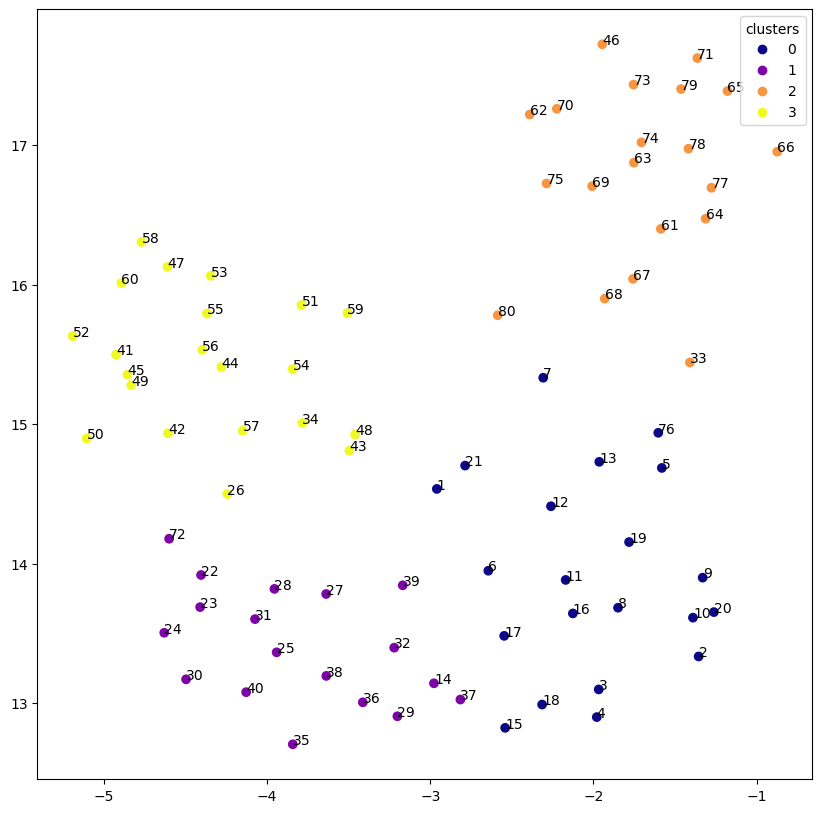

In [6]:
create_cluster(plots)

# Summaries

In [7]:
sum = [
    # action
       "Robert McCall, a quiet man working at a hardware store, befriends a teenage prostitute named Alina who dreams of becoming a singer. When Alina is brutally beaten by her pimp, Robert seeks revenge and discovers a larger criminal syndicate behind it. With his skills as a vigilante, Robert takes down the criminals one by one, ultimately confronting the syndicate's leader and starting a new life as a helper of the oppressed.",
       "John Wick, a retired assassin, is forced back into the world of crime when a crime boss named Santino D'Antonio presents him with a blood oath marker, demanding his services. John reluctantly accepts and is tasked with assassinating Santino's sister. After fulfilling the mission, John becomes the target of a global contract and is declared excommunicado by the High Table, forcing him to fight for survival against numerous assassins. With the help of allies and his lethal skills, John seeks vengeance and prepares to face the consequences of his actions.",
       "John Wick, a retired hitman grieving the death of his wife, seeks vengeance when a Russian mobster's son kills his puppy and steals his car. With a bounty on his head, John fights his way through the criminal underworld, facing old allies and enemies alike. Determined to avenge his loss, John eliminates his targets and finds solace in a new companion, setting the stage for his return to his violent life.",
       "In Mission: Impossible - Rogue Nation, IMF Agent Ethan Hunt must take on the Syndicate, a rogue organization of former intelligence operatives, after the IMF is disbanded. With the help of his loyal allies and a disavowed MI6 agent, Ethan uncovers the Syndicate's plot to assassinate world leaders. Through a series of thrilling missions and intense confrontations, Ethan successfully dismantles the Syndicate, restores the IMF's reputation, and ensures the safety of the world.",
       "In The Dark Knight, Batman joins forces with District Attorney Harvey Dent and Police Lieutenant Jim Gordon to combat organized crime in Gotham City. However, their efforts are challenged by the Joker, a sadistic and unpredictable criminal mastermind. As chaos ensues and the Joker's plans unfold, Batman is faced with difficult choices, including sacrificing his own reputation to protect the city.",
       "In the movie Extraction, Ovi Mahajan, the son of a powerful Indian drug lord, is kidnapped by corrupt police officers working for a rival drug lord. Tyler Rake, a mercenary, is hired to rescue Ovi. As they navigate the dangerous city of Dhaka, facing opposition from various factions, Tyler forms a bond with Ovi and risks his own life to ensure the boy's safety. In the end, Tyler sacrifices himself, allowing Ovi to escape to safety with the help of his handler, Khan.",
       "In the movie The Raid: Redemption, a rookie police officer named Rama joins a squad led by Sergeant Jaka and Lieutenant Wahyu for a mission to arrest crime lord Tama Riyadi. However, they soon discover that Tama has the building under his control and has called in reinforcements to eliminate the officers. As the team fights their way through the building, they face treachery, betrayal, and overwhelming odds. Rama, determined to save his comrades, confronts various enemies, including Tama's brutal enforcer, Mad Dog, and his own estranged brother, Andi. In the end, Rama manages to survive and escape with his injured colleague and a detained Wahyu, while Andi chooses to remain in the criminal underworld.",
       " MI6 agent Lorraine Broughton is sent to Berlin to recover a stolen list containing the identities of intelligence agents. As she navigates a web of double agents, she teams up with a French agent named Delphine Lasalle, forms a complicated relationship with MI6 station head David Percival, and uncovers a conspiracy involving the KGB and CIA. Lorraine's loyalties and true identity are revealed in the end, as she outwits her enemies and retrieves the list.",
       "The film follows the story of a man named Mason Hargreaves, who assumes the identity of Patrick Hill to join Fortico Security as an armored truck guard. In reality, Hargreaves is a crime lord seeking revenge for the murder of his son during an armored truck robbery. As the story unfolds, Hargreaves investigates his colleagues at Fortico while also being involved in a series of heists orchestrated by a group of disgruntled Afghanistan veterans. The movie culminates in a massive heist at the Fortico depot, where Hargreaves seeks to avenge his son's death and recover stolen money.",
       "The Old Guard follows a group of immortal mercenaries led by Andy who are betrayed by a former ally and hunted by a pharmaceutical executive seeking to exploit their regenerative abilities. They join forces with a new member, Nile, as they fight to protect their identities and continue their mission of helping people while uncovering the truth behind their immortality. In the end, they confront their betrayers, save their captured comrades, and find renewed purpose in their existence.",
       "Ex-Green Beret Bryan Mills tries to build a closer relationship with his daughter Kim. When Kim and her friend are abducted in Paris by a sex trafficking ring, Bryan goes on a relentless mission to rescue her. He tracks down the kidnappers, fights his way through criminal networks, and ultimately saves Kim, bringing them back home safely.",
       "Lee Unwin sacrifices himself to save his superior, Harry Hart, and years later, Harry recruits Lee's son, Eggsy, to join Kingsman, a secret intelligence service. Eggsy undergoes training alongside other candidates, but when a tech billionaire named Richmond Valentine plans to unleash a global catastrophe, Eggsy and his team must stop him. With the help of his fellow agents and his own skills, Eggsy saves the world, assumes the mantle of Galahad, and continues the legacy of Kingsman.",
       "An unidentified man is rescued by Italian fishermen and discovers he has no memory of his identity but possesses exceptional combat skills. Finding clues in a Zurich safe deposit box, he adopts the name Jason Bourne and sets out to uncover his true identity. Pursued by CIA agents and haunted by his past, Bourne teams up with a German woman named Marie as he unravels a web of deceit and assassinations, eventually finding solace and a new beginning with Marie on the island of Mykonos.",
       "In the film Collateral, Max Durocher, a cab driver in Los Angeles, unknowingly picks up a hitman named Vincent as his passenger. Vincent forces Max to drive him to various locations where he carries out a series of assassinations. Max becomes embroiled in a dangerous and deadly night as he tries to survive and protect his last passenger, federal prosecutor Annie Farrell. With the help of an undercover detective, Max and Annie must outwit Vincent and bring an end to his killing spree. In a final confrontation on a subway train, Max manages to overpower Vincent and save Annie's life before they escape. Vincent meets his demise while riding alone on the train.",
       "In the movie, Luke, an ex-cop and cage fighter, becomes entangled with the Russian mafia and Triad gangsters when he crosses paths with a young girl named Mei who possesses valuable information. Luke, seeking redemption, embarks on a mission to protect Mei and take down the criminal organizations involved. Throughout the film, there are intense action sequences, betrayals, and high-stakes confrontations as Luke fights to keep Mei safe and bring justice to those responsible for his wife's death.",
       "Mitch Rapp seeks revenge after his girlfriend is killed by terrorists and is recruited by the CIA to join a covert operations unit. Together with his team, he must stop a former Navy SEAL known as Ghost from delivering stolen nuclear material to Iranian hardliners. Rapp engages in a high-stakes chase, ultimately confronting Ghost and preventing a devastating attack on the U.S. Navy's Sixth Fleet.",
       "Frank Martin, known as The Transporter, is a skilled driver who follows strict rules while transporting. After being hired to drive bank robbers, he becomes entangled in a dangerous situation, violating his rules and uncovering a kidnapped woman in his car. Seeking vengeance, he faces off against a human trafficker and his partner, with the help of his new ally, Lai. Together, they rescue the trapped individuals and bring the criminals to justice.",
       "Cha Tae-sik, a quiet man running a pawnshop, forms a close bond with a young girl named So-mi. When So-mi's mother steals a pack of opium, they become targets of a ruthless crime lord. Tae-sik's skills as a former covert operative come to light as he fights to rescue So-mi, seeking revenge against those who harmed her. In a bittersweet ending, Tae-sik sacrifices his freedom to ensure So-mi's safety, sharing a heartfelt moment with her before parting ways.",
       "Jim Terrier, a former Special Forces soldier turned mercenary, is hired to assassinate a government minister in the Democratic Republic of Congo by mining companies seeking to protect their interests. Years later, Terrier becomes the target of a hit squad and discovers that his former colleagues are being eliminated to cover up their past actions. With the help of Interpol and his own determination, Terrier confronts his ex-boss and his team, saving his kidnapped love interest and providing evidence for an investigation. In the end, Terrier reunites with Annie in the DRC after serving his time in prison.",
       "Robert McCall, a Lyft driver in Boston, continues to help those in need with the assistance of his friend Susan. He travels to Istanbul to rescue a kidnapped girl and aids an elderly Holocaust survivor in his search for a painting. When Susan is killed, Robert uncovers a plot and seeks revenge against his former team members. He eliminates them one by one, ultimately confronting his former partner and bringing justice to those responsible. Back in Boston, Robert helps others and finds solace in his restored home.",
    # comedy
        "Lloyd Christmas and Harry Dunne, two dimwitted friends, fall into a kidnapping plot and travel to Aspen to return a briefcase of ransom money. Along the way, they encounter numerous comedic obstacles and misunderstandings. With the help of the FBI, they eventually save the day and reunite Mary Swanson with her husband before embarking on their journey back home.",
    "Step Brothers is a comedy film about two immature middle-aged men, Brennan and Dale, who are forced to live together as stepbrothers when their parents marry. Initially despising each other, they eventually bond over their shared interests and start an entertainment company. Through hilarious situations and personal growth, they become successful and find happiness in their unconventional lives.",
    "Anchorman: The Legend of Ron Burgundy is a comedy film set in the 1970s about Ron Burgundy, a famous anchorman in San Diego. When his network hires Veronica Corningstone as a co-anchor, their rivalry ensues. After a series of comedic events, including a news team brawl and an on-air mishap, Ron redeems himself by saving Veronica from a bear, and they reconcile. In the end, the characters find success in various endeavors, and Ron and Veronica become co-anchors again on a global news network.",
    "Tommy Boy follows the story of Tommy Callahan III, who graduates from college and returns to his hometown. After his father's sudden death, he takes over the family's auto parts plant, which faces financial troubles. Tommy and his father's assistant, Richard, embark on a sales trip to save the company, facing challenges and personal growth along the way. Through determination and wit, they manage to secure a crucial deal and thwart the plans of con artists who want to sell the company. In the end, Tommy embraces his responsibilities and finds success both in business and love.",
    "In The Hangover, a group of friends travels to Las Vegas for a bachelor party. They wake up the next morning with no memory of the previous night, a missing groom, a tiger in the bathroom, and various other chaotic surprises. They embark on a wild journey to retrace their steps and find the missing groom, encountering gangsters, a naked man in the trunk, and unexpected revelations along the way. Eventually, they recover their memories through a series of photographs and make it in time for the wedding, creating lasting memories of their wild adventure.",
    "Annie Walker, a struggling and unlucky woman, is asked to be the maid of honor for her best friend Lillian's wedding. However, she becomes caught in a competitive and jealousy-fueled rivalry with another bridesmaid, Helen. Throughout the wedding planning process, Annie faces numerous personal and emotional challenges, including failed relationships and a crisis of self-confidence. Eventually, she learns to take control of her life, reconnects with her friend, and finds love with a state patrol officer named Nathan.",
    "Seth and Evan, best friends and high school seniors, embark on a wild night of adventures before heading off to college. Their mission is to obtain alcohol for a party, but they encounter various obstacles along the way, including encounters with police officers, a car accident, and a chaotic party. Throughout the night, they navigate their own personal struggles and confront their feelings about their changing friendship and future plans. In the end, they find resolution and reconcile with each other and the girls they care about.",
    "The movie revolves around Mitch Martin, who discovers his girlfriend Heidi engaging in an orgy and breaks up with her. He moves into a house near a university campus and, with the help of his friends Bernard and Frank, starts a fraternity to meet the housing requirements. The fraternity faces opposition from the college dean, Gordon Pritchard, who attempts to shut them down. They go through a series of challenges to prove their legitimacy, including debates, academic exams, and a gymnastics competition. Eventually, they succeed with the help of Mitch's coworker Megan, who exposes Pritchard's bribery. The fraternity's charter is reinstated, and they move into Pritchard's former residence. Mitch reconciles with his high school crush Nicole, and Frank takes over as the new leader of the fraternity. In a mid-credit scene, Pritchard is accidentally killed by Mark, Heidi's new boyfriend, in a car accident.",
    "Scholarly student Morton Schmidt and popular athlete Greg Jenko reunite at the police academy and become partners on bicycle patrol. They are reassigned to infiltrate a high school to contain the spread of a synthetic drug. The duo takes on new identities and experiences a mix-up that leads to comedic situations and a strain on their friendship. They eventually uncover the drug operation, reconcile, and are given a new assignment to infiltrate a college.",
    "Mac Radner and his wife Kelly struggle to adjust to parenthood while living next to the rowdy Delta Psi Beta fraternity. After failed attempts to reason with the fraternity, they resort to manipulation and pranks to get them shut down. In the end, they succeed in getting Delta Psi shut down, Teddy takes responsibility, and Mac and Kelly embrace their roles as parents. Teddy and Mac reconcile, and Mac and Kelly decline an invitation to Burning Man, choosing to focus on their family.",
    "Ricky Bobby, a talented NASCAR driver, rises to success after he takes over the racing seat of his team's driver. However, his arrogance leads to his downfall when he is outperformed by a French Formula One driver named Jean Girard. After a crash and losing his job, Ricky hits rock bottom but eventually finds redemption and renews his relationships with his family and friends. He realizes that winning isn't everything and cherishes the love and support of his loved ones.",
    "Napoleon Dynamite is a quirky coming-of-age comedy set in rural Idaho. The socially awkward Napoleon navigates high school life with his eccentric family and befriends Pedro, a new student. Together, they face challenges, including the school dance and Pedro's bid for class president, ultimately finding friendship and unexpected triumphs along the way.",
    "In the cemetery of Zubrowka, a young woman reads The Grand Budapest Hotel, a book recounting a 1968 visit to the hotel. The story follows Zero Moustafa, a lobby boy at the hotel in 1932, and his adventures with Monsieur Gustave H., the hotel's concierge. When Gustave is framed for murder, they embark on a journey to clear his name, involving stolen artwork, prison breaks, a secret will, and a war-torn Zubrowka. The events eventually become part of the Author's novel, immortalizing the legendary Grand Budapest Hotel.",
    "Filmmaker Marty Di Bergi documents the comedic and tumultuous journey of the fictional English rock band Spinal Tap during their 1982 U.S. concert tour. The band, consisting of David St. Hubbins, Nigel Tufnel, Derek Smalls, Viv Savage, and Mick Shrimpton, faces various challenges such as canceled shows, controversy over their album's cover art, and a disastrous stage prop mishap. Internal conflicts and absurd situations arise, but the band ultimately finds success in Japan despite the loss of their drummer.",
    "Peter Gibbons, a disillusioned programmer at Initech, becomes fed up with his monotonous job and the oppressive management. After a hypnotherapy session gone wrong, he stops caring about work and starts pursuing a relationship with a waitress named Joanna. Peter's friends, Michael and Samir, join him in a scheme to steal money from the company. However, when their plan backfires, Peter takes the blame and confesses, only to discover that the building has caught fire, destroying the evidence. Peter finds a new job, reconciles with Joanna, and his eccentric coworker Milton finally takes a vacation with the stolen money.",
    "In the film Zoolander, male model Derek Zoolander faces career setbacks and personal losses, while fashion mogul Mugatu plans to brainwash a model into assassinating the Prime Minister of Malaysia. With the help of journalist Matilda, Derek uncovers the conspiracy and stops the assassination attempt, leading to his redemption and the establishment of a center to help children.",
    "Ex-fighter pilot Ted Striker, a traumatized war veteran turned taxi driver, boards a flight to Chicago in an attempt to win back his ex-girlfriend, flight attendant Elaine Dickinson. When the entire flight crew and some passengers fall ill due to food poisoning, Ted is convinced to take control of the plane and is guided by his former commanding officer and Elaine. Despite facing challenging weather conditions, Ted successfully lands the plane, reuniting with Elaine and finding renewed love.",
    "Rod Kimble, who idolizes his deceased stuntman father, sets out to become a famous stuntman himself to gain the respect of his stepfather, Frank, and raise money for Frank's heart surgery. Despite facing numerous challenges and setbacks, Rod perseveres with the support of his friends and love interest, Denise. In the end, Rod successfully completes a daring jump, raises enough funds, and earns the respect he sought from Frank and others.",
    "In Edge City, Stanley Ipkiss, a timid bank clerk, discovers a magical mask that transforms him into a mischievous and powerful character known as the Mask. With his newfound confidence and abilities, Stanley embraces his alter ego, wreaking havoc on those who have ridiculed him. As he navigates through a series of comedic and chaotic situations, Stanley must confront gangster Dorian Tyrell, save the woman he loves, and ultimately learn to be true to himself.",
    "Two years after their wild adventure in Las Vegas, Stu is preparing to get married in Thailand. Reluctantly, he allows his friends Phil, Alan, and Doug to join him, along with Lauren's brother Teddy. However, their trip takes a chaotic turn when they wake up with no memory of the previous night, a severed finger, and encounters with gangsters. As they piece together the events, they must find Teddy and make it back in time for the wedding, facing outrageous situations and unexpected twists along the way. In the end, they come together to celebrate and cherish their memories, even if some of them are best forgotten.",
       
# horror
    "Robert McCall, a quiet man working at a hardware store, befriends a teenage prostitute named Alina who dreams of becoming a singer. When Alina is brutally beaten by her pimp, Robert seeks revenge and discovers a larger criminal syndicate behind it. With his skills as a vigilante, Robert takes down the criminals one by one, ultimately confronting the syndicate's leader and starting a new life as a helper of the oppressed.",
       "In Santa Monica, a couple's peaceful life is shattered when their neighbors are murdered by members of a cult. After the incident, paranormal activities ensue, and the couple discovers that a demonic presence is attached to a vintage porcelain doll named Annabelle. As they struggle to protect their newborn daughter from the malevolent entity, they seek help from a priest and a bookseller, but ultimately make a sacrifice to save their child and banish the demon, with the doll finding its way into the possession of paranormal investigators the Warrens.",
         "In 1969, a couple seeks help from a medium after their son is dragged to Hell by a demon. In the present day, bank loan officer Christine denies an extension to an elderly woman, who curses her with a demonic spirit. As Christine tries to rid herself of the curse, she inadvertently gives the cursed object to the wrong person, leading to her own demise as she is dragged to Hell while her boyfriend watches helplessly.",
     "After the death of her mother and her daughter Charlie, Annie discovers dark secrets about her family's past involving a coven and a demon named King Paimon. As supernatural occurrences escalate, Annie suspects that Charlie's spirit has become vengeful and demonic. The family is ultimately manipulated by the coven, with Peter being possessed by Paimon and crowned as the new king.",
      "After their son Dalton slips into a coma and supernatural occurrences plague their home, the Lambert family seeks the help of psychic Elise Rainier. They discover that Dalton's consciousness is trapped in a purgatory dimension called The Further and spirits desire to possess his comatose body. Josh, the father, confronts his own suppressed ability to astral project and ventures into The Further to save Dalton, but he becomes possessed by a vengeful spirit, leading to a chilling twist ending where Renai realizes the truth.",
      "Katie and Micah experience escalating paranormal activity in their new home, which Micah documents with a camera. They discover that Katie is being haunted by a malevolent demon, but Micah's attempts to communicate with it only worsen the situation. As the hauntings become more violent, Katie becomes possessed by the demon and kills Micah before disappearing, leaving a chilling ending to the found-footage horror film.",
      "Guy and Rosemary Woodhouse move into an apartment building with a dark history. They become close with their eccentric neighbors, the Castevets, and Rosemary soon becomes pregnant. As her pregnancy progresses, Rosemary suspects that the Castevets and her own husband are part of a satanic coven with sinister intentions for her baby. Eventually, she discovers the truth and decides to embrace her maternal instincts, accepting her role as the mother of Satan's child.",
      "True crime writer Ellison Oswalt moves his family into a house where a gruesome murder took place. While researching the case, he discovers a series of disturbing Super 8 films depicting different families being killed, all linked to a mysterious figure named Bughuul. As Ellison delves deeper, he realizes that his family has become the next target of the malevolent entity, and his daughter Ashley becomes possessed, leading to a horrifying and tragic outcome as Bughuul claims their souls and continues his reign of terror through the cursed films.",
      "After the gruesome murders committed by Ronald DeFeo Jr., the Lutz family moves into the infamous Amityville house, unaware of its dark history. Strange and terrifying events unfold as they experience supernatural phenomena, including flies, disembodied voices, nightmares, and possessions. The family's lives spiral out of control, leading to a climactic night of blood oozing from walls, demonic visions, and a possessed George threatening their lives. Eventually, they flee the house, leaving everything behind, and the closing statement reveals that they never returned.",
      "A small-town coroner and his son perform an autopsy on an unidentified woman's body, uncovering strange injuries and supernatural phenomena. They realize that the woman is an immortal witch cursed to experience pain, even in death. In their quest to break the curse, sacrifices are made, leading to tragic outcomes and leaving the mystery unresolved as the seemingly lifeless corpse shows signs of continued existence.",
      "Amelia, a widow struggling to raise her son Samuel, faces supernatural terror when a mysterious creature called the Babadook begins tormenting them. As Sam becomes convinced of the creature's existence, Amelia experiences disturbing events and hallucinations. The Babadook ultimately possesses Amelia, leading to a dangerous confrontation, but she manages to regain control and locks it in the basement, finding a way to coexist with the entity as they rebuild their lives.",
      "In 1971, the Perron family moves into a farmhouse in Rhode Island and soon experiences paranormal activity. They seek help from demonologists Ed and Lorraine Warren, who uncover the dark history of the house and the malevolent spirit of Bathsheba Sherman. As the haunting intensifies, the Warrens must confront the possessed Carolyn Perron and perform an exorcism to save her and her family from the clutches of the vengeful spirit.",
      "Five friends—Ash, Linda, Cheryl, Scott, and Shelly—vacation at a remote cabin in Tennessee. They unknowingly unleash a demonic entity after playing an incantation tape found in the cellar. One by one, the friends become possessed and attack each other, forcing Ash to fight for survival. As the horrors escalate, Ash faces a relentless battle against the demonic forces that seek to claim his soul.",
      "Erin Bruner, a determined lawyer, takes on the case of Father Richard Moore, a priest charged with negligent homicide after attempting an exorcism on a troubled student named Emily Rose. As the trial unfolds, Bruner experiences supernatural occurrences and begins to question her beliefs. Despite facing opposition, Moore presents evidence of Emily's possession and the jury delivers an unexpected verdict, leading to Moore's release. In the end, Bruner rejects a partnership offer and joins Moore in visiting Emily's grave, hinting at the possibility of her future sainthood.",
      "In Iraq, Catholic priest Lankester Merrin uncovers a medallion of Saint Joseph and an artifact representing the demon Pazuzu. In Washington, D.C., actress Chris MacNeil's daughter Regan becomes possessed by a demonic entity. With the help of troubled priest Damien Karras and experienced exorcist Merrin, they battle the demon, leading to Karras sacrificing himself and Regan being healed.",
      "Filmmakers Iris and Daniel follow Reverend Cotton Marcus as he performs fake exorcisms. They accept a request from farmer Louis Sweetzer to exorcise his daughter Nell, whom he believes is possessed. As they uncover the truth behind Nell's condition, they encounter a cult led by Louis's former pastor and witness a terrifying demonic ritual that leads to their own demise.",
      "American diplomat Robert Thorn and his wife Kathy adopt a baby named Damien after their own child dies at birth. Mysterious and sinister events surround Damien as he grows older, leading to the revelation that he is the son of Satan. With the help of a photographer, Robert uncovers Damien's true origins and attempts to stop him, but tragically fails, resulting in the deaths of his wife and himself, leaving Damien in the care of powerful figures.",
      "A middle-aged woman encounters a mysterious box with ominous Hebrew writing, leading to a violent and inexplicable attack. Later, a divorced couple's daughter, Em, discovers the same box and becomes increasingly disturbed as she becomes possessed by a malevolent force. With the help of a rabbi, her family attempts an exorcism to rid Em of the entity, leading to a climactic struggle and ultimately trapping the spirit back inside the box, but the box continues to whisper ominously.",
      "Teenager Katie dies after watching a cursed videotape, prompting her mother to enlist her journalist aunt Rachel's help in investigating the circumstances. Rachel discovers the dark history of the tape, involving a troubled girl named Samara and her supernatural powers. As Rachel delves deeper into the mystery, she realizes that she and her son Aidan are also at risk, leading to a race against time to break the curse and save themselves from Samara's vengeful wrath.",
      "In 1630s New England, a family is banished from their Puritan settlement and builds a farm near a secluded forest. When their baby disappears and strange events unfold, they suspect a witch is tormenting them. As their crops fail and tragedy befalls them, the family's faith is tested, leading to accusations, madness, and a descent into darkness as they confront the supernatural forces surrounding them, ultimately culminating in a chilling and disturbing climax at a Witches' Sabbath.",
      
# romance movies
    "In 1935 England, Briony Tallis misinterprets a heated encounter between her sister Cecilia and Robbie Turner, mistakenly believing Robbie is a threat. Briony's false accusation leads to Robbie's arrest, and he is later sent to fight in World War II. Years later, as an elderly and remorseful novelist, Briony reveals the tragic truth that she fabricated a happy ending for Cecilia and Robbie in her book Atonement, in an attempt to atone for her mistake. In reality, Robbie died in the war, and Cecilia drowned during the Blitz, leaving Briony burdened with guilt and unable to truly mend what she had broken.",
    "In 1939, Lady Sarah Ashley travels to Australia to confront her husband and take control of their cattle station, Faraway Downs. Alongside a group of diverse individuals, including the Drover and Nullah, a young mixed-race boy, they face challenges and hardships as they drive the cattle to Darwin. Through their journey, Lady Sarah and the Drover fall in love, and they find strength and resilience in the rugged Australian territory. Ultimately, they overcome their adversaries, reunite with Nullah, and find a sense of home and belonging in the Outback.",
    "Dido Belle tells the story of Dido Elizabeth Belle Lindsay, a biracial woman raised as a gentlewoman by her great-uncle and his wife in 18th-century England. Despite her privileged upbringing, Dido faces societal challenges due to her mixed race and struggles to find a suitable marriage prospect. Alongside her cousin Elizabeth and her forbidden love interest, John Davinier, Dido navigates issues of race, class, and love, ultimately challenging conventions and finding happiness in her own terms. The film concludes with Dido's marriage to John and the lasting legacy of their interracial union.",
    "Bright Star tells the story of the passionate love affair between poet John Keats and Fanny Brawne in 19th-century England. Fanny, a vivacious young woman, becomes infatuated with Keats after reading his poetry. Despite their initial differences and societal obstacles, their connection deepens, and they fall deeply in love. However, their happiness is cut short when Keats falls ill with tuberculosis and ultimately dies. Fanny mourns his loss but carries their love with her as she walks the paths they once shared, reciting his beautiful poem Bright Star in his memory.",
    "Brooklyn follows the journey of Eilis Lacey, a young woman from a small town in Ireland, as she moves to Brooklyn, New York in the 1950s to seek better opportunities. Initially struggling with homesickness and adjusting to her new life, Eilis finds support from Father Flood and starts to settle in, enrolling in night school and finding employment. She meets and falls in love with Tony, an Italian-American plumber, but a family tragedy forces her to return to Ireland temporarily. While there, Eilis is torn between her old life and the new one she has built in Brooklyn, but ultimately decides to embrace her love for Tony and return to him, reuniting with him in Brooklyn.",
    "Set in Casablanca during World War II, Casablanca follows Rick Blaine, the owner of a popular nightclub called Rick's Café Américain. Rick, a cynical American expatriate, finds himself caught up in a web of political intrigue and romance when his former lover, Ilsa Lund, walks back into his life with her husband, Victor Laszlo, a Czech Resistance leader. As tensions rise and the hunt for exit visas intensifies, Rick must make difficult choices, ultimately sacrificing his own happiness for the greater good and helping Ilsa and Laszlo escape to America while facing off against the corrupt Captain Louis Renault and the ruthless Major Strasser.",
    "During the Civil War, W.P. Inman enlists in the Confederate Army, leaving behind his love, Ada Monroe. After surviving battles and facing numerous challenges, Inman deserts to return to Cold Mountain and reunite with Ada. However, their reunion is short-lived as they face the violent opposition of Captain Teague, resulting in Inman's sacrifice and the eventual reunion of Ada and their daughter with their close-knit community years later.",
    "Set against the backdrop of World War I and the Russian Revolution, the film follows the life of Dr. Yuri Zhivago and his complicated relationships with Tonya and Lara. Amid political turmoil and personal struggles, Yuri and Lara's love affair unfolds, ultimately leading to separation and loss. In the end, Yevgraf Zhivago searches for Lara's daughter, offering a glimmer of hope for the reunion of a fractured family torn apart by war and revolution.",
    "Set in 1870s Britain, the film follows Bathsheba Everdene, a headstrong woman who inherits a farm. She encounters Gabriel Oak, a neighboring farmer who proposes to her but is rejected. Bathsheba navigates various romantic entanglements, including a marriage to the charismatic Frank Troy and a proposal from the wealthy William Boldwood. Ultimately, she realizes her true feelings for Gabriel and, after a series of dramatic events, they reunite and profess their love for each other.",
    "Set against the backdrop of the American Civil War, Scarlett O'Hara, a strong-willed Southern belle, becomes infatuated with Ashley Wilkes, who is engaged to another woman. In her pursuit of Ashley, Scarlett marries twice, faces the hardships of war, and experiences personal loss. Ultimately, she realizes her true feelings for Rhett Butler, but their tumultuous relationship ends with Rhett leaving her, prompting Scarlett to vow to win him back one day as she returns to her family plantation, Tara.",
    "Karen Blixen, a wealthy Danish woman, moves to British East Africa in 1913 and marries Baron Bror Blixen. They face challenges as Bror misuses her funds to establish a coffee farm, while Karen becomes enamored with Africa and its people. Through her relationships with Bror and a big-game hunter named Denys Finch Hatton, Karen experiences love, loss, and personal growth, ultimately becoming a renowned author under the pen name Isak Dinesen and leaving Africa behind.",
    "In 1941, best friends Rafe and Danny serve as lieutenants in the US military. Rafe joins the Eagle Squadron, leaving behind his girlfriend Evelyn, who finds solace in Danny's arms. When Japan attacks Pearl Harbor, Rafe and Danny become heroes, but Danny tragically dies protecting Rafe. Rafe and Evelyn raise Danny's son together, honoring their fallen friend's memory.",
    "In Verona Beach, two rival business empires, the Capulets and Montagues, fuel a long-standing feud. Romeo and Juliet, from the opposing families, fall passionately in love at a party, unaware of each other's identities. Their secret marriage leads to a tragic series of events, including deaths, banishment, and ultimately, the heartbreaking suicides of the young lovers, which forces their families to confront the devastating consequences of their ongoing conflict.",
    "In 1870s New York City, Newland Archer plans to marry May Welland but becomes infatuated with May's cousin, Countess Ellen Olenska. As Archer and the countess grow closer, he becomes disillusioned with May's conformity and falls in love with the countess. However, societal expectations and a sense of duty lead Archer to marry May, and years later, after May's death, he contemplates his lost love for the countess and the sacrifices he made for societal acceptance.",
    "During World War II, a French-Canadian combat nurse named Hana cares for a mysterious burn victim in Italy who has lost his memory. As she tends to him in a bombed-out monastery, they are joined by other individuals, including a Sikh soldier and a Canadian intelligence operative. Through flashbacks, the patient reveals his past as a Hungarian cartographer involved in a passionate love affair with an Englishwoman named Katharine, which ultimately led to tragedy. In the end, Hana grants the patient's request for a lethal dose of morphine, and as he passes away, she reads a letter from Katharine, bringing closure to their intertwined stories.",
    "In a modern nursing home, elderly Duke reads a love story to a fellow patient suffering from dementia. The story unfolds in the 1940s, as young Noah and Allie fall deeply in love despite their different backgrounds. Separated by societal pressures and miscommunication, they move on with their lives, but fate reunites them years later. In the present, Duke, who is revealed to be Noah, reads their love story to Allie, and in a poignant moment, they briefly reconnect before their time runs out. Eventually, they pass away peacefully, still holding hands.",
    "In the early 1920s, Walter Fane, a serious bacteriologist, marries socialite Kitty Garstin despite their mismatched personalities. After Kitty's affair with a British vice consul named Charles Townsend, Walter forces her to accompany him to a remote Chinese village plagued by a cholera epidemic. Amidst their hardships and Walter's selflessness, their marriage begins to thrive, but Walter succumbs to the disease. Five years later, Kitty, now content with her son, encounters Townsend, but rejects his advances, realizing her true priorities lie with her family.",
    "In 1962, mute custodian Elisa Esposito forms a close bond with a humanoid amphibian creature held captive in a secret government laboratory. Learning of the plan to kill and vivisect the creature, Elisa enlists the help of her friends Giles and Zelda to liberate him. Despite facing obstacles and a violent confrontation with Colonel Strickland, Elisa successfully releases the creature into a canal, but is shot in the process. The creature uses his healing abilities to revive Elisa, revealing her transformed gills, and they embrace, living happily ever after.",
    "In 1996, treasure hunter Brock Lovett searches the Titanic wreckage for a valuable diamond necklace but finds a drawing of a young woman instead. The woman, Rose Dawson Calvert, comes forward and recounts her experience as a passenger on the ill-fated Titanic in 1912. Rose, engaged to the wealthy Cal Hockley, falls in love with the penniless artist Jack Dawson onboard the ship, and their forbidden romance unfolds amidst the tragedy of the ship sinking, culminating in Rose's ultimate act of freedom and reunion with Jack in the afterlife.",
    "Charlie O'Brien, a circus owner, meets Jacob Jankowski, an elderly man who shares his past as a circus worker. Jacob recounts his story as a young veterinary student during the Great Depression, who joins the Benzini Bros. circus and becomes involved in the complex dynamics between the ringmaster, August, his wife Marlena, and the mistreated elephant, Rosie. As Jacob and Marlena's love grows, they face abuse and danger from August, leading to a climactic event where they fight back, rescue Rosie, and ultimately find happiness together before Jacob's present-day return to the circus."

    
    

]

80
(80, 768)


C:\Users\HP\AppData\Local\Temp\ipykernel_16912\858548352.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('plasma', 5)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Legend:  ['0', '1', '2', '3']


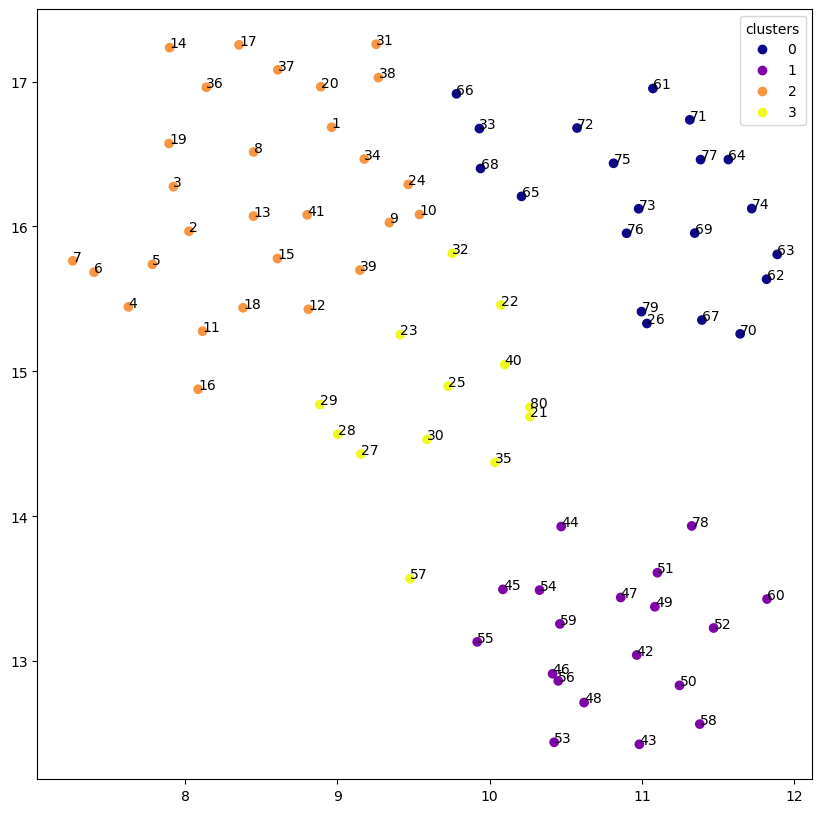

In [8]:
create_cluster(sum)

In [12]:
joined = kg + plots + sum

In [ ]:
create_cluster(joined)